<a href="https://colab.research.google.com/github/ferrazzijk/Glassdoor-Scraping/blob/main/_00_Glassdoor_Initial_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The purpose of this project is to determine which data analysis skills are associated with higher salaries. We will use data scraped from [Glassdoor](https://www.glassdoor.com/member/home/index.htm). 

**Job Titles:**
*   [Data Analyst](https://colab.research.google.com/drive/1AW0rNTs84Cq7GrJiDq86WWCisB4q6ZwO?usp=sharing)
*   [Business Analyst](https://colab.research.google.com/drive/1I1lolzuZgoUZGBwAEP9hZNf7my8XItbz?usp=sharing)
*   [Data Engineer](https://colab.research.google.com/drive/18HMhZXcv4xwxDUXGDauYEGdnDJLjNYxf?usp=sharing)
*   [Data Scientist](https://colab.research.google.com/drive/1i8UQMiObiOKAyzlrAsFCBPitqIh90Y5O?usp=sharing)

**Locations**
*   Austin, TX
*   Boston, MA
*   Chicago, IL
*   Colorado
*   Los Angeles, CA
*   New York City, NY
*   San Francisco, CA
*   Seattle, WA

This file contains original exploration of scraping desired info and combination of data after being scraped for analysis. To view the scraping files of each role, please select the respective link in the Job Titles list.



## **Set Environment & Initial Request**

In [8]:
#set environment
import collections
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import scipy.stats as stats
import seaborn as sns
import spacy
import statsmodels.api as sm
import string
import textwrap

from bs4 import BeautifulSoup as soup
from collections import Counter
from IPython.core.display import clear_output
from nltk.corpus import stopwords
from random import randint
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import text
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import  classification_report, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost.sklearn import XGBRegressor
from statsmodels.tools.eval_measures import mse, rmse
from time import time, sleep
from wordcloud import WordCloud

nltk.download('stopwords')

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# #set url & headers for data analyst roles
# da_url = 'https://www.glassdoor.com/Job/chicago-data-analyst-jobs-SRCH_IL.0,7_IC1128808_KO8,20_IP2.htm?radius=100&minSalary=26000&includeNoSalaryJobs=false&maxSalary=112000&fromAge=7'
# headers = {'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36 RuxitSynthetic/1.0 v8980925411 t38550 ath9b965f92 altpub cvcv=2'}

# #get info from url
# da_response = requests.get(da_url, headers=headers)
# da_response.status_code

In [10]:
# #create a BeautifulSoup object from fetched data
# da_soup = soup(da_response.text, 'html.parser')

# **Extracting One Piece of Information at a Time**

## **Companies**

In [11]:
# #Extract Company Names
# da_companies= da_soup.select('.css-l2wjgv.e1n63ojh0.jobLink')
# #extract just the Company Names text
# da_co_names = [da_co_name.get_text().strip() for da_co_name in da_companies]
# da_co_names

In [12]:
# len(da_co_names) #check length matches other queries

## **Company Ratings**

In [13]:
# #Extract the Ratings
# da_rankings= da_soup.select('.css-19pjha7.e1cjmv6j1')
# #extract just the Job Titles text
# da_co_rank = [da_co_rank.get_text().strip() for da_co_rank in da_rankings]
# da_co_rank

In [14]:
# len(da_co_rank) #check length matches other queries

## **Job Titles**

In [15]:
# #Extract the Job Titles
# da_job_titles= da_soup.select('.jobLink.css-1rd3saf.eigr9kq2')
# #extract just the Job Titles text
# da_positions = [da_position.get_text().strip() for da_position in da_job_titles]
# da_positions

In [16]:
# len(da_positions) #check length matches other queries

## **Locations**

In [17]:
# #Extract Job Locations
# da_job_locations= da_soup.select('.pr-xxsm.css-1ndif2q.e1rrn5ka0')
# #extract just the Job Locations text
# da_locations = [da_location.get_text() for da_location in da_job_locations]
# da_locations

In [18]:
# len(da_locations) #check length matches other queries

## **Salary Ranges**

In [19]:
# #Extract Job Salary Ranges
# da_salary_ranges= da_soup.select('.css-1imh2hq.e1wijj242')
# #extract just the Salary Ranges text
# da_sal_ranges = [da_sal_range.get_text() for da_sal_range in da_salary_ranges]
# da_sal_ranges

In [20]:
# len(da_sal_ranges) #check length matches other queries

## **Links**

In [21]:
# #Extract Job Links
# da_job_links= da_soup.select('.css-l2wjgv.e1n63ojh0.jobLink')
# da_job_links

In [22]:
# #extract just the Links text
# da_links = [da_link.get_text() for da_link in da_job_links]
# da_links

In [23]:
# #get_text() for job links didn't extract anticipated info
# #let's investigate first element of da_job_links list
# da_job_links[0]

In [24]:
# #see if we can access the link by adding ['href'] to previous call
# da_job_links[0]['href']

In [25]:
# #Extract Job Links using list theory
# da_job_links= da_soup.select('.css-l2wjgv.e1n63ojh0.jobLink') #find link class
# da_links = [] #initizlize list to store links
# for i in range(len(da_job_links)): #iterate over items in da_job links
#   #set link to have prefix of 'https://www.glassdoor.com' with whatever was in href section
#   link = 'https://www.glassdoor.com' + da_job_links[i]['href']
#   da_links.append(link) # add link to da_links list
# da_links #view links

In [26]:
# len(da_links)

## **Job Descriptions from Links**

In [27]:
# #investigate how to extrapolate the description from one job
# link_url = requests.get(da_links[0],headers=headers) #set link as first line from da_links
# link_soup = soup(link_url.content, 'html.parser') #turn contents in link to a bs object
# link_desc = link_soup.select('.desc.css-58vpdc.ecgq1xb4') #find the description
# link_desc[0].get_text() #get the text from the description

In [28]:
# #initialize list for descriptions
# da_descriptions = []

# #iterate over da_links list
# for i in range(len(da_links)):
#   #repeat process from last cell for all links in da_links
#   link_url = requests.get(da_links[i],headers=headers)
#   link_soup = soup(link_url.content, 'html.parser')
#   link_desc = link_soup.select('.desc.css-58vpdc.ecgq1xb4')
#   for i in range(len(link_desc)):
#     desc = link_desc[0].get_text()
#     da_descriptions.append(desc)
# #view descriptions
# da_descriptions

In [29]:
# len(da_descriptions) #check length matches other queries 

## **Industry from Links**

In [30]:
# #investigate how to extrapolate the industry from one job
# link_url = requests.get(da_links[0],headers=headers) #set link as first line from da_links
# link_soup = soup(link_url.content, 'html.parser') #turn contents in link to a bs object
# link_industry = link_soup.select('.css-sr4ps0.e18tf5om4') #find the industry
# link_industry[1].get_text()

In [31]:
# #initialize list for industries
# da_industries = []

# #iterate over da_links list
# for i in range(len(da_links)):
#   #repeat process from descriptions
#   link_url = requests.get(da_links[i],headers=headers)
#   link_soup = soup(link_url.content, 'html.parser')
#   link_industry = link_soup.select('.css-sr4ps0.e18tf5om4')
#   for i in range(len(link_industry)):
#     industry = link_industry[1].get_text()
#   da_industries.append(industry)
# #view descriptions
# da_industries

In [32]:
# len(da_industries) #check length matches other queries 

# **Scrape Multiple Pages**

### **Function to Process One Page**

In [33]:
# def process_jobs(soup_obj, jobs):

#   #Create a soup object where are listings appear
#   all_jobs = soup_obj.select('.react-job-listing')

#   #Extract info for each job
#   for job in all_jobs:
#     company = job.select_one('.css-l2wjgv.e1n63ojh0.jobLink').get_text().strip()
#     rank = job.select_one('.css-19pjha7.e1cjmv6j1').get_text().strip()
#     job_title = job.select_one('.jobLink.css-1rd3saf.eigr9kq2').get_text().strip()
#     location = job.select_one('.pr-xxsm.css-1ndif2q.e1rrn5ka0').get_text().strip()
#     try:
#       salary_range = job.select_one('.css-1imh2hq.e1wijj242').get_text().strip()
#     except:
#       pass

#     #Extract Job Links
#     job_links= job.select_one('.css-l2wjgv.e1n63ojh0.jobLink') #find link class
#     links = [] #initizlize list to store links
#     for i in range(len(job_links)): #iterate over items in job_links
#       #set link to have prefix of 'https://www.glassdoor.com' with whatever was in href section
#       job_link = 'https://www.glassdoor.com' + job_links['href']
#       links.append(job_link) # add link to links list
#     link = links[i]

#     #initialize list for descriptions & industries
#     job_descriptions = []
#     job_industries = []

#     #iterate over links list to get descriptions & industries
#     for i in range(len(links)):
#       link_url = requests.get(links[i],headers=headers)
#       link_soup = soup(link_url.content, 'html.parser')
      
#       #descriptions
#       link_desc = link_soup.select('.desc.css-58vpdc.ecgq1xb4')
#       #get description from each link
#       for i in range(len(link_desc)):
#         desc = link_desc[0].get_text()
#         job_descriptions.append(desc)

#       #industries
#       link_industry = link_soup.select('.css-sr4ps0.e18tf5om4')
#       #get industry from each link
#       for i in range(len(link_industry)):
#         ind = link_industry[1].get_text()
#         job_industries.append(ind)
    
#     #assign one description & one industry to one job
#     for i in range(len(job_descriptions)):
#       description = job_descriptions[i]
    
#     for i in range(len(job_industries)):
#       industry = job_industries[i]

    
#     #construct a dictionary of job info
#     new_job = {'company':company, 'industry':industry, 'rank':rank, 
#               'job_title':job_title, 'location':location, 
#               'salary_range': salary_range, 'link': link,
#                'description':description}
    
#     jobs.append(new_job)

### **Process Sample Data Analyst Roles**

In [34]:
# #scraping data analyst roles
# start_time = time() #note time of scraping start
# request_count = 1 #track number of requests made

# #create a variable to store fetched data
# sample_da_jobs = []

# #variables to handle request loop
# max_requests = 3
# page_num = 1
# headers = {'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36 RuxitSynthetic/1.0 v8980925411 t38550 ath9b965f92 altpub cvcv=2'}

# #set url, the url can be finicky, try the commented out one if the first doesn't work
# #also try running a glassdoor search of your own and see if the min & max salary values change
# da_url = 'https://www.glassdoor.com/Job/chicago-data-analyst-jobs-SRCH_IL.0,7_IC1128808_KO8,20_IP'+str(page_num)+'.htm?radius=100&minSalary=26000&includeNoSalaryJobs=false&maxSalary=112000&fromAge=7'
# #da_url = 'https://www.glassdoor.com/Job/chicago-data-analyst-jobs-SRCH_IL.0,7_IC1128808_KO8,20_IP'+str(page_num)+'.htm?radius=100&minSalary=26000&includeNoSalaryJobs=false&maxSalary=112000&fromAge=7'

# while request_count <= max_requests:
#   print('Scraping started')
#   #keep output clear
#   clear_output(wait=True)

#   #make request
#   da_response = requests.get(da_url, headers = headers)

#   if da_response.status_code == 200:
#     da_soup = soup(da_response.text, 'html.parser')
#     process_jobs(da_soup, sample_da_jobs)

#     #increment request count
#     request_count+=1

#     #go to sleep for a bit in between request
#     sleep(randint(1,5))

#     #output monitoring info
#     elapsed_time = time() - start_time
#     print('Requests: {}, Frequency: {} requests/s, {} jobs processed.'.format(request_count, request_count/elapsed_time, len(sample_da_jobs)))

#     #increment page_num
#     page_num+=1

#   else:
#     print('Error')

# print('******Scraping Complete******')
# print('Total Requests: {}, Frequency: {} requests/s, {} total jobs processed.'.format(request_count, request_count/elapsed_time, len(sample_da_jobs)))
# sample_da_jobs[:10]

### **Convert Sample Data Analyst Roles to a Dataframe**

In [35]:
# #convert da_jobs list to a df
# sample_da_jobs_df = pd.DataFrame(data = sample_da_jobs, columns = ['company', 'industry', 
#               'rank', 'job_title', 'location', 'salary_range', 'link','description'])

# sample_da_jobs_df

# **Combine Scraped Data from Each Role**

### **Import Each Role's Scraped Data**

In [36]:
da_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/da_jobs_321_df.csv?dl=0')
ba_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ba_jobs_321_df.csv?dl=0')
de_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/de_jobs_321_df.csv?dl=0')
ds_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ds_jobs_321_df.csv?dl=0')

da_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/da_jobs_328_df.csv?dl=0')
ba_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ba_jobs_328_df.csv?dl=0')
de_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/de_jobs_328_df.csv?dl=0')
ds_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ds_jobs_328_df.csv?dl=0')

da_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/da_jobs_404_df.csv?dl=0')
ba_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ba_jobs_404_df.csv?dl=0')
de_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/de_jobs_404_df.csv?dl=0')
ds_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ds_jobs_404_df.csv?dl=0')

### **Combine Scraped Data**

In [37]:
#combine df's
search_list = [da_321_jobs, ba_321_jobs, de_321_jobs, ds_321_jobs, da_328_jobs, 
               ba_328_jobs, de_328_jobs, ds_328_jobs, da_404_jobs, 
               ba_404_jobs, de_404_jobs, ds_404_jobs]
scraped_data = pd.concat(search_list, ignore_index=True)
scraped_data

,Unnamed: 0,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job,Unnamed: 0.1
0,0,Aston Carter,Business Services,3.5,Data Analyst Sr.,"Austin, TX",$52K - $91K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,NaN
1,1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,NaN
2,2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,NaN
3,3,SamCart,Business Services,4.5,Data Analyst,"Austin, TX",$32K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,NaN
4,4,Publicis Sapient,Business Services,3.7,Data Analyst,"Austin, TX",$44K - $80K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3521,28,"Amazon Data Services, Inc.",Information Technology,3.8,Renewable Optimization Data Scientist,"Seattle, WA",$93K - $148K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"Master’s degrees in Computer Science, Engineer...",sea,ds,NaN
3522,29,EagleView,Information Technology,3.4,Data Scientist,"Bellevue, WA",$82K - $131K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,We are looking for a talented Data Scientist t...,sea,ds,NaN
3523,30,Amazon.com Services LLC,Information Technology,3.8,"Data Scientist, WW Consumer Controllership Dat...","Seattle, WA",$84K - $136K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Bachelor's Degree3+ years of experience with d...,sea,ds,NaN
3524,31,Facebook,Information Technology,4.3,Data Scientist - Shops Seller Ecosystem,"Seattle, WA",$114K - $181K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,The Facebook Shops Ecosystems team’s mission i...,sea,ds,NaN


### **Format Scraped Data**

#### **Drop Unnamed Column**

In [38]:
#drop Unnamed column
scraped_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

scraped_data

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job
0,Aston Carter,Business Services,3.5,Data Analyst Sr.,"Austin, TX",$52K - $91K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da
1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da
2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da
3,SamCart,Business Services,4.5,Data Analyst,"Austin, TX",$32K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da
4,Publicis Sapient,Business Services,3.7,Data Analyst,"Austin, TX",$44K - $80K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da
...,...,...,...,...,...,...,...,...,...,...
3521,"Amazon Data Services, Inc.",Information Technology,3.8,Renewable Optimization Data Scientist,"Seattle, WA",$93K - $148K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"Master’s degrees in Computer Science, Engineer...",sea,ds
3522,EagleView,Information Technology,3.4,Data Scientist,"Bellevue, WA",$82K - $131K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,We are looking for a talented Data Scientist t...,sea,ds
3523,Amazon.com Services LLC,Information Technology,3.8,"Data Scientist, WW Consumer Controllership Dat...","Seattle, WA",$84K - $136K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Bachelor's Degree3+ years of experience with d...,sea,ds
3524,Facebook,Information Technology,4.3,Data Scientist - Shops Seller Ecosystem,"Seattle, WA",$114K - $181K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,The Facebook Shops Ecosystems team’s mission i...,sea,ds


#### **Check for Duplicate Rows**

In [39]:
#Checking for duplicate rows based on specific columns
duplicate = scraped_data[scraped_data.duplicated(['company', 'industry', 'rank', 'job_title', 'location', 'salary_range',
       'description','search_city'])] 
print('Duplicate Rows:')
duplicate

Duplicate Rows:


,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job
281,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,ba
283,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,ba
318,Cogo Labs,Information Technology,3.4,Quantitative Data Analyst,"Cambridge, MA",$60K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Cogo Labs, we build startup companies from ...",bos,ba
331,Service Credit Union,Finance,3.7,"Marketing Data Analyst, Portsmouth","Portsmouth, NH",$36K - $65K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Are you interested in applying your research a...,bos,ba
389,Uline,NaN,3.7,Supply Chain Data Analyst,"Pleasant Prairie, WI",$65K - $79K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,Supply Chain Data AnalystCorporate Headquarter...,chi,ba
...,...,...,...,...,...,...,...,...,...,...
3436,Ayasdi,Information Technology,3.8,Data Scientist (Financial Services-Remote),"New York, NY",$96K - $154K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Ayasdi is breaking new ground in enterprise AI...,ny,ds
3463,Freedom Financial Network,Finance,3.5,Staff Data Scientist,"San Mateo, CA",$90K - $146K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,WHO WE ARE:Voted one of the Top 100 Fastest Gr...,sf,ds
3464,Freedom Financial Network,Finance,3.5,Staff Data Engineer,"San Mateo, CA",$80K - $144K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,DescriptionWHO WE ARE:Voted one of the Top 100...,sf,ds
3495,eXcell,Information Technology,3.6,Data Analyst (Power BI & Python) - Remote,"Redmond, WA",$45K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At eXcell, we set you up for job success right...",sea,ds


In [40]:
#investigate one company for duplicates
duplicate_lib_mutual = scraped_data['company']=='Liberty Mutual Insurance'
scraped_data.iloc[duplicate_lib_mutual.values]

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job
313,Liberty Mutual Insurance,Insurance,3.8,"Account Analyst, Construction","Boston, MA",$34K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba
320,Liberty Mutual Insurance,Insurance,3.8,Account Analyst,"Boston, MA",$34K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba
335,Liberty Mutual Insurance,Insurance,3.8,"Principal Business Analyst ll, Turner Construc...","East Boston, MA",$106K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,"A little about us\nAt Liberty Mutual, our purp...",bos,ba
342,Liberty Mutual Insurance,Insurance,3.8,"Senior Business Analyst, Liberty Specialty Mar...","East Boston, MA",$78K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba
344,Liberty Mutual Insurance,Insurance,3.8,Global Reinsurance Operations Manager,"East Boston, MA",$97K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba
407,Liberty Mutual Insurance,Insurance,3.8,"Energy Senior Underwriter, Business Insurance","Englewood, CO",$57K - $105K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",co,ba
532,Liberty Mutual Insurance,Insurance,3.8,"Principal Business Analyst ll, Turner Construc...","New York, NY",$106K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,"A little about us\nAt Liberty Mutual, our purp...",ny,ba
538,Liberty Mutual Insurance,Insurance,3.8,Associate Business Analyst - Surety - King of ...,"King of Prussia Post Office, PA",$61K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",ny,ba
591,Liberty Mutual Insurance,Insurance,3.8,"Technical Consultant - Property, Risk Control,...","San Francisco, CA",$76K - $110K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sf,ba
596,Liberty Mutual Insurance,Insurance,3.8,"Senior Analyst, Specialty Vehicles","Seattle, WA",$65K - $136K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sea,ba


In [41]:
#investigate the rows that were duplicates
dup_lib_mutual = duplicate['company']=='Liberty Mutual Insurance'
duplicate.iloc[dup_lib_mutual.values]

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job
1036,Liberty Mutual Insurance,Insurance,3.8,Experienced Data Engineer,"Boston, MA",$64K - $110K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds
1040,Liberty Mutual Insurance,Insurance,3.8,Senior Data Engineer,"Boston, MA",$77K - $139K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds
1372,Liberty Mutual Insurance,Insurance,3.8,Senior Data Engineer,"Seattle, WA",$84K - $147K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sea,ds
1906,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Seattle, WA",$101K - $167K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sea,ba
2317,Liberty Mutual Insurance,Insurance,3.8,Experienced Data Engineer,"Dover, NH",$64K - $110K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds
2342,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Boston, MA",$99K - $164K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds
2528,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Seattle, WA",$101K - $167K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sea,ds
2869,Liberty Mutual Insurance,Insurance,3.8,Senior Accounting Analyst,"Boston, MA",$41K - $66K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"BenefitsWe value your hard work, integrity and...",bos,ba
2872,Liberty Mutual Insurance,Insurance,3.8,"Account Analyst, Construction","Boston, MA",$34K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba
2873,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Boston, MA",$99K - $164K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba


In [42]:
#create a df with no duplicates to use for further eda
jobs_df = scraped_data.drop_duplicates(subset=['company', 'industry', 'rank', 
      'job_title', 'location', 'salary_range','description','search_city'])
jobs_df

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job
0,Aston Carter,Business Services,3.5,Data Analyst Sr.,"Austin, TX",$52K - $91K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da
1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da
2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da
3,SamCart,Business Services,4.5,Data Analyst,"Austin, TX",$32K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da
4,Publicis Sapient,Business Services,3.7,Data Analyst,"Austin, TX",$44K - $80K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da
...,...,...,...,...,...,...,...,...,...,...
3521,"Amazon Data Services, Inc.",Information Technology,3.8,Renewable Optimization Data Scientist,"Seattle, WA",$93K - $148K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"Master’s degrees in Computer Science, Engineer...",sea,ds
3522,EagleView,Information Technology,3.4,Data Scientist,"Bellevue, WA",$82K - $131K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,We are looking for a talented Data Scientist t...,sea,ds
3523,Amazon.com Services LLC,Information Technology,3.8,"Data Scientist, WW Consumer Controllership Dat...","Seattle, WA",$84K - $136K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Bachelor's Degree3+ years of experience with d...,sea,ds
3524,Facebook,Information Technology,4.3,Data Scientist - Shops Seller Ecosystem,"Seattle, WA",$114K - $181K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,The Facebook Shops Ecosystems team’s mission i...,sea,ds


#### **Missing Data**

In [43]:
#Check for missing data
total_missing = jobs_df.isnull().sum().sort_values(ascending=False)
percent_missing = (jobs_df.isnull().sum()/jobs_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
salary_range,206,0.062462
industry,138,0.041844
rank,26,0.007884
search_job,0,0.000000
search_city,0,0.000000
description,0,0.000000
link,0,0.000000
location,0,0.000000
job_title,0,0.000000
company,0,0.000000


In [44]:
#drop the missing salary, industry, and rank observations
jobs_df.dropna(inplace=True)

#Check for missing data
total_missing = jobs_df.isnull().sum().sort_values(ascending=False)
percent_missing = (jobs_df.isnull().sum()/jobs_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
search_job,0,0.0
search_city,0,0.0
description,0,0.0
link,0,0.0
salary_range,0,0.0
location,0,0.0
job_title,0,0.0
rank,0,0.0
industry,0,0.0
company,0,0.0


#### **Fix Salray Range Issues**

In [45]:
#get rid of rows where salary_range is per hour instead of annual
jobs_df = jobs_df[~jobs_df['salary_range'].str.contains('Hour')]
jobs_df.shape

(2896, 10)

In [46]:
#get rid of rows where salary_range is exact amount instead of a range
jobs_df = jobs_df[jobs_df['salary_range'].str.contains('-')]
jobs_df.shape

(2862, 10)

In [47]:
#reset index values to reflect actual number of rows
jobs_df.reset_index(inplace=True)

#### **Split Location & Salaries into Separate Columns**

In [48]:
#create a df of split jobs['location'] to split column into city & state
new_loc = jobs_df['location'].str.split(',', expand= True)
new_loc

,0,1,2
0,Austin,TX,None
1,Austin,TX,None
2,Austin,TX,None
3,Austin,TX,None
4,Austin,TX,None
...,...,...,...
2857,Seattle,WA,None
2858,Bellevue,WA,None
2859,Seattle,WA,None
2860,Seattle,WA,None


In [49]:
# getting 3 columns in new_loc was unexpected
#investigate to find issue
new_loc.sort_values(by=2)[:10]

,0,1,2
385,Westlake Village,Los Angeles,CA
81,Greenwood Village,Arapahoe,CO
91,Greenwood Village,Arapahoe,CO
92,Greenwood Village,Arapahoe,CO
319,Greenwood Village,Arapahoe,CO
335,Greenwood Village,Arapahoe,CO
834,Greenwood Village,Arapahoe,CO
844,Greenwood Village,Arapahoe,CO
1067,Greenwood Village,Arapahoe,CO
1295,Greenwood Village,Arapahoe,CO


In [50]:
#create a sub df to view indices of all listings that had Greenwood Village,
#Arapahoe, CO as location
is_arapahoe = jobs_df[(jobs_df['location'])=='Greenwood Village, Arapahoe, CO']
#extract desired indices
#list of indices that have Greenwood Village, Arapahoe, CO listed as location
is_arapahoe_indices = is_arapahoe.index.values.tolist()

#iterate over above indices to change location to Arapahoe, CO
for i in is_arapahoe_indices:
  jobs_df['location'][i] = 'Arapahoe, CO'

#see if it worked
jobs_df.loc[81]

index                                                          91
company                                                   Comcast
industry                                       Telecommunications
rank                                                          3.9
job_title            Sr. Data Analyst, Voice Fraud Data Analytics
location                                             Arapahoe, CO
salary_range                        $61K - $106K (Glassdoor est.)
link            https://www.glassdoor.com/partner/jobListing.h...
description     Job Summary Responsible for working cross-func...
search_city                                                    co
search_job                                                     da
Name: 81, dtype: object

In [51]:
#set location of jobs_df index 385 to Los Angeles, CA
jobs_df['location'][385] = 'Los Angeles, CA'
jobs_df.loc[385]

index                                                         477
company                                                  MannKind
industry                                Biotech & Pharmaceuticals
rank                                                          3.1
job_title       Senior Manager, Business Systems Analyst – Com...
location                                          Los Angeles, CA
salary_range                        $94K - $171K (Glassdoor est.)
link            https://www.glassdoor.com/partner/jobListing.h...
description     At MannKind our employees are our number one a...
search_city                                                    la
search_job                                                     ba
Name: 385, dtype: object

In [52]:
#try again to create a df of split jobs['location'] to split column into city & state
new_loc = jobs_df['location'].str.split(',', expand= True)
new_loc

,0,1
0,Austin,TX
1,Austin,TX
2,Austin,TX
3,Austin,TX
4,Austin,TX
...,...,...
2857,Seattle,WA
2858,Bellevue,WA
2859,Seattle,WA
2860,Seattle,WA


In [53]:
#create a df of split jobs_df['salary_range] to split column into min, max, &
#estimate type in next cell block
new_sal = jobs_df['salary_range'].str.split(' ', expand=True)
new_sal

,0,1,2,3,4
0,$52K,-,$91K,(Glassdoor,est.)
1,$35K,-,$64K,(Glassdoor,est.)
2,$44K,-,$81K,(Glassdoor,est.)
3,$32K,-,$63K,(Glassdoor,est.)
4,$44K,-,$80K,(Glassdoor,est.)
...,...,...,...,...,...
2857,$93K,-,$148K,(Glassdoor,est.)
2858,$82K,-,$131K,(Glassdoor,est.)
2859,$84K,-,$136K,(Glassdoor,est.)
2860,$114K,-,$181K,(Glassdoor,est.)


In [54]:
#assign city & state to jobs_df
jobs_df['city'] = new_loc[0]
jobs_df['state'] = new_loc[1]
jobs_df['state'] = jobs_df['state'].str.replace(' ','')

#assign min, max, & estimate to jobs_df
jobs_df['min_sal'] = new_sal[0]
jobs_df['max_sal'] = new_sal[2]
jobs_df['estimate_type'] = new_sal[3]

#drop previous salary_range column
jobs_df.drop(columns=['salary_range', 'location'], inplace=True)

#reformat some puntuation within certain columns
jobs_df['min_sal'] = jobs_df['min_sal'].astype(str).str.replace('$','')
jobs_df['min_sal'] = jobs_df['min_sal'].astype(str).str.replace('K','')
jobs_df['max_sal'] = jobs_df['max_sal'].astype(str).str.replace('$','')
jobs_df['max_sal'] = jobs_df['max_sal'].astype(str).str.replace('K','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace('(','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace(')','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace(' est.','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace('Per HourGlassdoor','Glassdoor')

#convert min & max salary estimates to numeric
jobs_df['min_sal'] = jobs_df['min_sal'].astype(int)
jobs_df['max_sal'] = jobs_df['max_sal'].astype(int)

#multiply min & max sal by 1,000
jobs_df['min_sal'] = jobs_df['min_sal']*1000
jobs_df['max_sal'] = jobs_df['max_sal']*1000

#create an average salary column, this is also median since there are only two 
#values we're considering 
jobs_df['avg_sal'] = (jobs_df['min_sal']+jobs_df['max_sal'])/2

#convert job_title to str
jobs_df['job_title'] = jobs_df['job_title'].astype(str)

jobs_df

,index,company,industry,rank,job_title,link,description,search_city,search_job,city,state,min_sal,max_sal,estimate_type,avg_sal
0,0,Aston Carter,Business Services,3.5,Data Analyst Sr.,https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,Austin,TX,52000,91000,Glassdoor,71500.0
1,1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,Austin,TX,35000,64000,Glassdoor,49500.0
2,2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,Austin,TX,44000,81000,Glassdoor,62500.0
3,3,SamCart,Business Services,4.5,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,Austin,TX,32000,63000,Glassdoor,47500.0
4,4,Publicis Sapient,Business Services,3.7,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,Austin,TX,44000,80000,Glassdoor,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,3521,"Amazon Data Services, Inc.",Information Technology,3.8,Renewable Optimization Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,"Master’s degrees in Computer Science, Engineer...",sea,ds,Seattle,WA,93000,148000,Glassdoor,120500.0
2858,3522,EagleView,Information Technology,3.4,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,We are looking for a talented Data Scientist t...,sea,ds,Bellevue,WA,82000,131000,Glassdoor,106500.0
2859,3523,Amazon.com Services LLC,Information Technology,3.8,"Data Scientist, WW Consumer Controllership Dat...",https://www.glassdoor.com/partner/jobListing.h...,Bachelor's Degree3+ years of experience with d...,sea,ds,Seattle,WA,84000,136000,Glassdoor,110000.0
2860,3524,Facebook,Information Technology,4.3,Data Scientist - Shops Seller Ecosystem,https://www.glassdoor.com/partner/jobListing.h...,The Facebook Shops Ecosystems team’s mission i...,sea,ds,Seattle,WA,114000,181000,Glassdoor,147500.0


#### **Fix Missing City Issue**

In [55]:
#find all observations with state WA
no_state = jobs_df[(jobs_df['state'].isnull())]
no_state

,index,company,industry,rank,job_title,link,description,search_city,search_job,city,state,min_sal,max_sal,estimate_type,avg_sal
344,432,EY,Accounting & Legal,3.9,ServiceNow Business Analyst - Contractor,https://www.glassdoor.com/partner/jobListing.h...,Conduct requirement workshops and training ses...,co,ba,United States,None,69000,76000,Employer,72500.0
354,443,Ibotta,Information Technology,3.4,Business Systems Analyst,https://www.glassdoor.com/partner/jobListing.h...,Ibotta is seeking a Business Systems Analyst t...,co,ba,Colorado,None,75000,90000,Employer,82500.0
361,451,Gannett,Media,3.1,Senior Business Analyst,https://www.glassdoor.com/partner/jobListing.h...,"Senior Business Analyst\nArizona, USA Califor...",co,ba,Colorado,None,55000,74000,Employer,64500.0
587,729,SalesPage Technologies,Information Technology,4.5,Associate Data Engineer,https://www.glassdoor.com/partner/jobListing.h...,Associate Data EngineerSalesPage provides oppo...,chi,de,United States,None,50000,65000,Employer,57500.0
647,826,SalesPage Technologies,Information Technology,4.5,Associate Data Engineer,https://www.glassdoor.com/partner/jobListing.h...,Associate Data EngineerSalesPage provides oppo...,la,de,United States,None,50000,65000,Employer,57500.0
751,965,SalesPage Technologies,Information Technology,4.5,Associate Data Engineer,https://www.glassdoor.com/partner/jobListing.h...,Associate Data EngineerSalesPage provides oppo...,sea,de,United States,None,50000,65000,Employer,57500.0
857,1176,Ibotta,Information Technology,3.4,"Decision Scientist, Product",https://www.glassdoor.com/partner/jobListing.h...,Ibotta is seeking a Decision Scientist to join...,co,ds,Colorado,None,80000,100000,Employer,90000.0
859,1187,Ibotta,Information Technology,3.4,"Senior Decision Scientist, Product",https://www.glassdoor.com/partner/jobListing.h...,Ibotta is seeking a Senior Decision Scientist ...,co,ds,Colorado,None,90000,120000,Employer,105000.0


In [56]:
#set city and state of above jobs where the listing link inlcuded the state
jobs_df['city'][354]='Denver'
jobs_df['state'][354]='CO'

jobs_df['city'][361]='Denver'
jobs_df['state'][361]='CO'

jobs_df['city'][857]='Denver'
jobs_df['state'][857]='CO'

jobs_df['city'][859]='Denver'
jobs_df['state'][859]='CO'

#drop remaining missing state columns
jobs_df.dropna(inplace=True)
#reset index values to reflect actual number of rows
jobs_df.reset_index(inplace=True)
jobs_df

,level_0,index,company,industry,rank,job_title,link,description,search_city,search_job,city,state,min_sal,max_sal,estimate_type,avg_sal
0,0,0,Aston Carter,Business Services,3.5,Data Analyst Sr.,https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,Austin,TX,52000,91000,Glassdoor,71500.0
1,1,1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,Austin,TX,35000,64000,Glassdoor,49500.0
2,2,2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,Austin,TX,44000,81000,Glassdoor,62500.0
3,3,3,SamCart,Business Services,4.5,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,Austin,TX,32000,63000,Glassdoor,47500.0
4,4,4,Publicis Sapient,Business Services,3.7,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,Austin,TX,44000,80000,Glassdoor,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,2857,3521,"Amazon Data Services, Inc.",Information Technology,3.8,Renewable Optimization Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,"Master’s degrees in Computer Science, Engineer...",sea,ds,Seattle,WA,93000,148000,Glassdoor,120500.0
2854,2858,3522,EagleView,Information Technology,3.4,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,We are looking for a talented Data Scientist t...,sea,ds,Bellevue,WA,82000,131000,Glassdoor,106500.0
2855,2859,3523,Amazon.com Services LLC,Information Technology,3.8,"Data Scientist, WW Consumer Controllership Dat...",https://www.glassdoor.com/partner/jobListing.h...,Bachelor's Degree3+ years of experience with d...,sea,ds,Seattle,WA,84000,136000,Glassdoor,110000.0
2856,2860,3524,Facebook,Information Technology,4.3,Data Scientist - Shops Seller Ecosystem,https://www.glassdoor.com/partner/jobListing.h...,The Facebook Shops Ecosystems team’s mission i...,sea,ds,Seattle,WA,114000,181000,Glassdoor,147500.0


In [57]:
jobs_df.drop(columns=['level_0', 'index'], inplace=True)
jobs_df.columns

Index(['company', 'industry', 'rank', 'job_title', 'link', 'description',
       'search_city', 'search_job', 'city', 'state', 'min_sal', 'max_sal',
       'estimate_type', 'avg_sal'],
      dtype='object')

In [58]:
#Check for missing data now that we added some new cols
total_missing = jobs_df.isnull().sum().sort_values(ascending=False)
percent_missing = (jobs_df.isnull().sum()/jobs_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
avg_sal,0,0.0
estimate_type,0,0.0
max_sal,0,0.0
min_sal,0,0.0
state,0,0.0
city,0,0.0
search_job,0,0.0
search_city,0,0.0
description,0,0.0
link,0,0.0


# **Exploratory Data Analysis**

### **Descriptive Statistics**

In [59]:
#view data types of each col
jobs_df.dtypes

company           object
industry          object
rank             float64
job_title         object
link              object
description       object
search_city       object
search_job        object
city              object
state             object
min_sal            int64
max_sal            int64
estimate_type     object
avg_sal          float64
dtype: object

In [60]:
#descriptive statistics of numeric cols
jobs_df[['rank', 'min_sal', 'max_sal', 'avg_sal']].describe().T

,count,mean,std,min,25%,50%,75%,max
rank,2858.0,3.848600,0.462435,1.7,3.6,3.8,4.2,5.0
min_sal,2858.0,70397.830651,28252.986477,14000.0,48000.0,66000.0,88000.0,200000.0
max_sal,2858.0,118033.939818,41690.358622,38000.0,85000.0,111000.0,144000.0,360000.0
avg_sal,2858.0,94215.885234,34055.279953,28500.0,67000.0,89000.0,116000.0,261500.0


In [61]:
#amount of unique values per column
jobs_df.nunique()

company          1528
industry           25
rank               31
job_title        1647
link             2858
description      2672
search_city         8
search_job          4
city              330
state              15
min_sal           148
max_sal           210
estimate_type       2
avg_sal           310
dtype: int64

### **Visualizations**

#### **Rank & Salary Distributions**

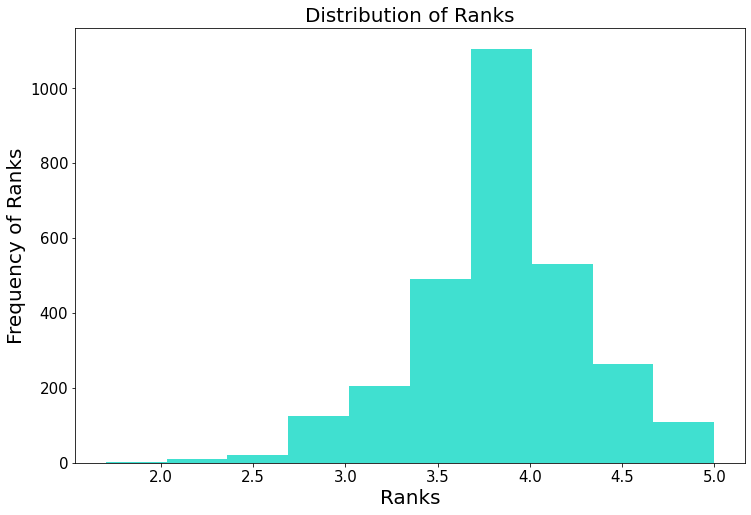

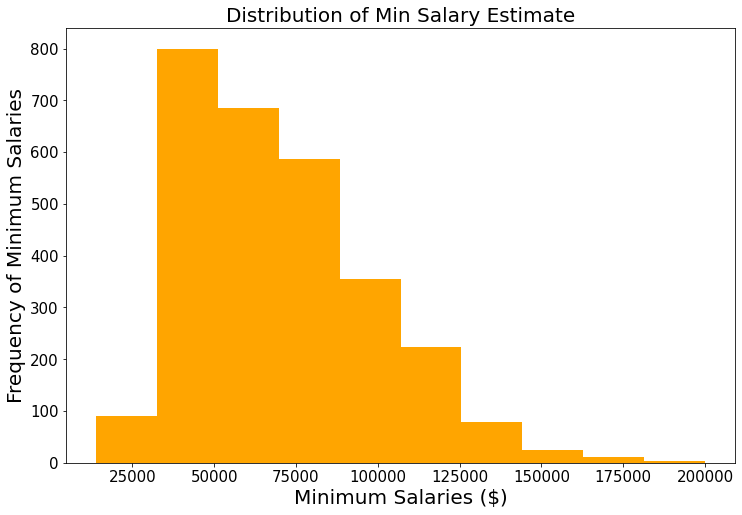

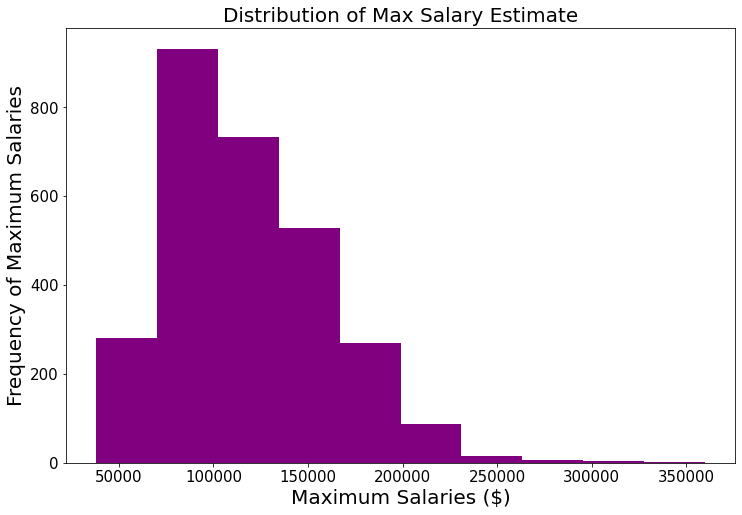

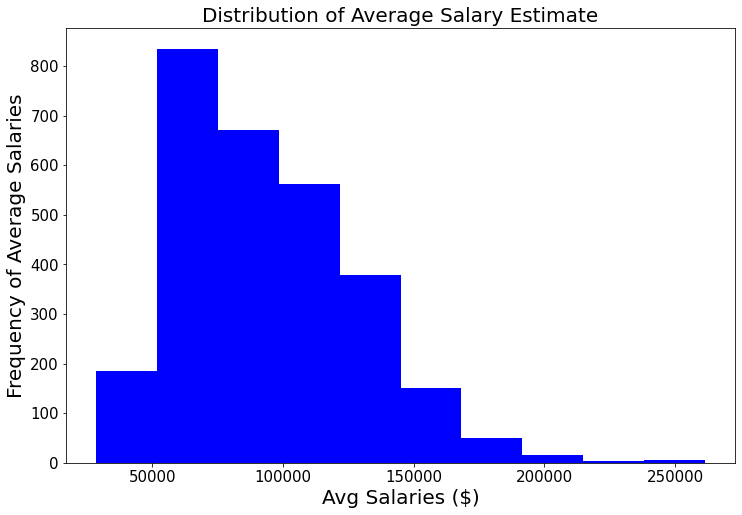

In [62]:
#How are rank, min_salary, max_salary, & avg_sal distributed?
#rank
plt.figure(figsize=(12,8))
plt.hist(jobs_df['rank'], color='turquoise')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Ranks', fontsize = 20)
plt.xlabel('Ranks', fontsize = 20)
plt.ylabel('Frequency of Ranks', fontsize = 20)
plt.show()

#min salary
plt.figure(figsize=(12,8))
plt.hist(jobs_df['min_sal'], color='orange')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Min Salary Estimate', fontsize = 20)
plt.xlabel('Minimum Salaries ($)', fontsize = 20)
plt.ylabel('Frequency of Minimum Salaries', fontsize = 20)
plt.show()

#max salary
plt.figure(figsize=(12,8))
plt.hist(jobs_df['max_sal'], color='purple')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Max Salary Estimate', fontsize = 20)
plt.xlabel('Maximum Salaries ($)', fontsize = 20)
plt.ylabel('Frequency of Maximum Salaries', fontsize = 20)
plt.show()

#avg salary
plt.figure(figsize=(12,8))
plt.hist(jobs_df['avg_sal'], color='blue')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Average Salary Estimate', fontsize = 20)
plt.xlabel('Avg Salaries ($)', fontsize = 20)
plt.ylabel('Frequency of Average Salaries', fontsize = 20)
plt.show()

**Conclusion**

All numeric columns seem to have somewhat of a normal distribution. There may be some skewness to each but overall the bell shape is there. 

#### **Salary Spread by Search City**

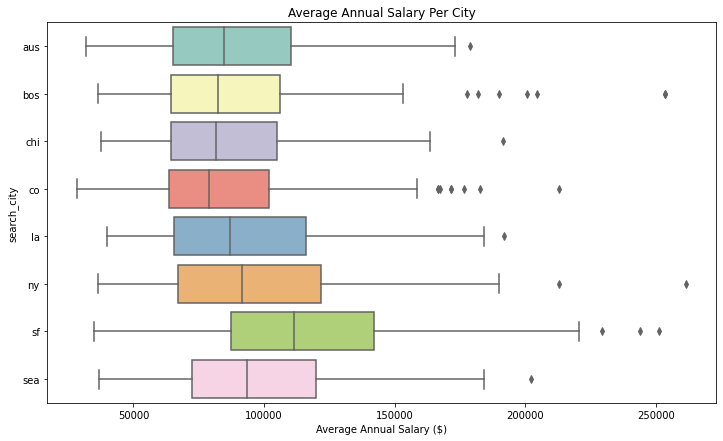

In [63]:
#how are salaries spread per city?
plt.figure(figsize=(12,7))
sns.boxplot(x='avg_sal', y='search_city', data= jobs_df, palette = 'Set3')
plt.xlabel('Average Annual Salary ($)')
plt.title('Average Annual Salary Per City')
plt.show()

#### **Salary Spread by Search Job**

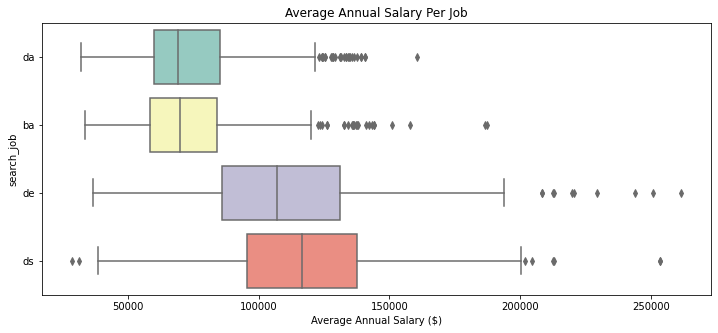

In [64]:
#how are salaries spread per job?
plt.figure(figsize=(12,5))
sns.boxplot(x='avg_sal', y='search_job', data= jobs_df, palette = 'Set3')
plt.xlabel('Average Annual Salary ($)')
plt.title('Average Annual Salary Per Job')
plt.show()

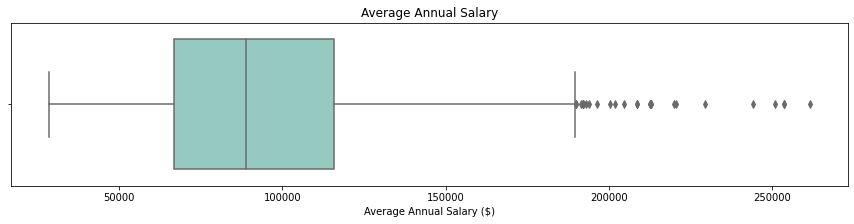

In [65]:
#how are average salaries spread?
plt.figure(figsize=(15,3))
sns.boxplot(x='avg_sal', data= jobs_df, palette = 'Set3')
plt.xlabel('Average Annual Salary ($)')
plt.title('Average Annual Salary')
plt.show()

#### **How many jobs from each search_job?**

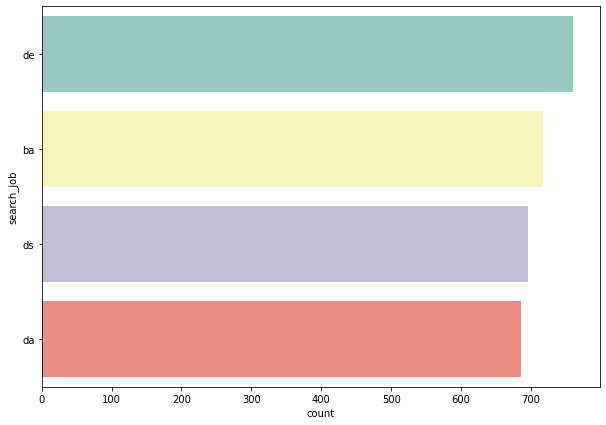

In [68]:
#How many jobs from each search_job?
plt.figure(figsize=(10,7))
sns.countplot(y='search_job', palette='Set3',data=jobs_df,
  order=jobs_df['search_job'].value_counts().index)
plt.show()

#### **Most Popular Job Titles**

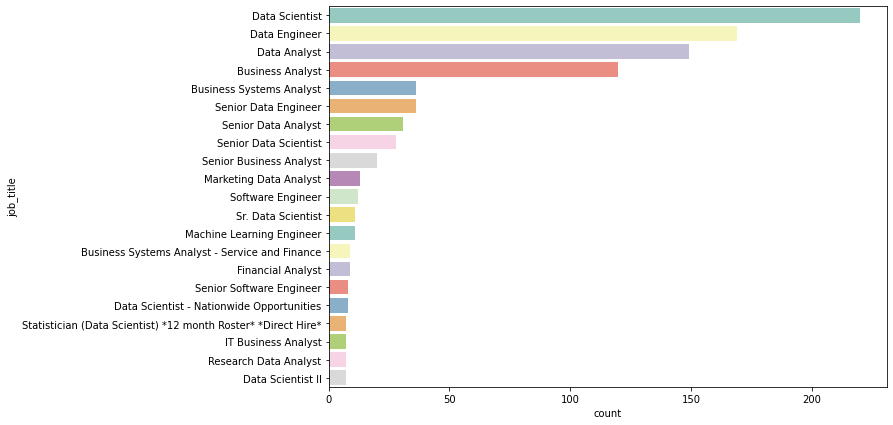

In [69]:
#Most Popular Job Titles
plt.figure(figsize=(10,7))
sns.countplot(y='job_title', palette='Set3',data=jobs_df,
  order=jobs_df['job_title'].value_counts().iloc[:21].index)
plt.show()

#### **Most Popular Search Cities**

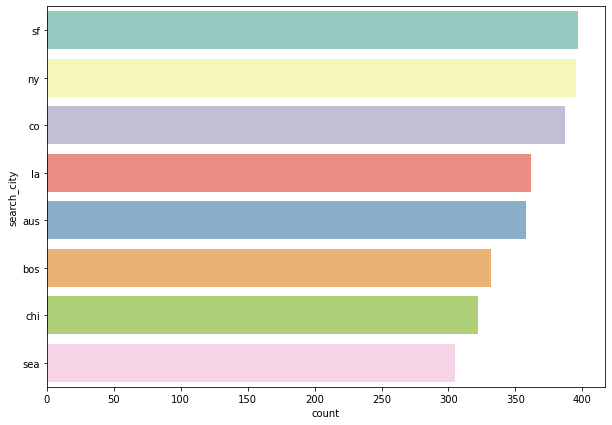

In [70]:
#Most Popular Search City
plt.figure(figsize=(10,7))
sns.countplot(y='search_city', palette='Set3',data=jobs_df,
  order=jobs_df['search_city'].value_counts().index)
plt.show()

#### **Most Popular States**

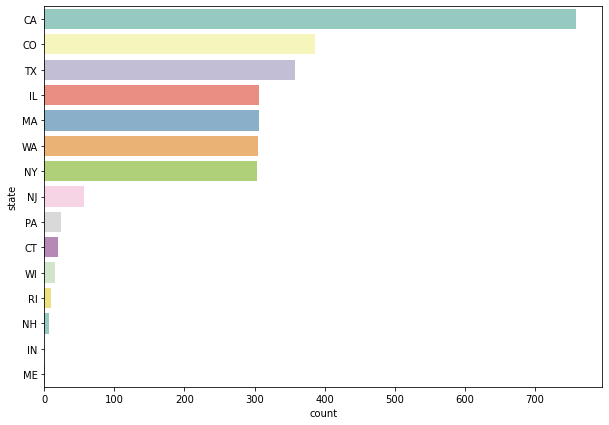

In [71]:
#Most Popular State
plt.figure(figsize=(10,7))
sns.countplot(y='state', palette='Set3',data=jobs_df,
  order=jobs_df['state'].value_counts().index)
plt.show()

#### **Glassdoor Salary Estimates vs. Employer Salary Estimates**

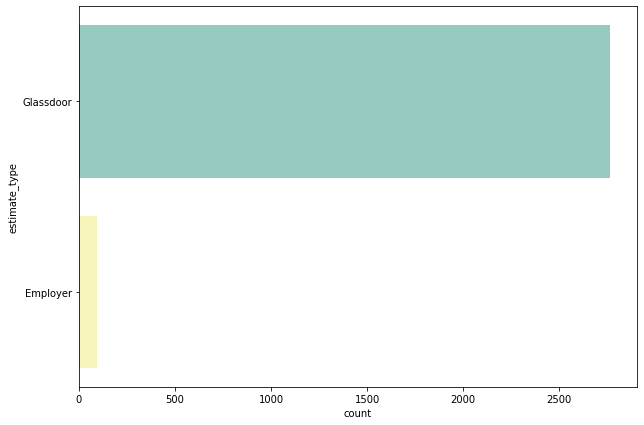

In [72]:
#Estimate Types
plt.figure(figsize=(10,7))
sns.countplot(y='estimate_type', palette='Set3',data=jobs_df,
  order=jobs_df['estimate_type'].value_counts().index)
plt.show()

#### **Most Popular Companies**

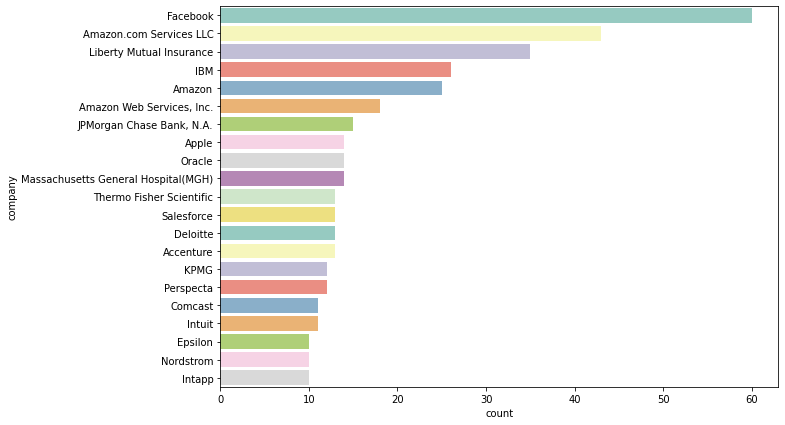

In [73]:
#Most Popular Companies
plt.figure(figsize=(10,7))
sns.countplot(y='company', palette='Set3',data=jobs_df,
  order=jobs_df['company'].value_counts().iloc[:21].index)
plt.show()

#### **Most Popular Industries**

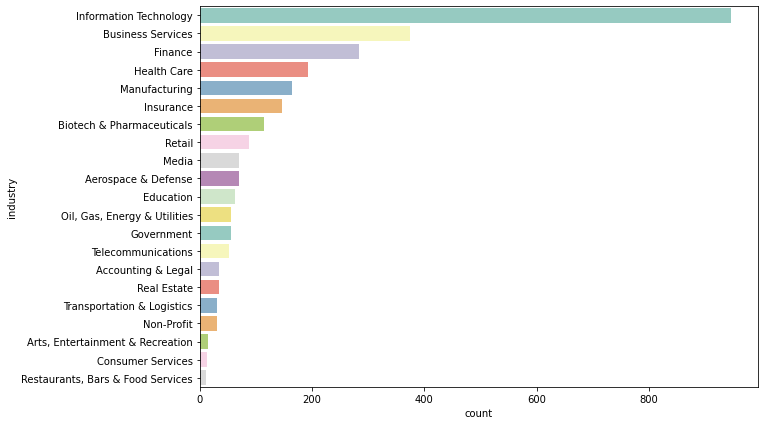

In [74]:
#Most Popular Industries
plt.figure(figsize=(10,7))
sns.countplot(y='industry', palette='Set3',data=jobs_df,
  order=jobs_df['industry'].value_counts().iloc[:21].index)
plt.show()

#### **Job Description Word Cloud**

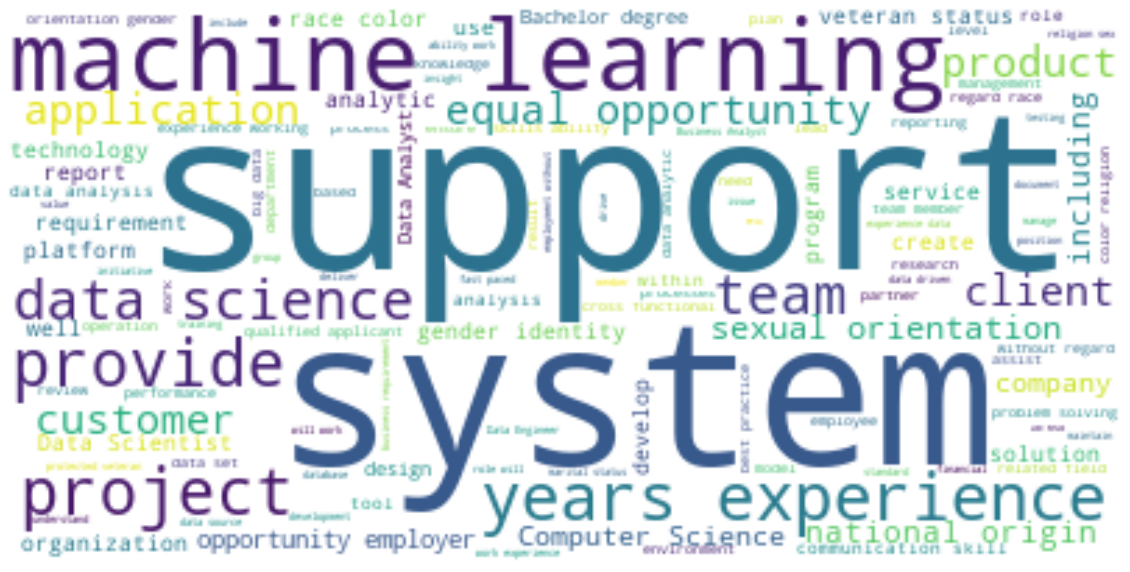

In [75]:
#most popular words in job_description
# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(" ".join(jobs_df['description']))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion**

While removal of common words is still neccessary, it seems removal or exclusion of the disclosures about race, gender, religion, disability, and veteran status may also be necessary.

### **Description Text Cleaning**

In [76]:
#make a df of just job_titles & descriptions

#create a function to clean the job_titles
def job_title_cleaning(text):
  #lowercase all letters
  text = text.lower()
  #change sr. to senior
  text = re.sub('sr.', 'senior', text)
  return text

#reg expression that will apply cleaning
round0 = lambda x: job_title_cleaning(x)

#create the df & apply cleaning to job_title
desc_df = pd.DataFrame(jobs_df.job_title.apply(round0))

#add descriptions to the df
desc_df['description'] =jobs_df['description']

desc_df.head()

,job_title,description
0,data analyst senior,Equivalent ExperienceDescription:Day to Day Re...
1,data analyst (gis),Summary/Objective:Execute transactions/tickets...
2,elint data analyst,Job DescriptionCACI delivers industry leading ...
3,data analyst,Online shopping has changed. Today’s eCommerce...
4,data analyst,Company DescriptionPublicis Sapient is a digit...


#### **Text Formatting**

In [77]:
#create a function for first round of description cleaning
def text_cleaning(text):
  #change all lowercase letters followed by uppercase letters to include a space in between
  text = re.sub('(?<=[a-z])(?=[A-Z])', ' \g<0>', text)
  #replace / with a space
  text = re.sub('/', ' ', text)
  #make all lowercase letters
  text = text.lower()
  #put a space between any numbers adjacent to a letter
  text = re.sub('(?<=[0-9])(?=[a-z])',' \g<0>', text)
  #remove  characters
  text = re.sub('', '', text)
  #convert + to plus
  text = re.sub('[+]', 'plus', text)
  #remove brackets
  text = re.sub('\[.*?\]', '', text)
  #replace: with a pace
  text = re.sub(':', ' ', text)
  #remove punctuation
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  #remove \n\n
  text = re.sub('\n\n', ' ', text)
  #remove quotation marks
  text = re.sub('[‘’“”…]', '', text)
  #change years to year
  text = re.sub('years', 'year', text)
  #change yrs to year
  text = re.sub('yrs', 'year', text)
  #change yr to year
  text = re.sub('yr', 'year', text)
  #chagnge experienceworking to experience
  text = re.sub('experienceworking', 'experience', text)
  #add a space after word degree
  text = re.sub('degree', 'degree ', text)
  #change ba to bachelors
  text = re.sub(' ba ', 'bachelors', text)
  #change bs to bachelors
  text = re.sub(' bs ', 'bachelors', text)
  #change ma to masters
  text = re.sub(' ma ', 'masters', text)
  #change ms to masters
  text = re.sub(' ms ', 'masters', text)
  #change doctoral to doctorate
  text = re.sub('doctoral', 'doctorate', text)
  #change doctorates to doctorate
  text = re.sub('doctorates', 'doctorate', text)
  #change phd to doctorate
  text = re.sub('phd', 'doctorate', text)
  #change artificial intelligence to ai
  text = re.sub('artificial intelligence', 'ai', text)
  #change natural language to nlp
  text = re.sub('natural language', 'nlp', text)
  #change nltk to nlp
  text = re.sub('nltk', 'nlp', text)
  #change machine learning to ml
  text = re.sub('machine learning', 'ml', text)
  #change mysql to sql
  text = re.sub('mysql', 'sql', text)
  #change postgresql to sql
  text = re.sub('postgresql', 'sql', text)
  #change ab testing to hypothesis testing
  text = re.sub('ab testing', 'hypothesis testing', text)
  #change dashboards to dashboard
  text = re.sub('dashboards', 'dashboard', text)
  #change dashboarding to dashboard
  text = re.sub('dashboarding', 'dashboard', text)
  #change handson analytic to nothing
  text = re.sub('handson analytic', '', text)
  #change data development to nothing
  text = re.sub('data development', '', text)
  #add space after word requirements
  text = re.sub('requirements', 'requirements ', text)
  return text

round1 = lambda x: text_cleaning(x)

In [78]:
#view updated descriptions
clean_desc = pd.DataFrame(desc_df.description.apply(round1))
clean_desc['job_title'] = desc_df['job_title']
clean_desc.head(20)

,description,job_title
0,equivalent experience description day to day r...,data analyst senior
1,summary objective execute transactions tickets...,data analyst (gis)
2,job description caci delivers industry leading...,elint data analyst
3,online shopping has changed todays e commerce ...,data analyst
4,company description publicis sapient is a digi...,data analyst
5,about gmtheres never been a more exciting time...,data analyst
6,about us at cloudflare we have our eyes set on...,data analyst
7,data analyst high tech product enablement pla...,"data analyst, high tech product & enablement p..."
8,summary posted dec 18 2020 weekly hours 40 r...,business analyst - strategic data solutions
9,vets ez veterans ez info inc a verified servic...,data analyst (remote opportunity)


In [79]:
clean_desc.head(20)

,description,job_title
0,equivalent experience description day to day r...,data analyst senior
1,summary objective execute transactions tickets...,data analyst (gis)
2,job description caci delivers industry leading...,elint data analyst
3,online shopping has changed todays e commerce ...,data analyst
4,company description publicis sapient is a digi...,data analyst
5,about gmtheres never been a more exciting time...,data analyst
6,about us at cloudflare we have our eyes set on...,data analyst
7,data analyst high tech product enablement pla...,"data analyst, high tech product & enablement p..."
8,summary posted dec 18 2020 weekly hours 40 r...,business analyst - strategic data solutions
9,vets ez veterans ez info inc a verified servic...,data analyst (remote opportunity)


#### **Excluding Stopwords**

In [80]:
#set stop_words
stop_words = nltk.corpus.stopwords.words('english')

#add some words to stop_words
new_stop_words = ['combined', 'related', 'working', 'overall', 'work', 'more', 
               'recent', 'professional', 'relevant', 'industry']

for word in new_stop_words:
  stop_words.append(word)

#filter out all stop words
cleaned_desc = pd.DataFrame(data = (clean_desc['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))))

cleaned_desc['job_title'] = clean_desc['job_title']
cleaned_desc.head()

,description,job_title
0,equivalent experience description day day resp...,data analyst senior
1,summary objective execute transactions tickets...,data analyst (gis)
2,job description caci delivers leading signals ...,elint data analyst
3,online shopping changed todays e commerce runs...,data analyst
4,company description publicis sapient digital t...,data analyst


#### **Most Popular Words WordCloud**

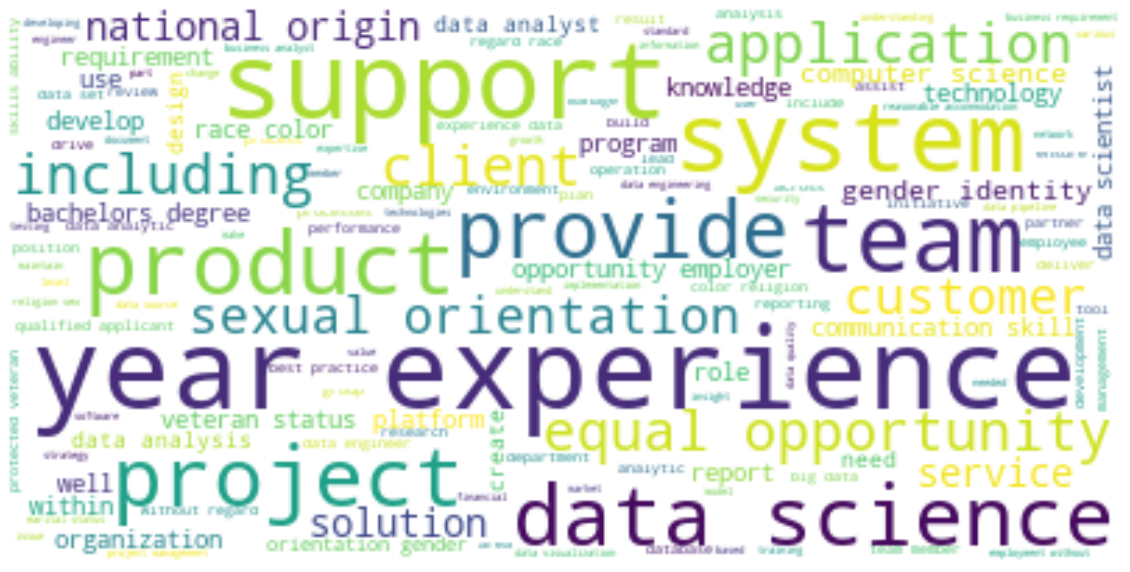

In [81]:
#most popular words in job_description
wordcloud = WordCloud(background_color='white').generate(" ".join(cleaned_desc['description']))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion**

The cleaned descriptions still contain several irrelevant words. Let's stop cleaning the text here and focus efforts on extracting pieces of information from the description with regular expressions.

### **Description Text Extraction**

#### **Text Extraction Function**

In [82]:
#function to return which option(s) form a defined pattern a descrription contains
def pattern_searcher(search_str:str, search_list:str):
    search_obj = re.search(search_list, search_str)
    if search_obj :
        return_str = search_str[search_obj.start(): search_obj.end()]
    else:
        return_str = 'NA'
    return return_str

#### **Extract Years of Experience**

In [83]:
#make a column to see if description has certain degree

years_exp = [
'6 months experience'
'1 year experience',
'one year experience',
'1plus year experience',
'oneplus year experience',
'1 plus year experience',
'one plus year experience',
'one more year experience'
'1plus year',
'oneplus year',
'1 plus year',
'one plus year',
'one year',
'1 year',
'1plus experience',
'oneplus experience',
'1 plus experience',
'one plus experience',
'2 year experience',
'two year experience',
'2plus year experience',
'twoplus year experience',
'2 plus year experience',
'two plus year experience',
'two more year experience',
'twoplus year',
'2plus year',
'two plus year',
'2 plus year',
'two year',
'2 year',
'2plus experience',
'twoplus experience',
'2 plus experience',
'two plus experience',
'3 year experience',
'35 year experience',
'three year experience',
'3plus year experience',
'threeplus year experience',
'3 plus year experience',
'three plus year experience',
'three more year experience',
'3plus year',
'threeplus year',
'3 plus year',
'three plus year',
'three year',
'3 year',
'3plus experience',
'threeplus experience',
'3 plus experience',
'three plus experience',
'4 year experience',
'four year experience',
'4plus year experience',
'fourplus year experience',
'4 plus year experience',
'four plus year experience',
'four more year experience',
'4plus year',
'fourplus year',
'4 plus year',
'four plus year',
'four year',
'4 year',
'4plus experience',
'fourplus experience',
'4 plus experience',
'four plus experience',
'5 year experience',
'five year experience',
'5plus year experience',
'fiveplus year experience',
'5 plus year experience',
'five plus year experience',
'five more year experience',
'5plus year',
'fiveplus year',
'5 plus year',
'five plus year',
'five year',
'5 year',
'5plus experience',
'fiveplus experience',
'5 plus experience',
'five plus experience',
'57 experience',
'6 year experience',
'six year experience',
'6plus year',
'sixplus year',
'6 plus year',
'six plus year',
'6plus year experience',
'sixplus year experience',
'6 plus year experience',
'six plus year experience',
'six more year experience',
'six year',
'6 year',
'6plus experience',
'sixplus experience',
'6 plus experience',
'six plus experience',
'7 year experience',
'seven year experience',
'7plus year experience',
'sevenplus year experience',
'7 plus year experience',
'seven plus year experience',
'seven more year experience',
'710 year experience',
'7plus year',
'sevenplus year',
'7 plus year',
'seven plus year',
'seven year',
'7 year',
'7plus experience',
'sevenplus experience',
'7 plus experience',
'seven plus experience',
'8 year experience',
'eight year experience',
'8plus year experience',
'eightplus year experience',
'8 plus year experience',
'eight plus year experience',
'eight more year experience',
'8plus year',
'eightplus year',
'8 plus year',
'eight plus year',
'eight year',
'8 year',
'8plus experience',
'eightplus experience',
'8 plus experience',
'eight plus experience',
'9 year experience',
'nine year experience',
'9plus year experience',
'nineplus year experience',
'9 plus year experience',
'nine plus year experience',
'nine more year experience',
'9plus year',
'nineplus year',
'9 plus year',
'nine plus year',
'nine year',
'9 year',
'9plus experience',
'nineplus experience',
'9 plus experience',
'nine plus experience',
'10 year experience',
'ten year experience',
'10plus year experience',
'tenplus year experience',
'10 plus year experience',
'ten plus year experience',
'ten more year experience',
'10plus year',
'tenplus year',
'10 plus year',
'ten plus year',
'ten year',
'10 year',
'10plus experience',
'tenplus experience',
'10 plus experience',
'ten plus experience'
]

#create a pattern
exp_pattern = '|'.join([f'(?i){year}' for year in years_exp])

#make a new column in jobs_df to represent which degree(s) a post mentions
cleaned_desc['years_exp'] = cleaned_desc['description'].apply(lambda x: pattern_searcher(search_str=x, search_list=exp_pattern))
cleaned_desc

,description,job_title,years_exp
0,equivalent experience description day day resp...,data analyst senior,3 year experience
1,summary objective execute transactions tickets...,data analyst (gis),1 year
2,job description caci delivers leading signals ...,elint data analyst,7 year experience
3,online shopping changed todays e commerce runs...,data analyst,3plus year experience
4,company description publicis sapient digital t...,data analyst,8plus year experience
...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4plus year
2854,looking talented data scientist join ml ai ml ...,data scientist,NA
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3plus year experience
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4plus year


In [84]:
cleaned_desc['years_exp'][82] = '1plus year'

In [85]:
#check how many observations are NA
cleaned_desc_na = cleaned_desc['years_exp'] == 'NA'
cleaned_desc.iloc[cleaned_desc_na.values]

,description,job_title,years_exp
6,us cloudflare eyes set ambitious goal help bui...,data analyst,NA
13,introduction ibm job calling build design code...,data analyst (remediation),NA
15,momentum solar premier residential solar provi...,solar data analyst,NA
18,job summary commercial junior data analyst ass...,cmcrl jr. data analyst,NA
21,summary data analyst position member nfps fina...,data analyst ii,NA
...,...,...,...
2838,e bay global commerce leader allows influence ...,data scientist,NA
2840,facebooks mission give people power build comm...,"data scientist, analytics - messenger inbox",NA
2842,facebooks mission give people power build comm...,"data scientist, product analytics - ads ranking",NA
2852,facebooks mission give people power build comm...,research data scientist,NA


In [86]:
#change years_exp to one specific number or NA value
six_mos = ['6 months experience']

one_year = ['1 year experience','one year experience','1plus year experience',
'oneplus year experience','1 plus year experience','one plus year experience',
'one more year experience''1plus year','oneplus year','1 plus year',
'one plus year','one year','1 year','1plus experience','oneplus experience',
'1 plus experience','one plus experience']

two_years = ['2 year experience','two year experience','2plus year experience',
'twoplus year experience','2 plus year experience','two plus year experience',
'two more year experience','twoplus year','2plus year','two plus year',
'2 plus year','two year','2 year','2plus experience','twoplus experience',
'2 plus experience','two plus experience']

three_years = ['3 year experience','35 year experience','three year experience',
'3plus year experience','threeplus year experience','3 plus year experience',
'three plus year experience','three more year experience','3plus year',
'threeplus year','3 plus year','three plus year','three year','3 year',
'3plus experience','threeplus experience','3 plus experience',
'three plus experience']

four_years = ['4 year experience','four year experience','4plus year experience',
'fourplus year experience','4 plus year experience','four plus year experience',
'four more year experience','4plus year','fourplus year','4 plus year',
'four plus year','four year','4 year','4plus experience','fourplus experience',
'4 plus experience','four plus experience']

five_years = ['5 year experience','five year experience','5plus year experience',
'fiveplus year experience','5 plus year experience','five plus year experience',
'five more year experience','5plus year','fiveplus year','5 plus year',
'five plus year','five year','5 year','5plus experience','fiveplus experience',
'5 plus experience','five plus experience','57 experience']

six_years = ['6 year experience','six year experience','6plus year',
'sixplus year','6 plus year','six plus year','6plus year experience',
'sixplus year experience','6 plus year experience','six plus year experience',
'six more year experience','six year','6 year','6plus experience',
'sixplus experience','6 plus experience','six plus experience']

seven_years = ['7 year experience','seven year experience','7plus year experience',
'sevenplus year experience','7 plus year experience','seven plus year experience',
'seven more year experience','710 year experience','7plus year','sevenplus year',
'7 plus year','seven plus year','seven year','7 year','7plus experience',
'sevenplus experience','7 plus experience','seven plus experience']

eight_years = ['8 year experience','eight year experience',
'8plus year experience','eightplus year experience','8 plus year experience',
'eight plus year experience','eight more year experience','8plus year',
'eightplus year','8 plus year','eight plus year','eight year','8 year',
'8plus experience','eightplus experience','8 plus experience',
'eight plus experience']

nine_years = ['9 year experience','nine year experience','9plus year experience',
'nineplus year experience','9 plus year experience','nine plus year experience',
'nine more year experience','9plus year','nineplus year','9 plus year',
'nine plus year','nine year','9 year','9plus experience','nineplus experience',
'9 plus experience','nine plus experience']

ten_years = ['10 year experience','ten year experience','10plus year experience',
'tenplus year experience','10 plus year experience','ten plus year experience',
'ten more year experience','10plus year','tenplus year','10 plus year',
'ten plus year','ten year','10 year','10plus experience','tenplus experience',
'10 plus experience','ten plus experience']

cleaned_desc['years_exp'] = cleaned_desc['years_exp'].apply(lambda x:0.5 if x in six_mos else 1 if x in one_year else 2 if x in two_years else 3 if x in three_years else 4 if x in four_years else 5 if x in five_years else 6 if x in six_years else 7 if x in seven_years else 8 if x in eight_years else 9 if x in nine_years else 10 if x in ten_years else -1)
cleaned_desc

,description,job_title,years_exp
0,equivalent experience description day day resp...,data analyst senior,3
1,summary objective execute transactions tickets...,data analyst (gis),1
2,job description caci delivers leading signals ...,elint data analyst,7
3,online shopping changed todays e commerce runs...,data analyst,3
4,company description publicis sapient digital t...,data analyst,8
...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4
2854,looking talented data scientist join ml ai ml ...,data scientist,-1
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4


In [87]:
#create a df for nlp analysis in a separate notebook
# nlp_desc = pd.DataFrame()
# nlp_desc['description'] = cleaned_desc['description']
# nlp_desc['avg_sal'] = jobs_df['avg_sal']
# nlp_desc

**Note**

Since we found around 84% of the postings mentioning years of experience, analysis may contain model testing on one dataframe that includes years of experience and on others that would contain less data, without years of experience. Correlation of avg_sal & years of experience will tell us which route is appropriate.

#### **Extract Degrees**

In [88]:
#make a column to see if description has certain degree
degrees = ['associates', 'bachelors', 'masters', 'doctorate']

for degree in degrees:
  cleaned_desc[degree] = clean_desc['description'].apply(lambda x: 1 if degree in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0
...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0


#### **Extract Senior Job Titles**

In [89]:
senior_lead = ['senior', 'lead', 'principal', 'manager']
for item in senior_lead:
  cleaned_desc[item] = clean_desc['job_title'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0,0,0,0,0
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0,0,0,0,0
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0,0,0,0,0
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0,0,0,0,0


In [90]:
#check if any of the senior job titles are all 0
cleaned_desc[['senior', 'lead', 'principal', 'manager']].nunique()

senior       2
lead         2
principal    2
manager      2
dtype: int64

#### **Extract Languages**

In [91]:
languages = ['bash','cplusplus','html','java','javascript','julia','matlab',
'oracle','python',' r ','ruby','sas','scala','sql']
for language in languages:
  cleaned_desc[language] = clean_desc['description'].apply(lambda x: 1 if language in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [92]:
#check if any of the languages are all 0
cleaned_desc[['bash','cplusplus','html','java','javascript','julia','matlab',
'oracle','python',' r ','ruby','sas','scala','sql']].nunique()

bash          2
cplusplus     2
html          2
java          2
javascript    2
julia         2
matlab        2
oracle        2
python        2
 r            2
ruby          2
sas           2
scala         2
sql           2
dtype: int64

#### **Extract Coding Interfaces**

In [93]:
code_interfraces = ['colab','command line','git ','github','jupyter','notebook']
for item in code_interfraces:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,colab,command line,git,github,jupyter,notebook
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0


In [94]:
#check if any of the code interfraces are all 0
cleaned_desc[['colab','command line','git ','github','jupyter','notebook']].nunique()

colab           2
command line    2
git             2
github          2
jupyter         2
notebook        2
dtype: int64

In [95]:
#drop colab from df
cleaned_desc.drop(columns='colab', inplace=True)

#### **Extract Visualization Platforms**

In [96]:
dashboards = ['dashboard','data studio','looker','power bi','sisense','tableau']
for dashboard in dashboards:
  cleaned_desc[dashboard] = clean_desc['description'].apply(lambda x: 1 if dashboard in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [97]:
#check if any of the dashboards are all 0
cleaned_desc[['dashboard','data studio','looker','power bi','sisense','tableau']].nunique()

dashboard      2
data studio    2
looker         2
power bi       2
sisense        2
tableau        2
dtype: int64

#### **Extract Big Data Skills**

In [98]:
big_data = ['airflow','big data','bigquery','cassandra','docker','etl','hadoop',
'hbase','hdfs','hive','impala','kafka','kubeflow','kubernetes']
for tool in big_data:
  cleaned_desc[tool] = clean_desc['description'].apply(lambda x: 1 if tool in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,docker,etl,hadoop,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
#check if any of the big data tools had only 1 unique value
cleaned_desc[['airflow','big data','bigquery','cassandra','docker','etl','hadoop',
'hbase','hdfs','hive','impala','kafka','kubeflow','kubernetes']].nunique()

airflow       2
big data      2
bigquery      2
cassandra     2
docker        2
etl           2
hadoop        2
hbase         2
hdfs          2
hive          2
impala        2
kafka         2
kubeflow      2
kubernetes    2
dtype: int64

#### **Extract Cloud Skills**

In [100]:
clouds = ['aws','azure','dynamodb','ec2','gcp','google cloud','lambda','mongodb',
'redshift','s3','saas','snowflake']
for cloud in clouds:
  cleaned_desc[cloud] = clean_desc['description'].apply(lambda x: 1 if cloud in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,docker,etl,hadoop,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
#check if any of the cloud tools are all 0
cleaned_desc[['aws','azure','dynamodb','ec2','gcp','google cloud','lambda','mongodb',
'redshift','s3','saas','snowflake']].nunique()

aws             2
azure           2
dynamodb        1
ec2             2
gcp             2
google cloud    2
lambda          2
mongodb         2
redshift        2
s3              2
saas            2
snowflake       2
dtype: int64

#### **Extract Outside Platform Tools**

In [102]:
platforms = ['google analytics','google sheets','linux','microsoft', 'microsoft excel',
'powerpoint','salesforce']
for item in platforms:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,docker,etl,hadoop,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [103]:
#check if any of the outside platform tools are all 0
cleaned_desc[['google analytics','google sheets','linux','microsoft', 'microsoft excel',
'powerpoint','salesforce']].nunique()

google analytics    2
google sheets       2
linux               2
microsoft           2
microsoft excel     2
powerpoint          2
salesforce          2
dtype: int64

#### **Extract Data Science Concepts**

In [104]:
concepts = [' ai ','ajax','api','etl','forecasting','hypothesis testing',
'json','kpi',' ml ','nlp','pipeline','predictive','regression','statistical',
'time series']
for item in concepts:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
#check if any of the ds concepts are all 0
cleaned_desc[[' ai ','ajax','api','etl','forecasting','hypothesis testing',
'json','kpi',' ml ','nlp','pipeline','predictive','regression','statistical',
'time series']].nunique()

 ai                   2
ajax                  2
api                   2
etl                   2
forecasting           2
hypothesis testing    2
json                  2
kpi                   2
 ml                   2
nlp                   2
pipeline              2
predictive            2
regression            2
statistical           2
time series           2
dtype: int64

#### **Extract Libraries**

In [106]:
libraries = ['matplotlib','numpy','pandas','scikit','seaborn']
for item in libraries:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
#check if any of the libraries are all 0
cleaned_desc[['matplotlib','numpy','pandas','scikit','seaborn']].nunique()

matplotlib    2
numpy         2
pandas        2
scikit        2
seaborn       2
dtype: int64

#### **Extract Deep Learning Techniques**

In [108]:
deep_learning = ['apache','keras','neural','spark','tensorflow']
for item in deep_learning:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn,apache,keras,neural,spark,tensorflow
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
#check if any of the deeep learning techniques are all 0
cleaned_desc[['apache','keras','neural','spark','tensorflow']].nunique()

apache        2
keras         2
neural        2
spark         2
tensorflow    2
dtype: int64

#### **Extract Web Application Platforms**

In [110]:
web_apps = ['bottle','cherrypy','django','flask','pyramid','quixote',
            'turbogears','web2py']
for item in web_apps:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn,apache,keras,neural,spark,tensorflow,bottle,cherrypy,django,flask,pyramid,quixote,turbogears,web2py
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,masters degree computer science engineering st...,renewable optimization data scientist,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2854,looking talented data scientist join ml ai ml ...,data scientist,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2855,bachelors degree 3plus year experience data sc...,"data scientist, ww consumer controllership dat...",3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2856,facebook shops ecosystems teams mission evolve...,data scientist - shops seller ecosystem,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
#check if any of the web application platforms are all 0
cleaned_desc[['bottle','cherrypy','django','flask','pyramid','quixote',
            'turbogears','web2py']].nunique()

bottle        2
cherrypy      1
django        2
flask         2
pyramid       1
quixote       1
turbogears    1
web2py        1
dtype: int64

In [112]:
cleaned_desc.drop(columns=['cherrypy','pyramid','quixote',
            'turbogears','web2py'], inplace=True)

### **Skills Visualizations**

#### **Most Popular Years of Experience**

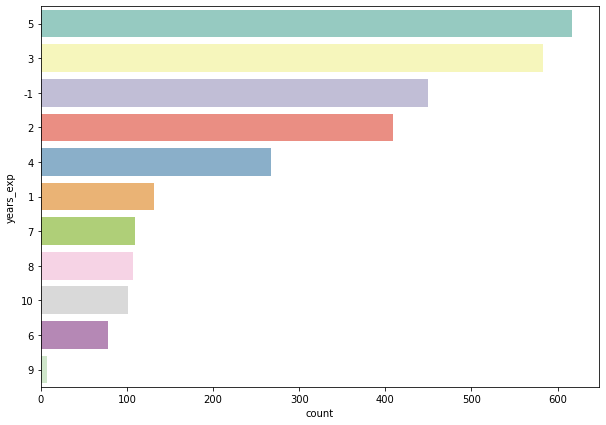

In [113]:
plt.figure(figsize=(10,7))
sns.countplot(y='years_exp', palette='Set3',data=cleaned_desc,
  order=cleaned_desc['years_exp'].value_counts().index)
plt.show()

**Interpretation**

Most job postings did not define years of experience, or we didn't account for them accurattely. However if years of experience were detected, it was most commonly 5 or 3 years of experience.

#### **Most Popular Degrees**

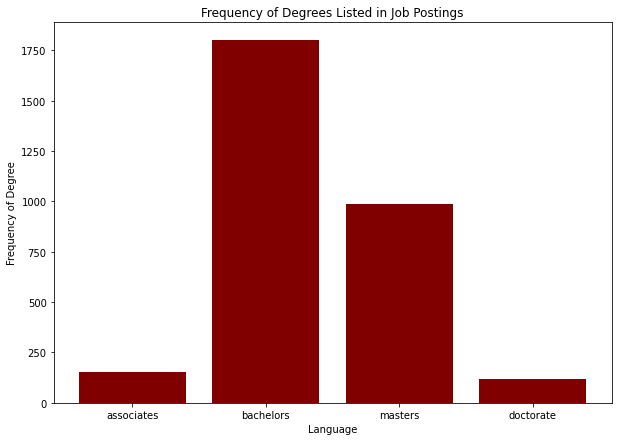

In [114]:
#create a sum of each degree column
associates_sum = sum(cleaned_desc['associates'])
bachelors_sum = sum(cleaned_desc['bachelors'])
masters_sum = sum(cleaned_desc['masters'])
doctorate_sum = sum(cleaned_desc['doctorate'])

#make a dictionary of degree sums so we can plot visualization
degree_sums = {'associates':associates_sum, 'bachelors': bachelors_sum, 
               'masters': masters_sum, 'doctorate': doctorate_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(degree_sums)), list(degree_sums.values()), align='center', color='maroon')
plt.xticks(range(len(degree_sums)), list(degree_sums.keys()))
plt.ylabel('Frequency of Degree')
plt.title('Frequency of Degrees Listed in Job Postings')
plt.xlabel('Language')
plt.show()


**Interpretation**

If a degree is mentioned it's most often a bachelors or masters degree. 

#### **How Many Senior Job Titles?**

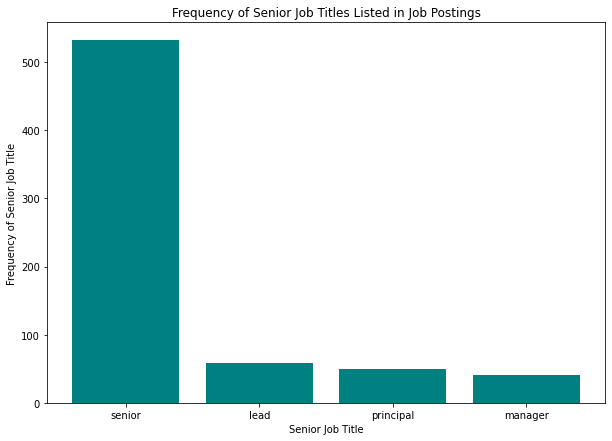

In [115]:
#create a sum of each visualization column
senior_sum = sum(cleaned_desc['senior'])
lead_sum = sum(cleaned_desc['lead'])
principal_sum = sum(cleaned_desc['principal'])
manager_sum = sum(cleaned_desc['manager'])

#make a dictionary of visualization sums so we can plot visualization
title_sums = {'senior':senior_sum, 'lead':lead_sum, 'principal':principal_sum,
              'manager':manager_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(title_sums)), list(title_sums.values()), align='center', color='teal')
plt.xticks(range(len(title_sums)), list(title_sums.keys()))
plt.ylabel('Frequency of Senior Job Title')
plt.title('Frequency of Senior Job Titles Listed in Job Postings')
plt.xlabel('Senior Job Title')
plt.show()

**Interpretation**

About 20% of jobs had senior in the title and much fewer had lead, principal, or manager.

#### **Most Popular Languages**

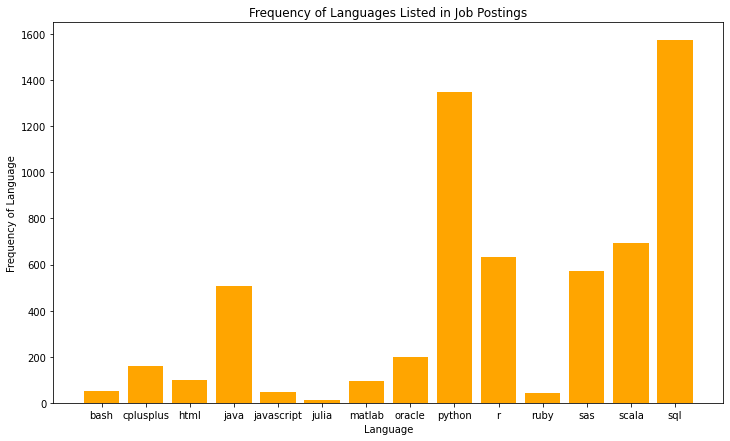

In [116]:
#create a sum of each language column
bash_sum = sum(cleaned_desc['bash'])
cplusplus_sum = sum(cleaned_desc['cplusplus'])
html_sum = sum(cleaned_desc['html'])
java_sum = sum(cleaned_desc['java'])
javascript_sum = sum(cleaned_desc['javascript'])
julia_sum = sum(cleaned_desc['julia'])
matlab_sum = sum(cleaned_desc['matlab'])
oracle_sum = sum(cleaned_desc['oracle'])
python_sum = sum(cleaned_desc['python'])
r_sum = sum(cleaned_desc[' r '])
ruby_sum = sum(cleaned_desc['ruby'])
sas_sum = sum(cleaned_desc['sas'])
scala_sum = sum(cleaned_desc['scala'])
sql_sum = sum(cleaned_desc['sql'])

#make a dictionary of language sums so we can plot visualization
language_sums = {'bash':bash_sum,'cplusplus': cplusplus_sum,'html':html_sum,
'java':java_sum,'javascript':javascript_sum,'julia':julia_sum,'matlab':matlab_sum,
'oracle': oracle_sum,'python':python_sum,'r':r_sum, 'ruby':ruby_sum, 
'sas':sas_sum,'scala':scala_sum,'sql':sql_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(language_sums)), list(language_sums.values()), align='center', color='orange')
plt.xticks(range(len(language_sums)), list(language_sums.keys()))
plt.ylabel('Frequency of Language')
plt.title('Frequency of Languages Listed in Job Postings')
plt.xlabel('Language')
plt.show()

**Interpretation**

The most important languages to have are sql and python but java, r, sas, and scala were mentioned somewhat frequently as well.  

#### **Most Popular Coding Interfaces**

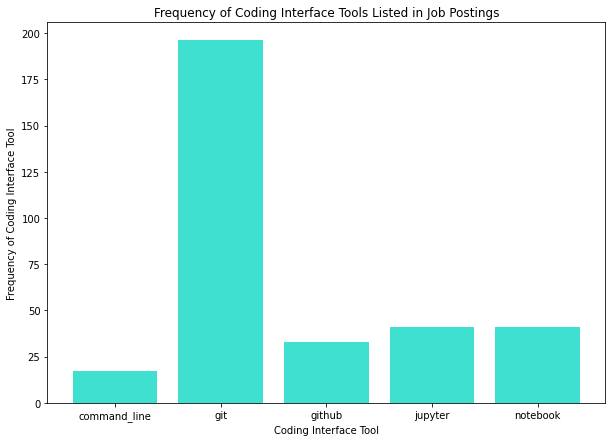

In [117]:
#create a sum of each coding interface column
command_line_sum = sum(cleaned_desc['command line'])
git_sum = sum(cleaned_desc['git '])
github_sum = sum(cleaned_desc['github'])
jupyter_sum = sum(cleaned_desc['jupyter'])
notebook_sum = sum(cleaned_desc['notebook'])

#make a dictionary of coding interface sums so we can plot visualization
vis_sums = {'command_line':command_line_sum, 'git':git_sum, 
'github': github_sum, 'jupyter': jupyter_sum,'notebook': notebook_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(vis_sums)), list(vis_sums.values()), align='center', color='turquoise')
plt.xticks(range(len(vis_sums)), list(vis_sums.keys()))
plt.ylabel('Frequency of Coding Interface Tool')
plt.title('Frequency of Coding Interface Tools Listed in Job Postings')
plt.xlabel('Coding Interface Tool')
plt.show()

**Interpretation**

Coding interfaces are mentioned infrequently. 

#### **Most Popular Visualization Tools**

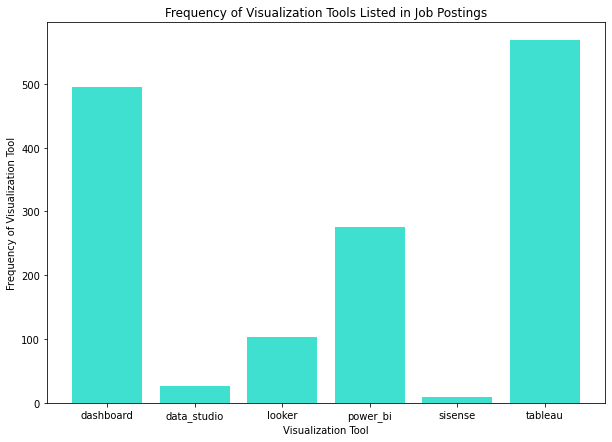

In [118]:
#create a sum of each visualization column
dashboard_sum = sum(cleaned_desc['dashboard'])
data_studio_sum = sum(cleaned_desc['data studio'])
looker_sum = sum(cleaned_desc['looker'])
power_bi_sum = sum(cleaned_desc['power bi'])
sisense_sum = sum(cleaned_desc['sisense'])
tableau_sum = sum(cleaned_desc['tableau'])

#make a dictionary of visualization sums so we can plot visualization
vis_sums = {'dashboard': dashboard_sum,'data_studio': data_studio_sum,
'looker': looker_sum,'power_bi': power_bi_sum,'sisense': sisense_sum,
'tableau': tableau_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(vis_sums)), list(vis_sums.values()), align='center', color='turquoise')
plt.xticks(range(len(vis_sums)), list(vis_sums.keys()))
plt.ylabel('Frequency of Visualization Tool')
plt.title('Frequency of Visualization Tools Listed in Job Postings')
plt.xlabel('Visualization Tool')
plt.show()

**Interpretation**

If a dashboarding tool is mentioned, tableau is most often the tool of choice followed by dashboard in general. 

#### **Most Popular Big Data Skills**

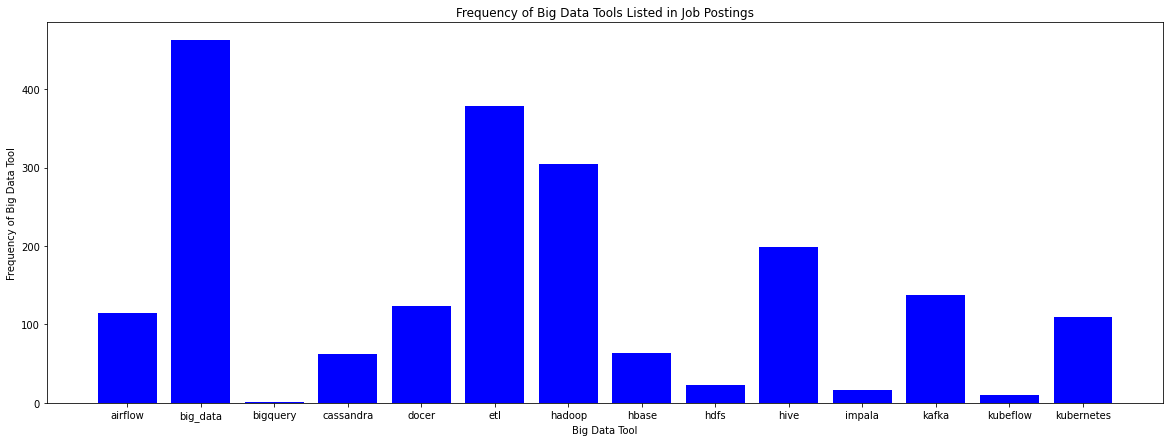

In [119]:
#create a sum of each big data column
airflow_sum = sum(cleaned_desc['airflow'])
big_data_sum = sum(cleaned_desc['big data'])
bigquery_sum = sum(cleaned_desc['bigquery'])
cassandra_sum = sum(cleaned_desc['cassandra'])
docker_sum = sum(cleaned_desc['docker'])
etl_sum = sum(cleaned_desc['etl'])
hadoop_sum = sum(cleaned_desc['hadoop'])
hbase_sum = sum(cleaned_desc['hbase'])
hdfs_sum = sum(cleaned_desc['hdfs']) 
hive_sum = sum(cleaned_desc['hive']) 
impala_sum = sum(cleaned_desc['impala'])
kafka_sum = sum(cleaned_desc['kafka'])
kubeflow_sum = sum(cleaned_desc['kubeflow'])
kubernetes_sum = sum(cleaned_desc['kubernetes'])

#make a dictionary of big data sums so we can plot visualization
big_data_sums = {'airflow': airflow_sum,'big_data': big_data_sum,
'bigquery': bigquery_sum,'cassandra': cassandra_sum, 'docer':docker_sum,'etl': etl_sum,
'hadoop': hadoop_sum,'hbase': hbase_sum,'hdfs': hdfs_sum,'hive': hive_sum,
'impala': impala_sum,'kafka': kafka_sum,'kubeflow': kubeflow_sum,
'kubernetes': kubernetes_sum}

plt.figure(figsize=(20,7))
plt.bar(range(len(big_data_sums)), list(big_data_sums.values()), align='center', color='blue')
plt.xticks(range(len(big_data_sums)), list(big_data_sums.keys()))
plt.ylabel('Frequency of Big Data Tool')
plt.title('Frequency of Big Data Tools Listed in Job Postings')
plt.xlabel('Big Data Tool')
plt.show()

**Interpretation**

Big data skills aren't mentioned in most jobs but if they are, big data and etl are in general is mentioned, and most popular specific tool is hadoop.

#### **Most Popular Cloud Skills**

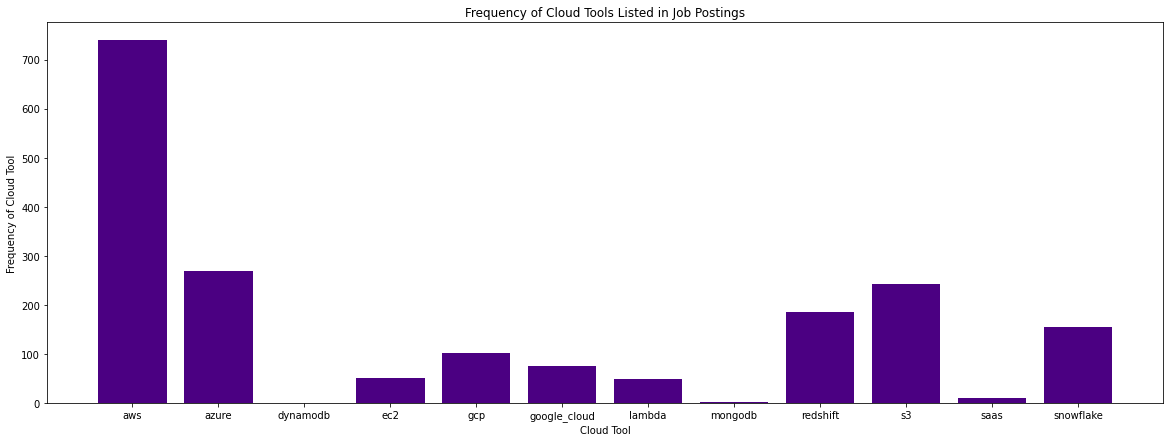

In [120]:
#create a sum of each cloud column
aws_sum = sum(cleaned_desc['aws'])
azure_sum = sum(cleaned_desc['azure'])
dynamodb_sum = sum(cleaned_desc['dynamodb'])
ec2_sum = sum(cleaned_desc['ec2'])
gcp_sum = sum(cleaned_desc['gcp'])
google_cloud_sum = sum(cleaned_desc['google cloud'])
lambda_sum = sum(cleaned_desc['lambda']) 
mongodb_sum = sum(cleaned_desc['mongodb'])
redshift_sum = sum(cleaned_desc['redshift'])
s3_sum = sum(cleaned_desc['s3'])
saas_sum = sum(cleaned_desc['saas'])
snowflake_sum = sum(cleaned_desc['snowflake'])

#make a dictionary of cloud sums so we can plot visualization
cloud_sums = {'aws': aws_sum,'azure': azure_sum,'dynamodb': dynamodb_sum,
'ec2': ec2_sum,'gcp': gcp_sum,'google_cloud': google_cloud_sum,
'lambda': lambda_sum,'mongodb': mongodb_sum,'redshift': redshift_sum,
's3': s3_sum, 'saas': saas_sum, 'snowflake':snowflake_sum}

plt.figure(figsize=(20,7))
plt.bar(range(len(cloud_sums)), list(cloud_sums.values()), align='center', color='indigo')
plt.xticks(range(len(cloud_sums)), list(cloud_sums.keys()))
plt.ylabel('Frequency of Cloud Tool')
plt.title('Frequency of Cloud Tools Listed in Job Postings')
plt.xlabel('Cloud Tool')
plt.show()

**Interpretation**

The most frequently mentioned cloud platform is aws.

#### **Most Popular Outside Platform Tools**

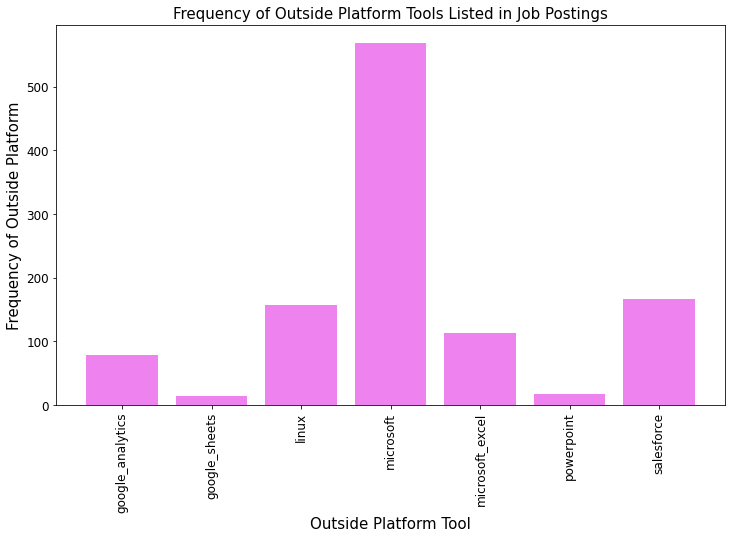

In [121]:
#create a sum of each outside platform tool
google_analytics_sum = sum(cleaned_desc['google analytics'])
google_sheets_sum = sum(cleaned_desc['google sheets'])
linux_sum = sum(cleaned_desc['linux'])
microsoft_sum = sum(cleaned_desc['microsoft'])
microsoft_excel_sum = sum(cleaned_desc['microsoft excel'])
powerpoint_sum = sum(cleaned_desc['powerpoint'])
salesforce_sum = sum(cleaned_desc['salesforce'])

#make a dictionary of miscellaneous outside platform sums so we can plot visualization
platform_sums = {'google_analytics':google_analytics_sum,
'google_sheets':google_sheets_sum,'linux':linux_sum,'microsoft':microsoft_sum,
'microsoft_excel':microsoft_excel_sum, 'powerpoint':powerpoint_sum,
'salesforce':salesforce_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(platform_sums)), list(platform_sums.values()), align='center', color='violet')
plt.xticks(range(len(platform_sums)), list(platform_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Outside Platform', fontsize=15)
plt.title('Frequency of Outside Platform Tools Listed in Job Postings',fontsize=15)
plt.xlabel('Outside Platform Tool', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned outside platform is microsoft.

#### **Most Popular Data Science Concepts**

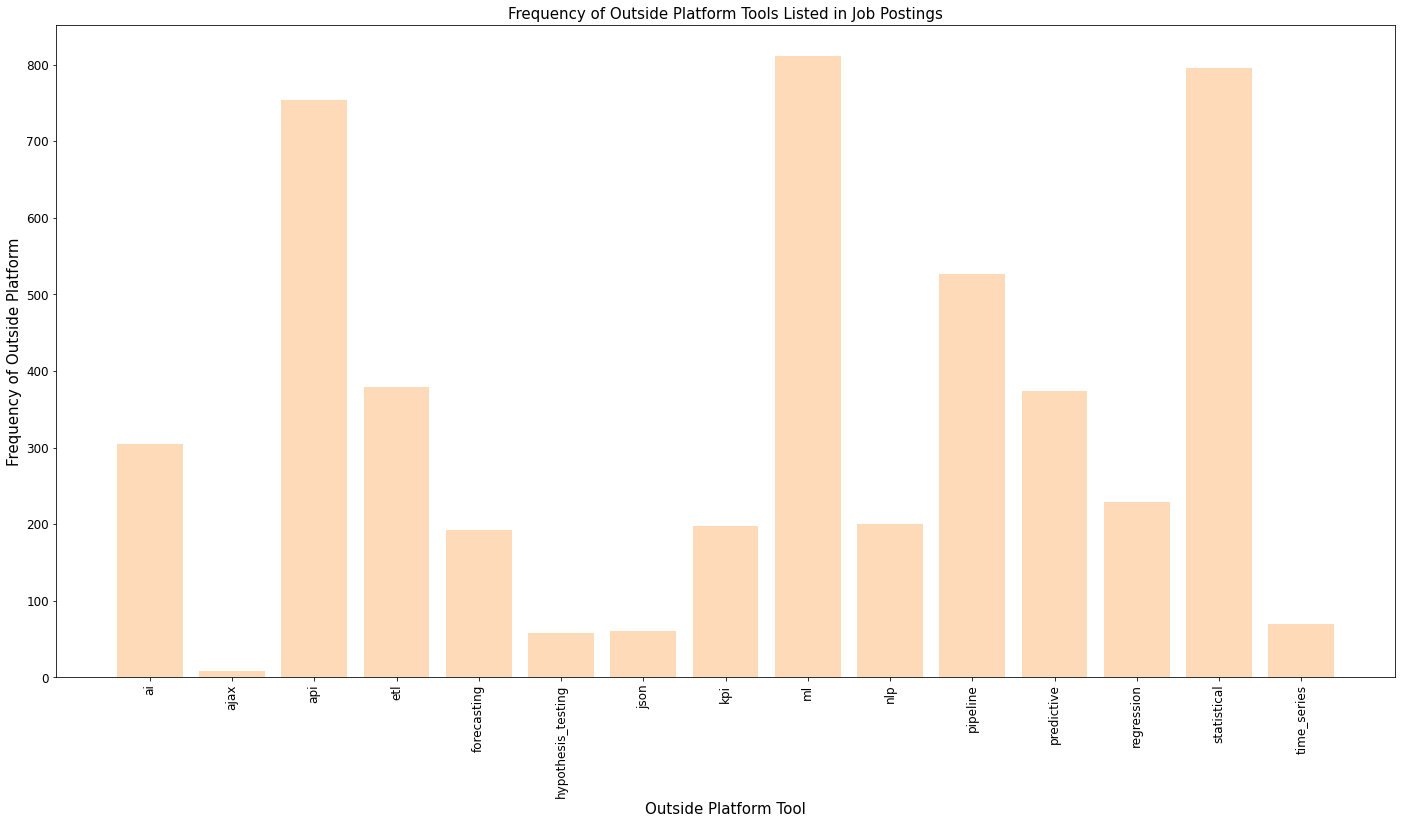

In [122]:
#create a sum of each ds concept
ai_sum = sum(cleaned_desc[' ai '])
ajax_sum = sum(cleaned_desc['ajax'])
api_sum = sum(cleaned_desc['api'])
etl_sum = sum(cleaned_desc['etl'])
forecasting_sum = sum(cleaned_desc['forecasting'])
hypothesis_testing_sum = sum(cleaned_desc['hypothesis testing'])
json_sum = sum(cleaned_desc['json'])
kpi_sum = sum(cleaned_desc['kpi'])
ml_sum = sum(cleaned_desc[' ml '])
nlp_sum = sum(cleaned_desc['nlp'])
pipeline_sum = sum(cleaned_desc['pipeline'])
predictive_sum = sum(cleaned_desc['predictive'])
regression_sum = sum(cleaned_desc['regression'])
statistical_sum = sum(cleaned_desc['statistical'])
time_series_sum = sum(cleaned_desc['time series'])

#make a dictionary of ds concept sums so we can plot visualization
platform_sums = {'ai':ai_sum,'ajax':ajax_sum,'api':api_sum,'etl':etl_sum,
'forecasting': forecasting_sum,'hypothesis_testing': hypothesis_testing_sum,
'json': json_sum,'kpi': kpi_sum,'ml': ml_sum,'nlp': nlp_sum,'pipeline': pipeline_sum,
'predictive': predictive_sum,'regression': regression_sum,
'statistical': statistical_sum,'time_series': time_series_sum}

plt.figure(figsize=(24, 12))
plt.bar(range(len(platform_sums)), list(platform_sums.values()), align='center', color='peachpuff')
plt.xticks(range(len(platform_sums)), list(platform_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Outside Platform', fontsize=15)
plt.title('Frequency of Outside Platform Tools Listed in Job Postings',fontsize=15)
plt.xlabel('Outside Platform Tool', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned skills are api, etl, ml (machine learning), pipeline, predictive, and statistics.

#### **Most Popular Libraries**

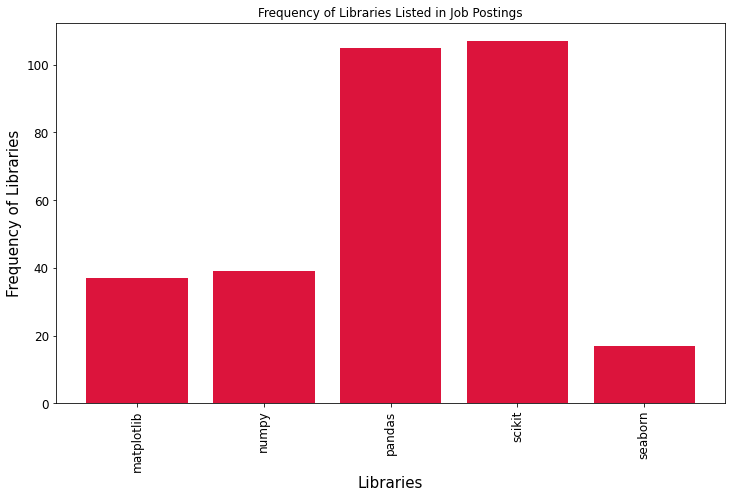

In [123]:
#create a sum of each library
matplotlib_sum = sum(cleaned_desc['matplotlib'])
numpy_sum = sum(cleaned_desc['numpy'])
pandas_sum = sum(cleaned_desc['pandas'])
scikit_sum = sum(cleaned_desc['scikit'])
seaborn_sum = sum(cleaned_desc['seaborn'])

#make a dictionary of libraries so we can plot visualization
library_sums = {'matplotlib':matplotlib_sum,'numpy':numpy_sum,
'pandas': pandas_sum,'scikit': scikit_sum,'seaborn': seaborn_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(library_sums)), list(library_sums.values()), align='center', color='crimson')
plt.xticks(range(len(library_sums)), list(library_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Libraries', fontsize=15)
plt.title('Frequency of Libraries Listed in Job Postings',fontsize=12)
plt.xlabel('Libraries', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned libraries are pandas and scikit. However it's a very small amount of job postings that mentioned libraries.

#### **Most Popular Deep Learning Techniques**

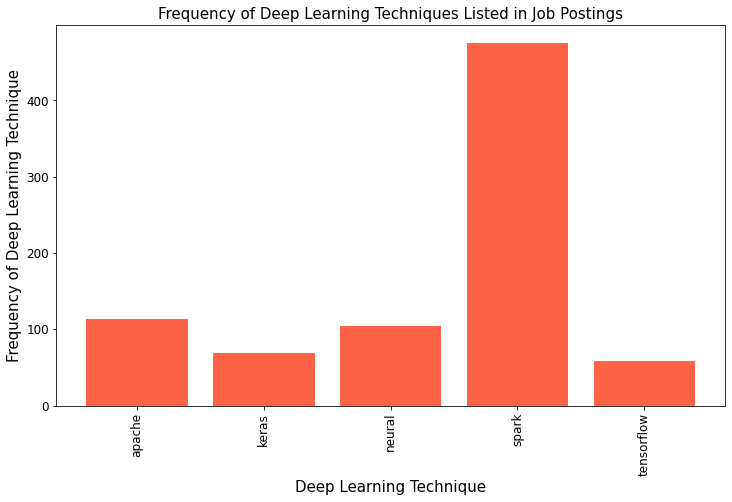

In [124]:
#create a sum of each deep learning technique
apache_sum = sum(cleaned_desc['apache'])
keras_sum = sum(cleaned_desc['keras'])
neural_sum = sum(cleaned_desc['neural'])
spark_sum = sum(cleaned_desc['spark'])
tensorflow_sum = sum(cleaned_desc['tensorflow'])

#make a dictionary of deep learning techniques so we can plot visualization
deep_learning_sums = {'apache': apache_sum,'keras':keras_sum,'neural': neural_sum,
'spark':spark_sum,'tensorflow': tensorflow_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(deep_learning_sums)), list(deep_learning_sums.values()), align='center', color='tomato')
plt.xticks(range(len(deep_learning_sums)), list(deep_learning_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Deep Learning Technique', fontsize=15)
plt.title('Frequency of Deep Learning Techniques Listed in Job Postings',fontsize=15)
plt.xlabel('Deep Learning Technique', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned deep learning technique is spark.

#### **Most Popular Web Application Platforms**

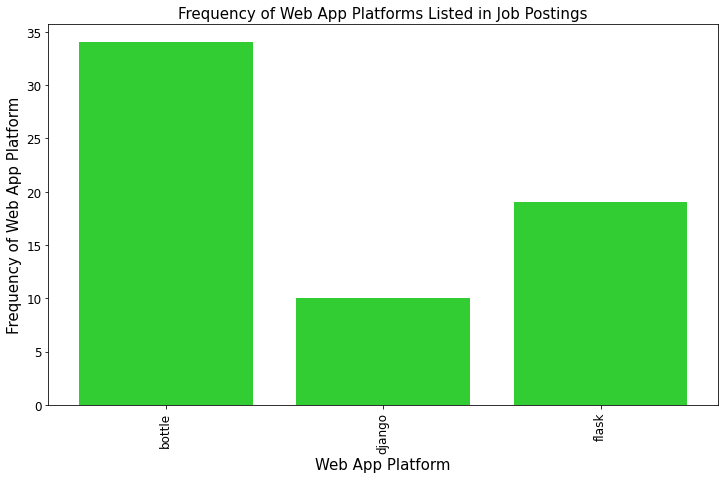

In [125]:
#create a sum of each web application platform
bottle_sum = sum(cleaned_desc['bottle'])
django_sum = sum(cleaned_desc['django'])
flask_sum = sum(cleaned_desc['flask'])

#make a dictionary of web apps so we can plot visualization
web_app_sums = {'bottle':bottle_sum,'django':django_sum,'flask':flask_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(web_app_sums)), list(web_app_sums.values()), align='center', color='limegreen')
plt.xticks(range(len(web_app_sums)), list(web_app_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Web App Platform', fontsize=15)
plt.title('Frequency of Web App Platforms Listed in Job Postings',fontsize=15)
plt.xlabel('Web App Platform', fontsize=15)
plt.show()

**Interpretation**

Web application platforms were rarely mentioned. 

### **Dataframe Building**

#### **DF for All Numeric Data**

In [126]:
#list of columns to add to jobs_df. Purposefully exclude coding platforms,
#libraries, and web application platforms since they weren't mentioned often
add_cols = ['years_exp', 'associates', 'bachelors',
       'masters', 'doctorate', 'senior', 'lead', 'principal', 'manager',
       'bash', 'cplusplus', 'html', 'java', 'javascript', 'julia', 'matlab',
       'oracle', 'python', ' r ', 'ruby', 'sas', 'scala', 'sql', 'dashboard',
       'data studio', 'looker', 'power bi', 'sisense', 'tableau', 'airflow',
       'big data', 'bigquery', 'cassandra', 'docker', 'etl', 'hadoop', 'hbase',
       'hdfs', 'hive', 'impala', 'kafka', 'kubeflow', 'kubernetes', 'aws',
       'azure', 'dynamodb', 'ec2', 'gcp', 'google cloud', 'lambda', 'mongodb',
       'redshift', 's3', 'saas', 'snowflake', 'google analytics',
       'google sheets', 'linux', 'microsoft', 'microsoft excel', 'powerpoint',
       'salesforce', ' ai ', 'ajax', 'api', 'forecasting',
       'hypothesis testing', 'json', 'kpi', ' ml ', 'nlp', 'pipeline',
       'predictive', 'regression', 'statistical', 'time series', 'matplotlib',
       'numpy', 'pandas', 'scikit', 'seaborn', 'apache', 'keras', 'neural',
       'spark', 'tensorflow']
#add numeric skill data to jobs_df
for col in add_cols:
  jobs_df[col] = cleaned_desc[col]

jobs_df

,company,industry,rank,job_title,link,description,search_city,search_job,city,state,min_sal,max_sal,estimate_type,avg_sal,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,dashboard,data studio,looker,...,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn,apache,keras,neural,spark,tensorflow
0,Aston Carter,Business Services,3.5,Data Analyst Sr.,https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,Austin,TX,52000,91000,Glassdoor,71500.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,Austin,TX,35000,64000,Glassdoor,49500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,Austin,TX,44000,81000,Glassdoor,62500.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,SamCart,Business Services,4.5,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,Austin,TX,32000,63000,Glassdoor,47500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Publicis Sapient,Business Services,3.7,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,Austin,TX,44000,80000,Glassdoor,62000.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,"Amazon Data Services, Inc.",Information Technology,3.8,Renewable Optimization Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,"Master’s degrees in Computer Science, Engineer...",sea,ds,Seattle,WA,93000,148000,Glassdoor,120500.0,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2854,EagleView,Information Technology,3.4,Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,We are looking for a talented Data Scientist t...,sea,ds,Bellevue,WA,82000,131000,Glassdoor,106500.0,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2855,Amazon.com Services LLC,Information Technology,3.8,"Data Scientist, WW Consumer Controllership Dat...",https://www.glassdoor.com/partner/jobListing.h...,Bachelor's Degree3+ years of experience with d...,sea,ds,Seattle,WA,84000,136000,Glassdoor,110000.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2856,Facebook,Information Technology,4.3,Data Scientist - Shops Seller Ecosystem,https://www.glassdoor.com/partner/jobListing.h...,The Facebook Shops Ecosystems team’s mission i...,sea,ds,Seattle,WA,114000,181000,Gl

In [127]:
#create a df of only numeric data to be evaluated
all_jobs_df = jobs_df[['industry', 'rank',
       'search_city', 'search_job', 'min_sal', 'max_sal',
       'avg_sal', 'years_exp', 'associates', 'bachelors',
       'masters', 'doctorate', 'senior', 'lead', 'principal', 'manager',
       'bash', 'cplusplus', 'html', 'java', 'javascript', 'julia', 'matlab',
       'oracle', 'python', ' r ', 'ruby', 'sas', 'scala', 'sql', 'dashboard',
       'data studio', 'looker', 'power bi', 'sisense', 'tableau', 'airflow',
       'big data', 'bigquery', 'cassandra', 'docker', 'etl', 'hadoop', 'hbase',
       'hdfs', 'hive', 'impala', 'kafka', 'kubeflow', 'kubernetes', 'aws',
       'azure', 'dynamodb', 'ec2', 'gcp', 'google cloud', 'lambda', 'mongodb',
       'redshift', 's3', 'saas', 'snowflake', 'google analytics',
       'google sheets', 'linux', 'microsoft', 'microsoft excel', 'powerpoint',
       'salesforce', ' ai ', 'ajax', 'api', 'forecasting',
       'hypothesis testing', 'json', 'kpi', ' ml ', 'nlp', 'pipeline',
       'predictive', 'regression', 'statistical', 'time series', 'apache', 
       'keras', 'neural','spark', 'tensorflow']]
all_jobs_df['industry'] = all_jobs_df['industry'].str.lower()
all_jobs_df

,industry,rank,search_city,search_job,min_sal,max_sal,avg_sal,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,apache,keras,neural,spark,tensorflow
0,business services,3.5,aus,da,52000,91000,71500.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,information technology,3.4,aus,da,35000,64000,49500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,aerospace & defense,3.8,aus,da,44000,81000,62500.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,business services,4.5,aus,da,32000,63000,47500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,business services,3.7,aus,da,44000,80000,62000.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,information technology,3.8,sea,ds,93000,148000,120500.0,4,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2854,information technology,3.4,sea,ds,82000,131000,106500.0,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,0
2855,information technology,3.8,sea,ds,84000,136000,110000.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
2856,information technology,4.3,sea,ds,114000,181000,147500.0,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### **Label Encode Industry, Search City, & Search Job into Numeric Data**

In [128]:
le=LabelEncoder()
all_jobs_df['industry']=le.fit_transform(all_jobs_df['industry'])
all_jobs_df['search_city']=le.fit_transform(all_jobs_df['search_city'])
all_jobs_df['search_job']=le.fit_transform(all_jobs_df['search_job'])

all_jobs_df.head()

,industry,rank,search_city,search_job,min_sal,max_sal,avg_sal,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,apache,keras,neural,spark,tensorflow
0,5,3.5,0,1,52000,91000,71500.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,12,3.4,0,1,35000,64000,49500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3.8,0,1,44000,81000,62500.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,5,4.5,0,1,32000,63000,47500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3.7,0,1,44000,80000,62000.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### **Correlations**

###### **Heatmap**

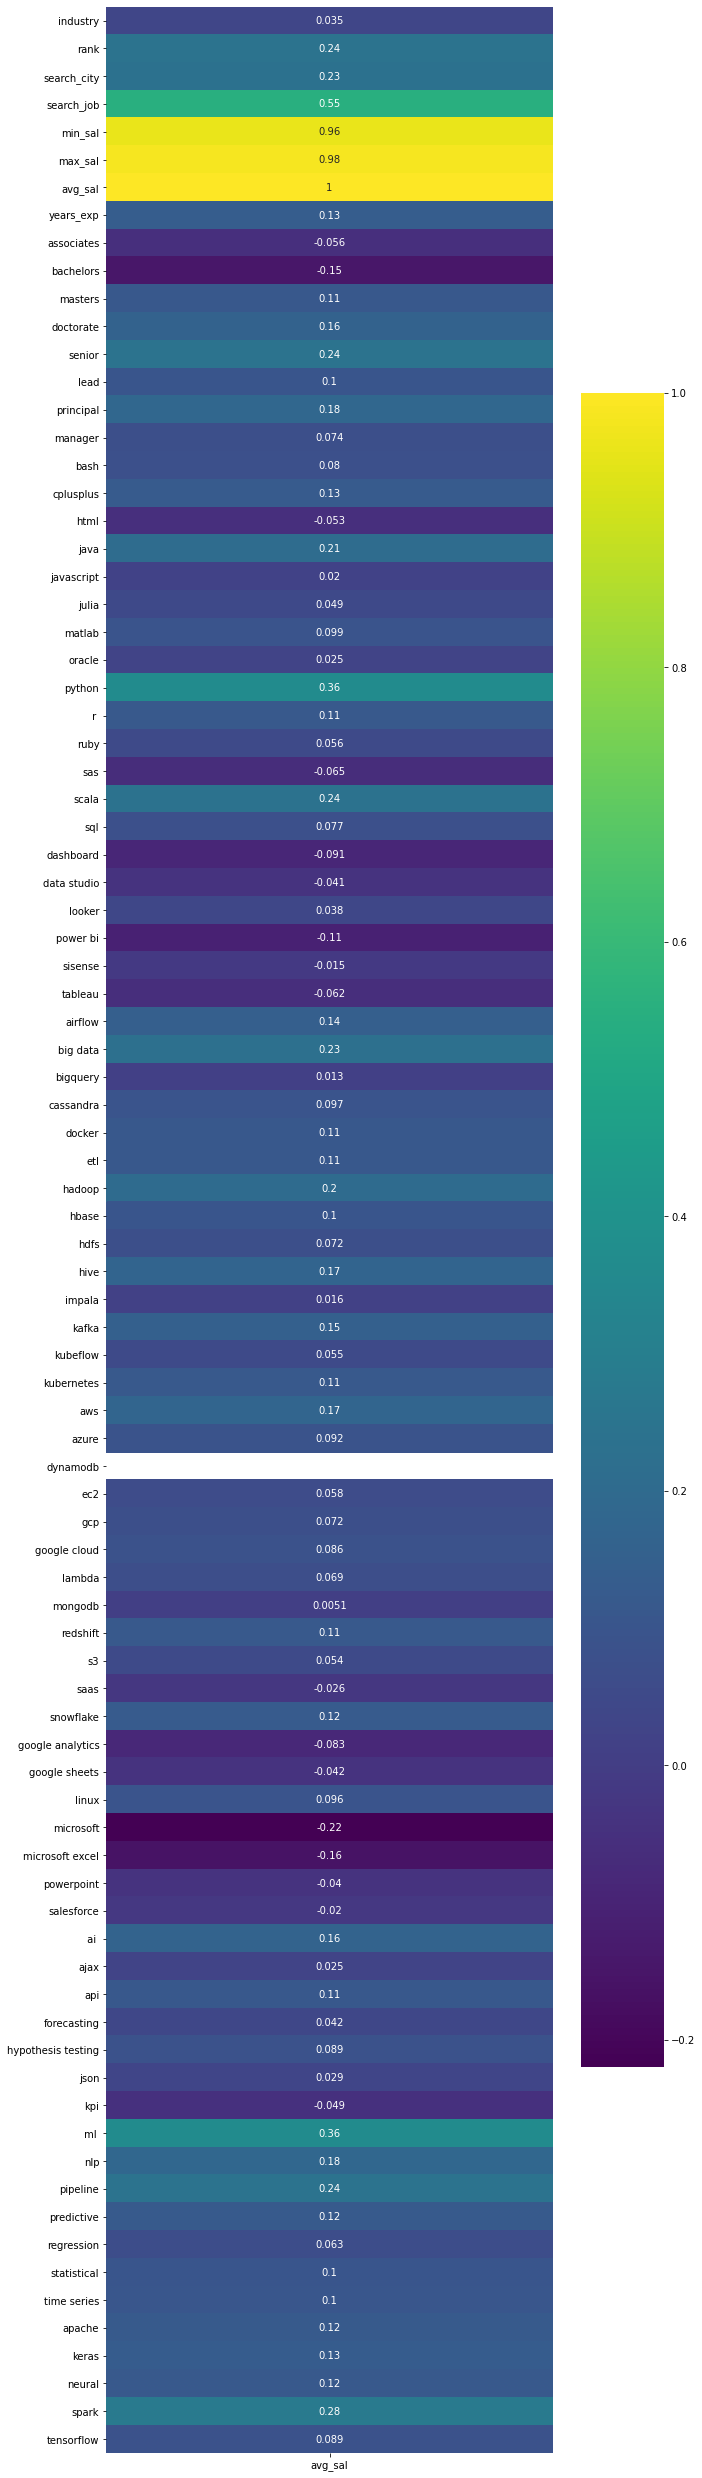

In [129]:
#investigate correlations between avg_sal and remaining varaiables
plt.figure(figsize=(10, 45))
sns.heatmap(pd.DataFrame(pd.DataFrame(all_jobs_df.corr()).avg_sal), annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.yticks()
plt.xticks()
plt.show()

###### **Top 20 Correlations**

In [130]:
corr= pd.DataFrame(all_jobs_df.corr())
corr['avg_sal'].sort_values(ascending=False)[:20]

avg_sal        1.000000
max_sal        0.982356
min_sal        0.961166
search_job     0.551764
python         0.362578
 ml            0.362356
spark          0.278930
pipeline       0.244862
senior         0.243929
rank           0.243628
scala          0.242334
search_city    0.233098
big data       0.225583
java           0.207113
hadoop         0.203530
nlp            0.182989
principal      0.180566
aws            0.172735
hive           0.170947
 ai            0.162740
Name: avg_sal, dtype: float64

In [131]:
corr['avg_sal'].sort_values(ascending=False)[-20:]

bigquery            0.012794
mongodb             0.005078
sisense            -0.015213
salesforce         -0.019739
saas               -0.026217
powerpoint         -0.039647
data studio        -0.041092
google sheets      -0.041804
kpi                -0.049280
html               -0.053153
associates         -0.055654
tableau            -0.061523
sas                -0.064918
google analytics   -0.082993
dashboard          -0.090682
power bi           -0.108735
bachelors          -0.147070
microsoft excel    -0.159507
microsoft          -0.219664
dynamodb                 NaN
Name: avg_sal, dtype: float64

###### **Interpretation**

Logically, it makes sense that min_sal & max_sal are highly correlated to avg_sal since they were the columns combined to make avg_sal. Since they are so highly correlated, it's best practice to exclude them from any models tested.

It's interesting that ds, data science search, is more positively correlated to avg_sal than the other job searches. Moreover it's intereting that data science & data engineering were positiviely correlated while data analyst and business analyst were negatively correlated. 

#### **DF's with Simplified Category Values**

With intentions of building an app for model deoployment, expecting a user to enter yes/no for all of the generated features is unrealistic. Let's create some df's that give one score for each of the categories we crated previously. 

In [132]:
#create a new df
categories_df = pd.DataFrame()

#import certain cols from all_jobs_df
cols_to_add = ['industry', 'rank', 'search_city', 'search_job',
               'avg_sal', 'years_exp']

#add colsdata to categories
for col in cols_to_add:
  categories_df[col] = all_jobs_df[col]

categories_df

,industry,rank,search_city,search_job,avg_sal,years_exp
0,5,3.5,0,1,71500.0,3
1,12,3.4,0,1,49500.0,1
2,1,3.8,0,1,62500.0,7
3,5,4.5,0,1,47500.0,3
4,5,3.7,0,1,62000.0,8
...,...,...,...,...,...,...
2853,12,3.8,6,3,120500.0,4
2854,12,3.4,6,3,106500.0,-1
2855,12,3.8,6,3,110000.0,3
2856,12,4.3,6,3,147500.0,4


In [133]:
#create a feature for degrees
categories_df['degrees_total'] = all_jobs_df.iloc[:,8:12].sum(axis=1)

#create a feature for senior job titles
categories_df['sen_job_titles_total'] = all_jobs_df.iloc[:, 12:16].sum(axis=1)

#create a feature for languages
categories_df['languages_total'] = all_jobs_df.iloc[:, 16:30].sum(axis=1)

#create a feature for visualization totals
categories_df['visualization_total'] = all_jobs_df.iloc[:, 30:36].sum(axis=1)

#create a feature for big data tools
categories_df['big_data_total'] = all_jobs_df.iloc[:, 36:50].sum(axis=1)

#create a feature for cloud tools
categories_df['cloud_total'] = all_jobs_df.iloc[:, 50:62].sum(axis=1)

#create a feature for platform tools
categories_df['platform_total'] = all_jobs_df.iloc[:, 62:69].sum(axis=1)

#create a feature for data science concepts
categories_df['ds_concepts_total'] = all_jobs_df.iloc[:, 69:83].sum(axis=1)

#create a feature for deep learning concepts
categories_df['deep_learning_totals'] = all_jobs_df.iloc[:, 83:88].sum(axis=1)

#create a feature for log of avg_sal, will be tested for performance in models
categories_df['log_avg_sal'] = np.log1p(categories_df['avg_sal'])

categories_df

,industry,rank,search_city,search_job,avg_sal,years_exp,degrees_total,sen_job_titles_total,languages_total,visualization_total,big_data_total,cloud_total,platform_total,ds_concepts_total,deep_learning_totals,log_avg_sal
0,5,3.5,0,1,71500.0,3,0,1,1,2,0,0,0,0,1,11.177467
1,12,3.4,0,1,49500.0,1,0,0,0,0,0,1,0,0,0,10.809748
2,1,3.8,0,1,62500.0,7,1,0,2,0,0,0,1,1,0,11.042938
3,5,4.5,0,1,47500.0,3,0,0,4,0,0,1,0,0,0,10.768506
4,5,3.7,0,1,62000.0,8,0,0,0,0,0,0,0,1,0,11.034906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,12,3.8,6,3,120500.0,4,1,0,5,0,1,1,0,3,0,11.699413
2854,12,3.4,6,3,106500.0,-1,1,0,4,0,1,1,1,6,1,11.575910
2855,12,3.8,6,3,110000.0,3,1,0,5,0,0,4,0,3,0,11.608245
2856,12,4.3,6,3,147500.0,4,2,0,3,0,0,0,0,0,0,11.901590


#### **DF for Jobs With Years of Experience**

In [134]:
yrs_exp = categories_df['years_exp'] != -1
yrs_exp_df = categories_df.iloc[yrs_exp.values]
yrs_exp_df

,industry,rank,search_city,search_job,avg_sal,years_exp,degrees_total,sen_job_titles_total,languages_total,visualization_total,big_data_total,cloud_total,platform_total,ds_concepts_total,deep_learning_totals,log_avg_sal
0,5,3.5,0,1,71500.0,3,0,1,1,2,0,0,0,0,1,11.177467
1,12,3.4,0,1,49500.0,1,0,0,0,0,0,1,0,0,0,10.809748
2,1,3.8,0,1,62500.0,7,1,0,2,0,0,0,1,1,0,11.042938
3,5,4.5,0,1,47500.0,3,0,0,4,0,0,1,0,0,0,10.768506
4,5,3.7,0,1,62000.0,8,0,0,0,0,0,0,0,1,0,11.034906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851,4,4.3,6,3,174500.0,4,3,2,3,0,0,0,0,1,0,12.069686
2853,12,3.8,6,3,120500.0,4,1,0,5,0,1,1,0,3,0,11.699413
2855,12,3.8,6,3,110000.0,3,1,0,5,0,0,4,0,3,0,11.608245
2856,12,4.3,6,3,147500.0,4,2,0,3,0,0,0,0,0,0,11.901590


#### **Correlations**

##### **Heatmaps**

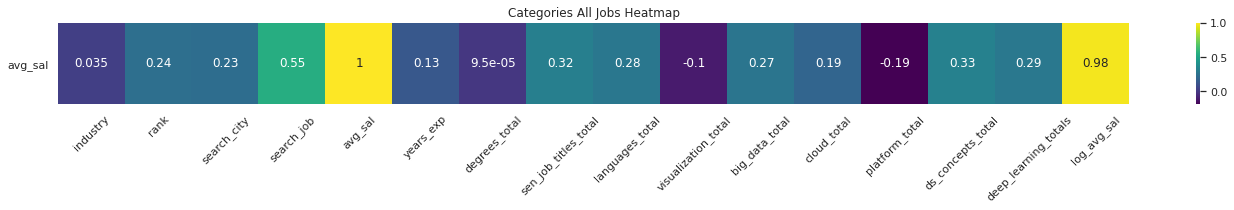

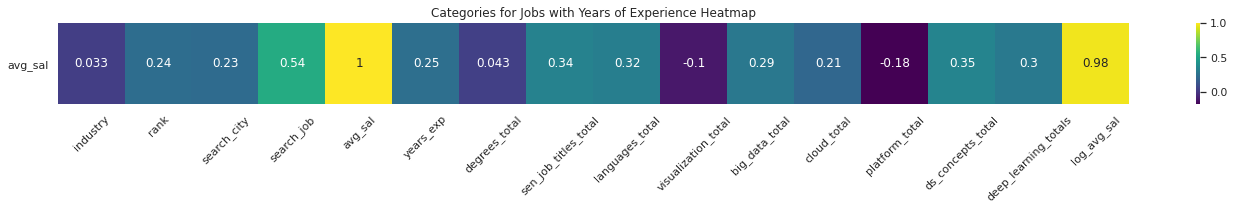

In [135]:
#investigate correlations between avg_sal and remaining varaiables

#categories_df correlations
plt.figure(figsize=(24,1.5))
sns.heatmap(pd.DataFrame(pd.DataFrame(categories_df.corr()).avg_sal).T, annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Categories All Jobs Heatmap')

#yrs_exp_df correlations
plt.figure(figsize=(24,1.5))
sns.heatmap(pd.DataFrame(pd.DataFrame(yrs_exp_df.corr()).avg_sal).T, annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Categories for Jobs with Years of Experience Heatmap')
plt.show()


##### **Ordered Correlations**

In [136]:
#categories_df correlations
cat_corr= pd.DataFrame(categories_df.corr())
cat_corr_sorted = cat_corr['avg_sal'].sort_values(ascending=False)
print('***Categories Ordered Correlations***')
print(cat_corr_sorted)
print()

#yrs_experience correlations
yrs_corr= pd.DataFrame(yrs_exp_df.corr())
yrs_corr_sorted = yrs_corr['avg_sal'].sort_values(ascending=False)
print('***Years Experience Ordered Correlations***')
print(yrs_corr_sorted)

***Categories Ordered Correlations***
avg_sal                 1.000000
log_avg_sal             0.977147
search_job              0.551764
ds_concepts_total       0.331784
sen_job_titles_total    0.319158
deep_learning_totals    0.289414
languages_total         0.283921
big_data_total          0.273579
rank                    0.243628
search_city             0.233098
cloud_total             0.194418
years_exp               0.134599
industry                0.034573
degrees_total           0.000095
visualization_total    -0.099925
platform_total         -0.186927
Name: avg_sal, dtype: float64

***Years Experience Ordered Correlations***
avg_sal                 1.000000
log_avg_sal             0.976494
search_job              0.542174
ds_concepts_total       0.350888
sen_job_titles_total    0.341669
languages_total         0.317424
deep_learning_totals    0.296114
big_data_total          0.292068
years_exp               0.246588
rank                    0.236964
search_city             0.228

##### **Interpretation**

**Categories Ordered Heatmap**

Now that our categories are combined into sums, it's interesting that the search_job is the highest positively correlated feature when before two of the jobs were positively correlated and two slightly negatively correlated. 

**Comparison of Categories vs Yrs Experience**

When only jobs that had years of experience were considered, the first two highly correlated features, search_jobs and sen_job_title, were the same in order but features were different from there. Features correlation coefficients were similar in each but order changed.

Years of Experience had nearly twice the positive correlation with avg_sal than it did in the categories only df. 


## **Hypothesis Testing**

### **Target Variable**

#### **Is average salary variable normally distributed?**

*  $H_o:$ Distribution is Normal
*   $H_a:$ Distribution is Not Normal

In [155]:
#Is the avg_salary distribution normal?
t,p=stats.shapiro(yrs_exp_df['avg_sal'])

#set up text wrapper for explanation of t-test because the explanation is long
wrapper = textwrap.TextWrapper(width=80)

#explanation of t-testing
if np.round(p, decimals=4) < 0.05:
  ttest_less = 'The p-value of {} is less than 0.05, so we reject the Null Hypothesis. There is sufficient evidence to support the avg_sal variable is not normally distributed.'.format(p, decimals=4)
  ttest_less_str = wrapper.fill(text=ttest_less)
  print(ttest_less_str)
elif np.round(p, decimals=4) > 0.05:
  ttest_more = 'The p-value of {} is greather than 0.05, so we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport the avg_sal varaible is not normally distributed.'.format(p, decimals=4)
  ttest_more_str = wrapper.fill(text=ttest_more)
  print(ttest_more_str)

The p-value of 2.928567224542484e-26 is less than 0.05, so we reject the Null
Hypothesis. There is sufficient evidence to support the avg_sal variable is not
normally distributed.


While non-normality was expected, it's important to also look at skewness and kurtosis. 

In [156]:
#investigate skewness of avg_sal variable
avg_sal_k = np.round(yrs_exp_df['avg_sal'].kurtosis(), decimals = 4)
#print explanation of skewness
if avg_sal_k < 0:
  print('The Kurtosis value of {} tells us the avg_sal varaible is skewed left.'.format(avg_sal_k))
elif avg_sal_k > 0:
  print('The Kurtosis value of {} tells us the avg_sal variable is skewed right.'.format(avg_sal_k))

The Kurtosis value of 0.8053 tells us the avg_sal variable is skewed right.


##### **Conclusion**

Since the Kurtosis value of the avg_sal variable is between the loose -3 to 3 range, it's safe to proceed with parametric testing. 

### **Is there a significant difference in avg_sal by search job?**

#### **Is average salary variable normally distributed per search_job?**

*  $H_o:$ Distribution is Normal
*   $H_a:$ Distribution is Not Normal

In [177]:
#segregate data by city & search
is_aus = yrs_exp_df[yrs_exp_df['search_city'] == 0]
is_bos = yrs_exp_df[yrs_exp_df['search_city'] == 1]
is_chi = yrs_exp_df[yrs_exp_df['search_city'] == 2]
is_co =  yrs_exp_df[yrs_exp_df['search_city'] == 3]
is_la =  yrs_exp_df[yrs_exp_df['search_city'] == 4]
is_ny =  yrs_exp_df[yrs_exp_df['search_city'] == 5]
is_sea = yrs_exp_df[yrs_exp_df['search_city'] == 6]
is_sf =  yrs_exp_df[yrs_exp_df['search_city'] == 7]

is_da = yrs_exp_df[yrs_exp_df['search_job'] == 0]
is_de = yrs_exp_df[yrs_exp_df['search_job'] == 1]
is_ba = yrs_exp_df[yrs_exp_df['search_job'] == 2]
is_ds = yrs_exp_df[yrs_exp_df['search_job'] == 3]

In [154]:
search_jobs = {'Data Analyst': is_da, 'Data Engineer':is_de, 
               'Business Analyst':is_ba, 'Data Scientist':is_ds}

for title, job in search_jobs.items():
  #Is the avg_salary distribution normal?
  t,p=stats.shapiro(job['avg_sal'])
  
  #explanation of t-testing
  if np.round(p, decimals=4) < 0.05:
    ttest_less = 'The p-value for {}, of {}, is less than 0.05, so we reject the Null Hypothesis. There is sufficient evidence to support the avg_sal variable is not normally distributed.'.format(title, p, decimals=4)
    ttest_less_str = wrapper.fill(text=ttest_less)
    print(ttest_less_str)
    print()
  elif np.round(p, decimals=4) > 0.05:
    ttest_more = 'The p-value for {}, of {}, is greather than 0.05, so we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport the avg_sal varaible is not normally distributed.'.format(title, p, decimals=4)
    ttest_more_str = wrapper.fill(text=ttest_more)
    print(ttest_more_str)
    print()

The p-value for Data Analyst, of 3.3674358624400226e-16, is less than 0.05, so
we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.

The p-value for Data Engineer, of 1.0664775676070756e-13, is less than 0.05, so
we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.

The p-value for Business Analyst, of 6.419451081818295e-11, is less than 0.05,
so we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.

The p-value for Data Scientist, of 7.167390867834911e-05, is less than 0.05, so
we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.



While non-normality was expected, it's important to also look at skewness and kurtosis. 

In [159]:
for title, job in search_jobs.items():
  #investigate skewness of avg_sal variable
  avg_sal_k = np.round(job['avg_sal'].kurtosis(), decimals = 4)
  #print explanation of skewness
  if avg_sal_k < 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal varaible is skewed left.'.format(title, avg_sal_k))
    print()
  elif avg_sal_k > 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal variable is skewed right.'.format(title, avg_sal_k))
    print()

The Kurtosis value for Data Analyst, of 2.1967, tells us the avg_sal variable is skewed right.

The Kurtosis value for Data Engineer, of 0.5575, tells us the avg_sal variable is skewed right.

The Kurtosis value for Business Analyst, of 1.4875, tells us the avg_sal variable is skewed right.

The Kurtosis value for Data Scientist, of 1.1893, tells us the avg_sal variable is skewed right.



##### **Conclusion**

Since the Kurtosis values of each search job avg_sal variable is between the loose -3 to 3 range, it's safe to proceed with parametric testing. 

#### **One-Way ANOVA**
Identifying if any one search job differs in avg_sal from the others

In [164]:
job_anova = stats.f_oneway(is_da['avg_sal'],is_de['avg_sal'],is_ba['avg_sal'],is_ds['avg_sal'])

#explanation of anova-testing
if np.round(job_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(job_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 3.768843366051233e-216, is less than 0.05. There is sufficient
evidence to support at least one search job has an average salary that is
significantly different than the others.


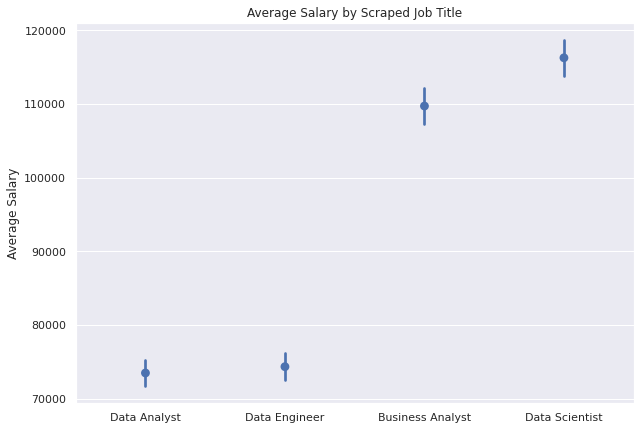

In [167]:
#visualize difference
plt.figure(figsize=(10,7))
avg_sal_diff = sns.pointplot(data= [is_da['avg_sal'],is_de['avg_sal'],is_ba['avg_sal'],is_ds['avg_sal']],
                    join= False)
avg_sal_diff.set(xticklabels = ['Data Analyst', 'Data Engineer', 'Business Analyst', 'Data Scientist'])
avg_sal_diff.set(ylabel='Average Salary')
plt.title('Average Salary by Scraped Job Title')
plt.show()

In [ ]:
job_anova = stats.f_oneway(is_da['avg_sal'],is_de['avg_sal'],is_ba['avg_sal'],is_ds['avg_sal'])

#explanation of anova-testing
if np.round(job_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(job_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

##### **Conclusion**

It appears that Data Analyst & Data Engineer positions have significantly lower average salaires than Business Analyst and Data Scientist Positions. Let's see if these two groups have same averages with t-testing. Then, we can compare Data Engineer and Business Analyst to confirm this thouhgt.

#### **T-Testing**

In [172]:
#data analyst & data engineer t-test
da_de_ttest = stats.ttest_ind(is_da['avg_sal'], is_de['avg_sal'])

#explanation of t-testing
if np.round(da_de_ttest[1], decimals=4) < 0.05:
  da_de_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support data analyst & data engineer positions have different average salaries.'.format(da_de_ttest[1], decimals=4)
  da_de_less_str = wrapper.fill(text=da_de_less)
  print(da_de_less_str)
  print()
elif np.round(da_de_ttest[1], decimals=4) > 0.05:
  da_de_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support data analyst & data engineer positions have different average salaries.'.format(da_de_ttest[1], decimals=4)
  da_de_more_str = wrapper.fill(text=da_de_more)
  print(da_de_more_str)
  print()

#businnes analyst & data scientist t-test
ba_ds_ttest = stats.ttest_ind(is_ba['avg_sal'], is_ds['avg_sal'])

#explanation of t-testing
if np.round(ba_ds_ttest[1], decimals=4) < 0.05:
  ba_ds_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support businnes analyst & data scientist positions have different average salaries.'.format(ba_ds_ttest[1], decimals=4)
  ba_ds_less_str = wrapper.fill(text=ba_ds_less)
  print(ba_ds_less_str)
  print()
elif np.round(ba_ds_ttest[1], decimals=4) > 0.05:
  ba_ds_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support businnes analyst & data scientist positions have different average salaries.'.format(ba_ds_ttest[1], decimals=4)
  ba_ds_more_str = wrapper.fill(text=ba_ds_more)
  print(da_de_more_str)
  print()

#data engineer & businnes analyst t-test
de_ba_ttest = stats.ttest_ind(is_de['avg_sal'], is_ba['avg_sal'])

#explanation of t-testing
if np.round(de_ba_ttest[1], decimals=4) < 0.05:
  de_ba_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support data engineer & businnes analyst positions have different average salaries.'.format(de_ba_ttest[1], decimals=4)
  de_ba_less_str = wrapper.fill(text=de_ba_less)
  print(ba_ds_less_str)
  print()
elif np.round(de_ba_ttest[1], decimals=4) > 0.05:
  de_ba_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support data engineer & businnes analyst positions have different average salaries.'.format(de_ba_ttest[1], decimals=4)
  de_ba_more_str = wrapper.fill(text=de_ba_more)
  print(de_ba_more_str)
  print()

The p-value of 0.5033764982482478, is more than 0.05. There is not sufficient
evidence to support data analyst & data engineer positions have different
average salaries.

The p-value of 0.0003215235756485016, is less than 0.05. There is sufficient
evidence to support businnes analyst & data scientist positions have different
average salaries.

The p-value of 0.0003215235756485016, is less than 0.05. There is sufficient
evidence to support businnes analyst & data scientist positions have different
average salaries.



##### **Conclusion**

It is confirmed that Data Analyst & Data Engineer positions have significantly lower average salaires than Business Analyst and Data Scientist Positions. However, the average salaries between the group of Data Analyst and Data Engineer compared to Business Analyst and Data Scientist positions are significantly different. 

### **Is there a significant difference in avg_sal by search city?**

#### **Is average salary variable normally distributed per search_city?**

*  $H_o:$ Distribution is Normal
*   $H_a:$ Distribution is Not Normal

In [178]:
search_cities = {'Austin': is_aus, 'Boston':is_bos, 'Chicago':is_chi,
                 'Colorado':is_co, 'Los Angeles':is_la, 'New York': is_ny, 
                 'Seattle':is_sea, 'San Francisco':is_sf}

for city, df in search_cities.items():
  #Is the avg_salary distribution normal?
  t,p=stats.shapiro(df['avg_sal'])
  
  #explanation of t-testing
  if np.round(p, decimals=4) < 0.05:
    ttest_less = 'The p-value for {}, of {}, is less than 0.05, so we reject the Null Hypothesis. There is sufficient evidence to support the avg_sal variable is not normally distributed.'.format(city, p, decimals=4)
    ttest_less_str = wrapper.fill(text=ttest_less)
    print(ttest_less_str)
    print()
  elif np.round(p, decimals=4) > 0.05:
    ttest_more = 'The p-value for {}, of {}, is greather than 0.05, so we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport the avg_sal varaible is not normally distributed.'.format(city, p, decimals=4)
    ttest_more_str = wrapper.fill(text=ttest_more)
    print(ttest_more_str)
    print()

The p-value for Austin, of 0.0001361111062578857, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Boston, of 1.2073002103249464e-12, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Chicago, of 9.013311910166522e-07, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Colorado, of 2.816298083629931e-09, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Los Angeles, of 6.520791018260752e-09, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for New Y

While non-normality was expected, it's important to also look at skewness and kurtosis. 

In [179]:
for city, df in search_cities.items():
  #investigate skewness of avg_sal variable
  avg_sal_k = np.round(df['avg_sal'].kurtosis(), decimals = 4)
  #print explanation of skewness
  if avg_sal_k < 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal varaible is skewed left.'.format(city, avg_sal_k))
    print()
  elif avg_sal_k > 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal variable is skewed right.'.format(city, avg_sal_k))
    print()

The Kurtosis value for Austin, of -0.7918, tells us the avg_sal varaible is skewed left.

The Kurtosis value for Boston, of 4.4177, tells us the avg_sal variable is skewed right.

The Kurtosis value for Chicago, of 0.1416, tells us the avg_sal variable is skewed right.

The Kurtosis value for Colorado, of 0.8732, tells us the avg_sal variable is skewed right.

The Kurtosis value for Los Angeles, of -0.5188, tells us the avg_sal varaible is skewed left.

The Kurtosis value for New York, of 0.8949, tells us the avg_sal variable is skewed right.

The Kurtosis value for Seattle, of -0.1869, tells us the avg_sal varaible is skewed left.

The Kurtosis value for San Francisco, of 0.3398, tells us the avg_sal variable is skewed right.



##### **Conclusion**

Since the Kurtosis values of each search city, excluding Boston which has some outliers affecting Kurtosis, avg_sal variable is between the loose -3 to 3 range, it's safe to proceed with parametric testing. 

#### **One-Way ANOVA**
Identifying if any one search job differs in avg_sal from the others

In [180]:
city_anova = stats.f_oneway(is_aus['avg_sal'],is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'],is_la['avg_sal'], is_ny['avg_sal'],
                            is_sea['avg_sal'],is_sf['avg_sal'])

#explanation of anova-testing
if np.round(city_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(city_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 6.8224448569992835e-40, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


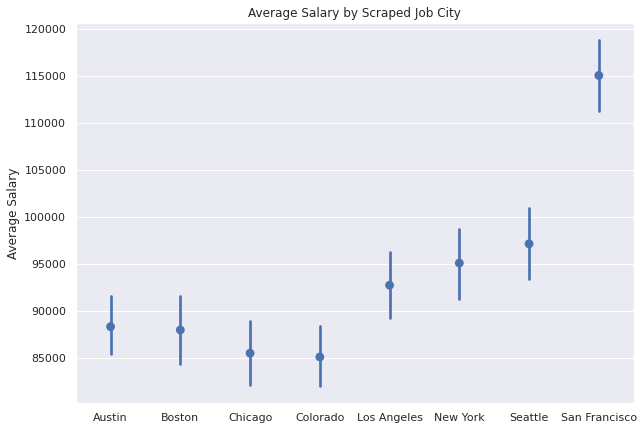

In [181]:
#visualize difference
plt.figure(figsize=(10,7))
avg_sal_diff = sns.pointplot(data= [is_aus['avg_sal'],is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'],is_la['avg_sal'], is_ny['avg_sal'],
                            is_sea['avg_sal'],is_sf['avg_sal']], join= False)

avg_sal_diff.set(xticklabels = ['Austin', 'Boston', 'Chicago', 'Colorado', 
                                'Los Angeles', 'New York', 'Seattle', 'San Francisco'])
avg_sal_diff.set(ylabel='Average Salary')
plt.title('Average Salary by Scraped Job City')
plt.show()

##### **Conclusion**

It appears that San Francisco has a significantly higher avg_salary than the other cities and there might be groups of others that are similar. FOr Example, Austing Boston, Chicago, Colorado seem smilar while LA, New York, and Seattle seem similar to each other. Let's do some more ANOVA testing to confirm.

#### **Grouped ANOVA Testing**

In [182]:
aus_bos_chi_co_anova = stats.f_oneway(is_aus['avg_sal'],is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'])

#explanation of anova-testing
if np.round(aus_bos_chi_co_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(aus_bos_chi_co_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 6.8224448569992835e-40, is more than 0.05. There is not
sufficient evidence to support at least one search city has an average salary
that is significantly different than the others.


In [183]:
la_ny_sea_anova = stats.f_oneway(is_la['avg_sal'],is_ny['avg_sal'],is_sea['avg_sal'])

#explanation of anova-testing
if np.round(la_ny_sea_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(la_ny_sea_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 6.8224448569992835e-40, is more than 0.05. There is not
sufficient evidence to support at least one search city has an average salary
that is significantly different than the others.


In [184]:
no_sf_anova = stats.f_oneway(is_aus['avg_sal'],is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'],is_la['avg_sal'], is_ny['avg_sal'],
                            is_sea['avg_sal'])

#explanation of anova-testing
if np.round(no_sf_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(no_sf_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 6.8224448569992835e-40, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


##### **Conclusion**

It is confirmed that Austin, Boston, Chicago, and Colorado positions have significantly lower average salaires than LA, New York, and Seattle Positions, and even more so than San Francisco positions. 

That is to say Austin, Boston, Chicago, and Colorado positions have similar avg_sal and LA, New York, and Seattle posotions have similar avg_sal. 

# **Model Building & Testing**

We now have 2 Dataframe's to test models on.
*   **categories_df:** numeric data of combined sums of the categorie we extrapolated from the job descriptions. 2012 rows × 15 columns
*   **yrs_exp_df**: categories excluding jobs that did not have years of experience listed. 1711 rows × 15 columns

For performance comparison, each will be tested with target variable as:
*    **Average Salary**
*    **Log of Average Salary**

### **Visualization of Target Variable**

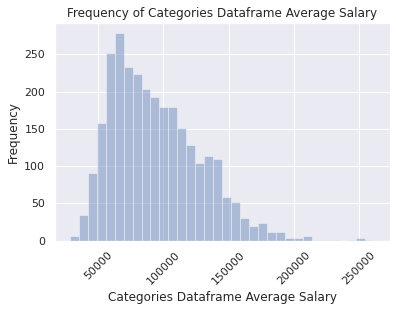

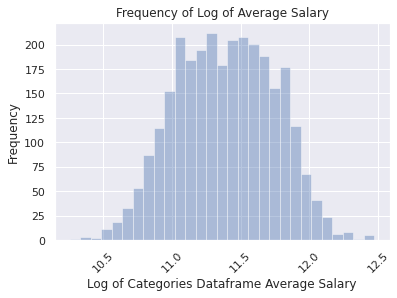

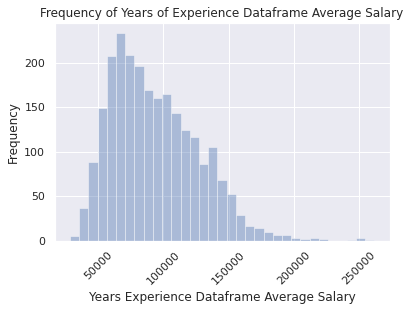

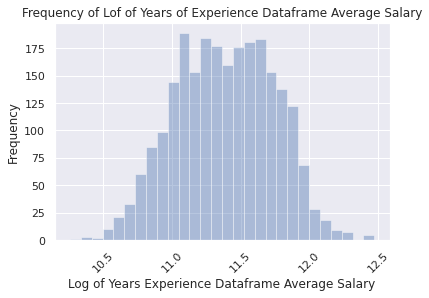

In [ ]:
#visualize Categories Dataframe Average Salary
sns.distplot(categories_df['avg_sal'], kde = False)
plt.xlabel('Categories Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Categories Dataframe Average Salary')
plt.xticks(rotation = 45)
plt.show()

#visualize Log of Categories Dataframe Average Salary
sns.distplot(categories_df['log_avg_sal'], kde = False)
plt.xlabel('Log of Categories Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Log of Average Salary')
plt.xticks(rotation = 45)
plt.show()

#visualize Years Experience Dataframe Average Salary
sns.distplot(yrs_exp_df['avg_sal'], kde = False)
plt.xlabel('Years Experience Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Years of Experience Dataframe Average Salary')
plt.xticks(rotation = 45)
plt.show()

#visualize Log of Years Experience Dataframe Average Salary
sns.distplot(yrs_exp_df['log_avg_sal'], kde = False)
plt.xlabel('Log of Years Experience Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Lof of Years of Experience Dataframe Average Salary')
plt.xticks(rotation = 45)
plt.show()

## **Linear Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
categories_lr = LinearRegression()

#fit model
categories_lr.fit(X_train, y_train)

#cross validate
categories_lr_cv_scores = cross_val_score(categories_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', categories_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.53669933 0.49812473 0.49810013 0.48876032 0.53285166]
Mean Cross Validation Score: 0.510907234932360454493505130812991


In [ ]:
#generate predictions
categories_lr_preds = categories_lr.predict(X_test)

#get performance metrics
categories_lr_rsquared_train = categories_lr.score(X_train, y_train)
categories_lr_rsquared_test = categories_lr.score(X_test, y_test)
categories_lr_mae = mean_absolute_error(y_test, categories_lr_preds)
categories_lr_mse = mse(y_test, categories_lr_preds)
categories_lr_rmse = rmse(y_test, categories_lr_preds)
categories_lr_mape = np.mean(np.abs((y_test - categories_lr_preds)/y_test)*100)
categories_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_lr_preds) / y_test)))) * 100
categories_lr_model_name = 'Categories Linear Regression'

#create easily readable display of performance metrics
categories_lr_dictionary = {'Model': categories_lr_model_name,
  'Training Set R Squared': categories_lr_rsquared_train, 
  'Test Set R Squared': categories_lr_rsquared_test, 'Mean Absolute Error': categories_lr_mae, 
  'Mean Sqaured Error': categories_lr_mse, 'Root Mean Squared Error': categories_lr_rmse,
  'Root Mean Squared Percentage Error': categories_lr_rmspe,
  'Mean Absolute Percentage Error': categories_lr_mape}

categories_lr_df = pd.DataFrame(categories_lr_dictionary, index=[0])

categories_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Linear Regression,0.520086,0.48375,18354.503066,5.612561e+08,23690.843196,29.497062,21.530916


### **yrs_exp_df**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
yrs_exp_lr = LinearRegression()

#fit model
yrs_exp_lr.fit(X_train, y_train)

#cross validate
yrs_exp_lr_cv_scores = cross_val_score(yrs_exp_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', yrs_exp_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.55166481 0.53021577 0.53920733 0.49330761 0.50763908]
Mean Cross Validation Score: 0.524406919433912599437519475031877


In [ ]:
#generate predictions
yrs_exp_lr_preds = yrs_exp_lr.predict(X_test)

#get performance metrics
yrs_exp_lr_rsquared_train = yrs_exp_lr.score(X_train, y_train)
yrs_exp_lr_rsquared_test = yrs_exp_lr.score(X_test, y_test)
yrs_exp_lr_mae = mean_absolute_error(y_test, yrs_exp_lr_preds)
yrs_exp_lr_mse = mse(y_test, yrs_exp_lr_preds)
yrs_exp_lr_rmse = rmse(y_test, yrs_exp_lr_preds)
yrs_exp_lr_mape = np.mean(np.abs((y_test - yrs_exp_lr_preds)/y_test)*100)
yrs_exp_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_lr_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Linear Regression'

#create easily readable display of performance metrics
yrs_exp_lr_dictionary = {'Model': yrs_exp_model_name,
  'Training Set R Squared': yrs_exp_lr_rsquared_train, 
  'Test Set R Squared': yrs_exp_lr_rsquared_test, 'Mean Absolute Error': yrs_exp_lr_mae, 
  'Mean Sqaured Error': yrs_exp_lr_mse, 'Root Mean Squared Error': yrs_exp_lr_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_lr_rmspe,  
  'Mean Absolute Percentage Error': yrs_exp_lr_mape}

yrs_exp_lr_df = pd.DataFrame(yrs_exp_lr_dictionary, index=[0])

yrs_exp_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Linear Regression,0.534729,0.56712,16499.34276,5.031339e+08,22430.645483,26.685662,18.864736


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_categories_lr = LinearRegression()

#fit model
log_categories_lr.fit(X_train, y_train)

#cross validate
log_categories_lr_cv_scores = cross_val_score(log_categories_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_categories_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.56433325 0.51587355 0.50978547 0.48460247 0.54530175]
Mean Cross Validation Score: 0.523979298384763425566745809192071


In [ ]:
#generate predictions
log_categories_lr_preds = log_categories_lr.predict(X_test)

#get performance metrics
log_categories_lr_rsquared_train = log_categories_lr.score(X_train, y_train)
log_categories_lr_rsquared_test = log_categories_lr.score(X_test, y_test)
log_categories_lr_mae = mean_absolute_error(y_test, log_categories_lr_preds)
log_categories_lr_mse = mse(y_test, log_categories_lr_preds)
log_categories_lr_rmse = rmse(y_test, log_categories_lr_preds)
log_categories_lr_mape = np.mean(np.abs((y_test - log_categories_lr_preds)/y_test)*100)
log_categories_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_lr_preds) / y_test)))) * 100
log_categories_lr_model_name = 'Categories Linear Regression Log(y)'

#create easily readable display of performance metrics
log_categories_lr_dictionary = {'Model': log_categories_lr_model_name,
  'Training Set R Squared': log_categories_lr_rsquared_train, 
  'Test Set R Squared': log_categories_lr_rsquared_test, 'Mean Absolute Error': log_categories_lr_mae, 
  'Mean Sqaured Error': log_categories_lr_mse, 'Root Mean Squared Error': log_categories_lr_rmse,
  'Root Mean Squared Percentage Error': log_categories_lr_rmspe,
  'Mean Absolute Percentage Error': log_categories_lr_mape}

log_categories_lr_df = pd.DataFrame(log_categories_lr_dictionary, index=[0])

log_categories_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Linear Regression Log(y),0.532586,0.510372,0.192512,0.059927,0.244799,2.166507,1.695364


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_yrs_exp_lr = LinearRegression()

#fit model
log_yrs_exp_lr.fit(X_train, y_train)

#cross validate
log_yrs_exp_lr_cv_scores = cross_val_score(log_yrs_exp_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_yrs_exp_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.54027616 0.55191811 0.54650125 0.51161011 0.53409189]
Mean Cross Validation Score: 0.536879506014410479153298183518928


In [ ]:
#generate predictions
log_yrs_exp_lr_preds = log_yrs_exp_lr.predict(X_test)

#get performance metrics
log_yrs_exp_lr_rsquared_train = log_yrs_exp_lr.score(X_train, y_train)
log_yrs_exp_lr_rsquared_test = log_yrs_exp_lr.score(X_test, y_test)
log_yrs_exp_lr_mae = mean_absolute_error(y_test, log_yrs_exp_lr_preds)
log_yrs_exp_lr_mse = mse(y_test, log_yrs_exp_lr_preds)
log_yrs_exp_lr_rmse = rmse(y_test, log_yrs_exp_lr_preds)
log_yrs_exp_lr_mape = np.mean(np.abs((y_test - log_yrs_exp_lr_preds)/y_test)*100)
log_yrs_exp_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_lr_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Linear Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_lr_dictionary = {'Model': yrs_exp_model_name,
  'Training Set R Squared': log_yrs_exp_lr_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_lr_rsquared_test, 'Mean Absolute Error': log_yrs_exp_lr_mae, 
  'Mean Sqaured Error': log_yrs_exp_lr_mse, 'Root Mean Squared Error': log_yrs_exp_lr_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_lr_rmspe,  
  'Mean Absolute Percentage Error': log_yrs_exp_lr_mape}

log_yrs_exp_lr_df = pd.DataFrame(log_yrs_exp_lr_dictionary, index=[0])

log_yrs_exp_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Linear Regression Log(y),0.547137,0.590158,0.177761,0.054545,0.23355,2.062394,1.563913


## **Ridge Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

categories_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
categories_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(categories_ridge_grid.best_estimator_)

{'alpha': 1}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
categories_ridge = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

categories_ridge.fit(X_train, y_train)

#cross validate
categories_ridge_scores = cross_val_score(categories_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.53676787 0.49808848 0.49811679 0.4888347  0.53276781]
Mean Cross Validation Score: 0.510915129429534764504694521747297


In [ ]:
#generate predictions
categories_ridge_preds = categories_ridge.predict(X_test)

#more performance metrics
categories_ridge_rsquared_train = categories_ridge.score(X_train, y_train)
categories_ridge_rsquared_test = categories_ridge.score(X_test, y_test)
categories_ridge_mae = mean_absolute_error(y_test, categories_ridge_preds)
categories_ridge_mse = mse(y_test, categories_ridge_preds)
categories_ridge_rmse = rmse(y_test, categories_ridge_preds)
categories_ridge_mape = np.mean(np.abs((y_test - categories_ridge_preds)/y_test)*100)
categories_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_ridge_preds) / y_test)))) * 100
categories_ridge_model_name = 'Categories Ridge Regression'

#create easily readable display of performance metrics
categories_ridge_dictionary = {'Model': categories_ridge_model_name,
  'Training Set R Squared': categories_ridge_rsquared_train, 
  'Test Set R Squared': categories_ridge_rsquared_test, 'Mean Absolute Error': categories_ridge_mae, 
  'Mean Sqaured Error': categories_ridge_mse, 'Root Mean Squared Error': categories_ridge_rmse,
  'Root Mean Squared Percentage Error': categories_ridge_rmspe,
  'Mean Absolute Percentage Error': categories_ridge_mape}

categories_ridge_df = pd.DataFrame(categories_ridge_dictionary, index=[0])

categories_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Ridge Regression,0.520085,0.483891,18352.18713,5.611029e+08,23687.610188,29.494439,21.528939


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

yrs_exp_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
yrs_exp_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_ridge_grid.best_estimator_)

{'alpha': 1}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_ridge = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

yrs_exp_ridge.fit(X_train, y_train)

#cross validate
yrs_exp_ridge_scores = cross_val_score(yrs_exp_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.55153746 0.53021524 0.53918941 0.49338601 0.50772836]
Mean Cross Validation Score: 0.524411297625288042034696900373092


In [ ]:
#generate predictions
yrs_exp_ridge_preds = yrs_exp_ridge.predict(X_test)

#more performance metrics
yrs_exp_ridge_rsquared_train = yrs_exp_ridge.score(X_train, y_train)
yrs_exp_ridge_rsquared_test = yrs_exp_ridge.score(X_test, y_test)
yrs_exp_ridge_mae = mean_absolute_error(y_test, yrs_exp_ridge_preds)
yrs_exp_ridge_mse = mse(y_test, yrs_exp_ridge_preds)
yrs_exp_ridge_rmse = rmse(y_test, yrs_exp_ridge_preds)
yrs_exp_ridge_mape = np.mean(np.abs((y_test - yrs_exp_ridge_preds)/y_test)*100)
yrs_exp_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_ridge_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Ridge Regression'

#create easily readable display of performance metrics
yrs_exp_ridge_dictionary = {'Model': yrs_exp_model_name, 
  'Training Set R Squared': yrs_exp_ridge_rsquared_train, 
  'Test Set R Squared': yrs_exp_ridge_rsquared_test, 'Mean Absolute Error': yrs_exp_ridge_mae, 
  'Mean Sqaured Error': yrs_exp_ridge_mse, 'Root Mean Squared Error': yrs_exp_ridge_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_ridge_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_ridge_mape}

yrs_exp_ridge_df = pd.DataFrame(yrs_exp_ridge_dictionary, index=[0])

yrs_exp_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Ridge Regression,0.534728,0.567039,16502.067484,5.032276e+08,22432.735924,26.686209,18.868384


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_categories_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_categories_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_categories_ridge_grid.best_estimator_)

{'alpha': 1}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_ridge = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

log_categories_ridge.fit(X_train, y_train)

#cross validate
log_categories_ridge_scores = cross_val_score(log_categories_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.56439813 0.51584115 0.50978386 0.48465441 0.54525266]
Mean Cross Validation Score: 0.523986043389863431762876189168310


In [ ]:
#generate predictions
log_categories_ridge_preds = log_categories_ridge.predict(X_test)

#more performance metrics
log_categories_ridge_rsquared_train = log_categories_ridge.score(X_train, y_train)
log_categories_ridge_rsquared_test = log_categories_ridge.score(X_test, y_test)
log_categories_ridge_mae = mean_absolute_error(y_test, log_categories_ridge_preds)
log_categories_ridge_mse = mse(y_test, log_categories_ridge_preds)
log_categories_ridge_rmse = rmse(y_test, log_categories_ridge_preds)
log_categories_ridge_mape = np.mean(np.abs((y_test - log_categories_ridge_preds)/y_test)*100)
log_categories_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_ridge_preds) / y_test)))) * 100
log_categories_ridge_model_name = 'Categories Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_categories_ridge_dictionary = {'Model': log_categories_ridge_model_name,
  'Training Set R Squared': log_categories_ridge_rsquared_train, 
  'Test Set R Squared': log_categories_ridge_rsquared_test, 'Mean Absolute Error': log_categories_ridge_mae, 
  'Mean Sqaured Error': log_categories_ridge_mse, 'Root Mean Squared Error': log_categories_ridge_rmse,
  'Root Mean Squared Percentage Error': log_categories_ridge_rmspe,
  'Mean Absolute Percentage Error': log_categories_ridge_mape}

log_categories_ridge_df = pd.DataFrame(log_categories_ridge_dictionary, index=[0])

log_categories_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Ridge Regression Log(y),0.532586,0.510464,0.1925,0.059915,0.244776,2.166316,1.695256


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_yrs_exp_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_yrs_exp_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_ridge_grid.best_estimator_)

{'alpha': 1}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_ridge = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

log_yrs_exp_ridge.fit(X_train, y_train)

#cross validate
log_yrs_exp_ridge_scores = cross_val_score(log_yrs_exp_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.54018321 0.55188701 0.54649236 0.51168236 0.53417779]
Mean Cross Validation Score: 0.536884545592055117957386300986400


In [ ]:
#generate predictions
log_yrs_exp_ridge_preds = log_yrs_exp_ridge.predict(X_test)

#more performance metrics
log_yrs_exp_ridge_rsquared_train = log_yrs_exp_ridge.score(X_train, y_train)
log_yrs_exp_ridge_rsquared_test = log_yrs_exp_ridge.score(X_test, y_test)
log_yrs_exp_ridge_mae = mean_absolute_error(y_test, log_yrs_exp_ridge_preds)
log_yrs_exp_ridge_mse = mse(y_test, log_yrs_exp_ridge_preds)
log_yrs_exp_ridge_rmse = rmse(y_test, log_yrs_exp_ridge_preds)
log_yrs_exp_ridge_mape = np.mean(np.abs((y_test - log_yrs_exp_ridge_preds)/y_test)*100)
log_yrs_exp_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_ridge_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_ridge_dictionary = {'Model': yrs_exp_model_name, 
  'Training Set R Squared': log_yrs_exp_ridge_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_ridge_rsquared_test, 'Mean Absolute Error': log_yrs_exp_ridge_mae, 
  'Mean Sqaured Error': log_yrs_exp_ridge_mse, 'Root Mean Squared Error': log_yrs_exp_ridge_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_ridge_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_ridge_mape}

log_yrs_exp_ridge_df = pd.DataFrame(log_yrs_exp_ridge_dictionary, index=[0])

log_yrs_exp_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Ridge Regression Log(y),0.547137,0.590081,0.177811,0.054556,0.233572,2.062584,1.564356


## **Lasso Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

categories_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
categories_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(categories_lasso_grid.best_estimator_)

{'alpha': 100}
Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
categories_lasso = Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

categories_lasso.fit(X_train, y_train)

#cross validate
categories_lasso_scores = cross_val_score(categories_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.53630272 0.49852033 0.49883219 0.48980776 0.53215698]
Mean Cross Validation Score: 0.511123995297899536005559184559388


In [ ]:
#generate predictions
categories_lasso_preds = categories_lasso.predict(X_test)

#more performance metrics
categories_lasso_rsquared_train = categories_lasso.score(X_train, y_train)
categories_lasso_rsquared_test = categories_lasso.score(X_test, y_test)
categories_lasso_mae = mean_absolute_error(y_test, categories_lasso_preds)
categories_lasso_mse = mse(y_test, categories_lasso_preds)
categories_lasso_rmse = rmse(y_test, categories_lasso_preds)
categories_lasso_mape = np.mean(np.abs((y_test - categories_lasso_preds)/y_test)*100)
categories_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_lasso_preds) / y_test)))) * 100
categories_lasso_model_name = 'Categories Lasso Regression'

#create easily readable display of performance metrics
categories_lasso_dictionary = {'Model': categories_lasso_model_name,
  'Training Set R Squared': categories_lasso_rsquared_train, 
  'Test Set R Squared': categories_lasso_rsquared_test, 'Mean Absolute Error': categories_lasso_mae, 
  'Mean Sqaured Error': categories_lasso_mse, 'Root Mean Squared Error': categories_lasso_rmse,
  'Root Mean Squared Percentage Error': categories_lasso_rmspe,
  'Mean Absolute Percentage Error': categories_lasso_mape}

categories_lasso_df = pd.DataFrame(categories_lasso_dictionary, index=[0])

categories_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Lasso Regression,0.519936,0.485577,18326.992512,5.592693e+08,23648.874884,29.462594,21.507434


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

yrs_exp_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
yrs_exp_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_lasso_grid.best_estimator_)

{'alpha': 100}
Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_lasso = Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

yrs_exp_lasso.fit(X_train, y_train)

#cross validate
yrs_exp_lasso_scores = cross_val_score(yrs_exp_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.55084407 0.5299443  0.53985516 0.49326459 0.50833982]
Mean Cross Validation Score: 0.524449588153485746211401874461444


In [ ]:
#generate predictions
yrs_exp_lasso_preds = yrs_exp_lasso.predict(X_test)

#more performance metrics
yrs_exp_lasso_rsquared_train = yrs_exp_lasso.score(X_train, y_train)
yrs_exp_lasso_rsquared_test = yrs_exp_lasso.score(X_test, y_test)
yrs_exp_lasso_mae = mean_absolute_error(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_mse = mse(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_rmse = rmse(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_mape = np.mean(np.abs((y_test - yrs_exp_lasso_preds)/y_test)*100)
yrs_exp_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_lasso_preds) / y_test)))) * 100
yrs_exp_lasso_model_name = 'Years of Experience Lasso Regression'

#create easily readable display of performance metrics
yrs_exp_lasso_dictionary = {'Model': yrs_exp_lasso_model_name,
  'Training Set R Squared': yrs_exp_lasso_rsquared_train, 
  'Test Set R Squared': yrs_exp_lasso_rsquared_test, 'Mean Absolute Error': yrs_exp_lasso_mae, 
  'Mean Sqaured Error': yrs_exp_lasso_mse, 'Root Mean Squared Error': yrs_exp_lasso_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_lasso_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_lasso_mape}

yrs_exp_lasso_df = pd.DataFrame(yrs_exp_lasso_dictionary, index=[0])

yrs_exp_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Lasso Regression,0.534584,0.565685,16548.385257,5.048018e+08,22467.794557,26.718871,18.935747


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_categories_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_categories_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_categories_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_lasso = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

log_categories_lasso.fit(X_train, y_train)

#cross validate
log_categories_lasso_scores = cross_val_score(log_categories_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.56382925 0.51577522 0.51010974 0.48525442 0.54481216]
Mean Cross Validation Score: 0.523956157096849173271380095684435


In [ ]:
#generate predictions
log_categories_lasso_preds = log_categories_lasso.predict(X_test)

#more performance metrics
log_categories_lasso_rsquared_train = log_categories_lasso.score(X_train, y_train)
log_categories_lasso_rsquared_test = log_categories_lasso.score(X_test, y_test)
log_categories_lasso_mae = mean_absolute_error(y_test, log_categories_lasso_preds)
log_categories_lasso_mse = mse(y_test, log_categories_lasso_preds)
log_categories_lasso_rmse = rmse(y_test, log_categories_lasso_preds)
log_categories_lasso_mape = np.mean(np.abs((y_test - log_categories_lasso_preds)/y_test)*100)
log_categories_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_lasso_preds) / y_test)))) * 100
log_categories_lasso_model_name = 'Categories Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_categories_lasso_dictionary = {'Model': log_categories_lasso_model_name,
  'Training Set R Squared': log_categories_lasso_rsquared_train, 
  'Test Set R Squared': log_categories_lasso_rsquared_test, 'Mean Absolute Error': log_categories_lasso_mae, 
  'Mean Sqaured Error': log_categories_lasso_mse, 'Root Mean Squared Error': log_categories_lasso_rmse,
  'Root Mean Squared Percentage Error': log_categories_lasso_rmspe,
  'Mean Absolute Percentage Error': log_categories_lasso_mape}

log_categories_lasso_df = pd.DataFrame(log_categories_lasso_dictionary, index=[0])

log_categories_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Lasso Regression Log(y),0.532463,0.511399,0.192443,0.059801,0.244542,2.164368,1.694768


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_yrs_exp_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_yrs_exp_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_lasso = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

log_yrs_exp_lasso.fit(X_train, y_train)

#cross validate
log_yrs_exp_lasso_scores = cross_val_score(log_yrs_exp_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.54008144 0.55142994 0.54644467 0.51168721 0.53446275]
Mean Cross Validation Score: 0.536821202454624168964869568299036


In [ ]:
#generate predictions
log_yrs_exp_lasso_preds = log_yrs_exp_lasso.predict(X_test)

#more performance metrics
log_yrs_exp_lasso_rsquared_train = log_yrs_exp_lasso.score(X_train, y_train)
log_yrs_exp_lasso_rsquared_test = log_yrs_exp_lasso.score(X_test, y_test)
log_yrs_exp_lasso_mae = mean_absolute_error(y_test, log_yrs_exp_lasso_preds)
log_yrs_exp_lasso_mse = mse(y_test, log_yrs_exp_lasso_preds)
log_yrs_exp_lasso_rmse = rmse(y_test, log_yrs_exp_lasso_preds)
log_yrs_exp_lasso_mape = np.mean(np.abs((y_test - log_yrs_exp_lasso_preds)/y_test)*100)
log_yrs_exp_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_lasso_preds) / y_test)))) * 100
log_yrs_exp_lasso_model_name = 'Years of Experience Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_lasso_dictionary = {'Model': log_yrs_exp_lasso_model_name,
  'Training Set R Squared': log_yrs_exp_lasso_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_lasso_rsquared_test, 'Mean Absolute Error': log_yrs_exp_lasso_mae, 
  'Mean Sqaured Error': log_yrs_exp_lasso_mse, 'Root Mean Squared Error': log_yrs_exp_lasso_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_lasso_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_lasso_mape}

log_yrs_exp_lasso_df = pd.DataFrame(log_yrs_exp_lasso_dictionary, index=[0])

log_yrs_exp_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Lasso Regression Log(y),0.547009,0.588684,0.178465,0.054742,0.233969,2.066122,1.57018


## **ElasticNet Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

categories_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
categories_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(categories_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.4s


{'alpha': 100, 'l1_ratio': 1}
ElasticNet(alpha=100, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    3.8s finished


In [ ]:
#set model with ideal hyperparameters from above
categories_enet = ElasticNet(alpha=100, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

categories_enet.fit(X_train, y_train)

#cross validate
categories_enet_scores = cross_val_score(categories_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_enet_scores)))

Accuracy Scores for the 5 folds:  [0.53630272 0.49852033 0.49883219 0.48980776 0.53215698]
Mean Cross Validation Score: 0.511123995297899536005559184559388


In [ ]:
#generate predictions
categories_enet_preds = categories_enet.predict(X_test)

#more performance metrics
categories_enet_rsquared_train = categories_enet.score(X_train, y_train)
categories_enet_rsquared_test = categories_enet.score(X_test, y_test)
categories_enet_mae = mean_absolute_error(y_test, categories_enet_preds)
categories_enet_mse = mse(y_test, categories_enet_preds)
categories_enet_rmse = rmse(y_test, categories_enet_preds)
categories_enet_mape = np.mean(np.abs((y_test - categories_enet_preds)/y_test)*100)
categories_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_enet_preds) / y_test)))) * 100
categories_enet_model_name = 'Categories Elastic Net Regression'

#create easily readable display of performance metrics
categories_enet_dictionary = {'Model': categories_enet_model_name,
  'Training Set R Squared': categories_enet_rsquared_train, 
  'Test Set R Squared': categories_enet_rsquared_test, 'Mean Absolute Error': categories_enet_mae, 
  'Mean Sqaured Error': categories_enet_mse, 'Root Mean Squared Error': categories_enet_rmse,
  'Root Mean Squared Percentage Error': categories_enet_rmspe,
  'Mean Absolute Percentage Error': categories_enet_mape}

categories_enet_df = pd.DataFrame(categories_enet_dictionary, index=[0])

categories_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Elastic Net Regression,0.519936,0.485577,18326.992512,5.592693e+08,23648.874884,29.462594,21.507434


### **yrs_exp_df**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

yrs_exp_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
yrs_exp_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 100, 'l1_ratio': 1}
ElasticNet(alpha=100, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.2s finished


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_enet = ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

yrs_exp_enet.fit(X_train, y_train)

#cross validate
yrs_exp_enet_scores = cross_val_score(yrs_exp_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_enet_scores)))

Accuracy Scores for the 5 folds:  [0.55165824 0.53021401 0.53921569 0.49330825 0.50764926]
Mean Cross Validation Score: 0.524409093136836479409623734682100


In [ ]:
#generate predictions
yrs_exp_enet_preds = yrs_exp_enet.predict(X_test)

#more performance metrics
yrs_exp_enet_rsquared_train = yrs_exp_enet.score(X_train, y_train)
yrs_exp_enet_rsquared_test = yrs_exp_enet.score(X_test, y_test)
yrs_exp_enet_mae = mean_absolute_error(y_test, yrs_exp_enet_preds)
yrs_exp_enet_mse = mse(y_test, yrs_exp_enet_preds)
yrs_exp_enet_rmse = rmse(y_test, yrs_exp_enet_preds)
yrs_exp_enet_mape = np.mean(np.abs((y_test - yrs_exp_enet_preds)/y_test)*100)
yrs_exp_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_enet_preds) / y_test)))) * 100
yrs_exp_enet_model_name = 'Years of Experience Elastic Net Regression'

#create easily readable display of performance metrics
yrs_exp_enet_dictionary = {'Model': yrs_exp_enet_model_name,
  'Training Set R Squared': yrs_exp_enet_rsquared_train, 
  'Test Set R Squared': yrs_exp_enet_rsquared_test, 'Mean Absolute Error': yrs_exp_enet_mae, 
  'Mean Sqaured Error': yrs_exp_enet_mse, 'Root Mean Squared Error': yrs_exp_enet_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_enet_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_enet_mape}

yrs_exp_enet_df = pd.DataFrame(yrs_exp_enet_dictionary, index=[0])

yrs_exp_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Elastic Net Regression,0.534729,0.567107,16499.815896,5.031490e+08,22430.982545,26.685942,18.86542


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_categories_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_categories_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_categories_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 0.3}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.3s finished


In [ ]:
#set model with ideal hyperparameters from above
log_categories_enet = ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

log_categories_enet.fit(X_train, y_train)

#cross validate
log_categories_enet_scores = cross_val_score(log_categories_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_enet_scores)))

Accuracy Scores for the 5 folds:  [0.56426867 0.51582142 0.50990505 0.48487985 0.54511151]
Mean Cross Validation Score: 0.523997299831142626658220251556486


In [ ]:
#generate predictions
log_categories_enet_preds = log_categories_enet.predict(X_test)

#more performance metrics
log_categories_enet_rsquared_train = log_categories_enet.score(X_train, y_train)
log_categories_enet_rsquared_test = log_categories_enet.score(X_test, y_test)
log_categories_enet_mae = mean_absolute_error(y_test, log_categories_enet_preds)
log_categories_enet_mse = mse(y_test, log_categories_enet_preds)
log_categories_enet_rmse = rmse(y_test, log_categories_enet_preds)
log_categories_enet_mape = np.mean(np.abs((y_test - log_categories_enet_preds)/y_test)*100)
log_categories_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_enet_preds) / y_test)))) * 100
log_categories_enet_model_name = 'Categories Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_categories_enet_dictionary = {'Model': log_categories_enet_model_name,
  'Training Set R Squared': log_categories_enet_rsquared_train, 
  'Test Set R Squared': log_categories_enet_rsquared_test, 'Mean Absolute Error': log_categories_enet_mae, 
  'Mean Sqaured Error': log_categories_enet_mse, 'Root Mean Squared Error': log_categories_enet_rmse,
  'Root Mean Squared Percentage Error': log_categories_enet_rmspe,
  'Mean Absolute Percentage Error': log_categories_enet_mape}

log_categories_enet_df = pd.DataFrame(log_categories_enet_dictionary, index=[0])

log_categories_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Elastic Net Regression Log(y),0.532567,0.510848,0.192468,0.059868,0.24468,2.165514,1.694982


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_yrs_exp_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_yrs_exp_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 0}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.1s finished


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_enet = ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

log_yrs_exp_enet.fit(X_train, y_train)

#cross validate
log_yrs_exp_enet_scores = cross_val_score(log_yrs_exp_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_enet_scores)))

Accuracy Scores for the 5 folds:  [0.54013241 0.55186944 0.54648669 0.51172037 0.53422317]
Mean Cross Validation Score: 0.536886414248203380772395121312002


In [ ]:
#generate predictions
log_yrs_exp_enet_preds = log_yrs_exp_enet.predict(X_test)

#more performance metrics
log_yrs_exp_enet_rsquared_train = log_yrs_exp_enet.score(X_train, y_train)
log_yrs_exp_enet_rsquared_test = log_yrs_exp_enet.score(X_test, y_test)
log_yrs_exp_enet_mae = mean_absolute_error(y_test, log_yrs_exp_enet_preds)
log_yrs_exp_enet_mse = mse(y_test, log_yrs_exp_enet_preds)
log_yrs_exp_enet_rmse = rmse(y_test, log_yrs_exp_enet_preds)
log_yrs_exp_enet_mape = np.mean(np.abs((y_test - log_yrs_exp_enet_preds)/y_test)*100)
log_yrs_exp_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_enet_preds) / y_test)))) * 100
log_yrs_exp_enet_model_name = 'Years of Experience Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_enet_dictionary = {'Model': log_yrs_exp_enet_model_name,
  'Training Set R Squared': log_yrs_exp_enet_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_enet_rsquared_test, 'Mean Absolute Error': log_yrs_exp_enet_mae, 
  'Mean Sqaured Error': log_yrs_exp_enet_mse, 'Root Mean Squared Error': log_yrs_exp_enet_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_enet_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_enet_mape}

log_yrs_exp_enet_df = pd.DataFrame(log_yrs_exp_enet_dictionary, index=[0])

log_yrs_exp_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Elastic Net Regression Log(y),0.547135,0.590008,0.177857,0.054565,0.233592,2.062762,1.564764


## **K Nearest Neighbors**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
categories_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
categories_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(categories_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.3s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(n_neighbors = K, metric='manhattan', weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  29594.181175368907
RMSe Value for K=  2 is  26068.462855903774
RMSe Value for K=  3 is  24365.555166728118
RMSe Value for K=  4 is  22950.32683666892
RMSe Value for K=  5 is  22216.57807059587
RMSe Value for K=  6 is  22251.08650171416
RMSe Value for K=  7 is  22308.04452269097
RMSe Value for K=  8 is  22203.461651770554
RMSe Value for K=  9 is  22077.264032688836
RMSe Value for K=  10 is  22154.61513025811
RMSe Value for K=  11 is  22180.296353685666
RMSe Value for K=  12 is  22262.745152384523
RMSe Value for K=  13 is  22267.34486925138
RMSe Value for K=  14 is  22263.2037698487
RMSe Value for K=  15 is  22260.13489344159
RMSe Value for K=  16 is  22266.718431086087
RMSe Value for K=  17 is  22177.671355458882
RMSe Value for K=  18 is  22125.582349065
RMSe Value for K=  19 is  22083.507665072608
RMSe Value for K=  20 is  22113.372199975413


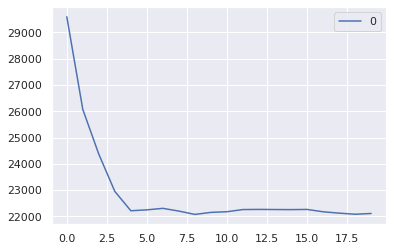

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
categories_knn = KNeighborsRegressor(n_neighbors =15, metric='manhattan', weights='distance')
categories_knn.fit(X_train, y_train)

#cross validate
categories_knn_scores = cross_val_score(categories_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_knn_scores)))

Accuracy Scores for the 5 folds:  [0.54885737 0.52610373 0.50725495 0.51634454 0.48990693]
Mean Cross Validation Score: 0.517693502521245352276935136615066


In [ ]:
#generate predictions
categories_knn_preds = categories_knn.predict(X_test)

#more performance metrics
categories_knn_rsquared_train = categories_knn.score(X_train, y_train)
categories_knn_rsquared_test = categories_knn.score(X_test, y_test)
categories_knn_mae = mean_absolute_error(y_test, categories_knn_preds)
categories_knn_mse = mse(y_test, categories_knn_preds)
categories_knn_rmse = rmse(y_test, categories_knn_preds)
categories_knn_mape = np.mean(np.abs((y_test - categories_knn_preds)/y_test)*100)
categories_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_knn_preds) / y_test)))) * 100
categories_knn_model_name = 'Categories KNN'

#create easily readable display of performance metrics
categories_knn_dictionary = {'Model': categories_knn_model_name,
  'Training Set R Squared': categories_knn_rsquared_train, 
  'Test Set R Squared': categories_knn_rsquared_test, 'Mean Absolute Error': categories_knn_mae, 
  'Mean Sqaured Error': categories_knn_mse, 'Root Mean Squared Error': categories_knn_rmse,
  'Root Mean Squared Percentage Error': categories_knn_rmspe,
  'Mean Absolute Percentage Error': categories_knn_mape}

categories_knn_df = pd.DataFrame(categories_knn_dictionary, index=[0])

categories_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories KNN,0.997981,0.54422,16186.03049,4.955136e+08,22260.134893,26.499294,18.545367


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
years_exp_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
years_exp_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(years_exp_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(years_exp_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(n_neighbors = K, metric='manhattan', weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  28009.519721350935
RMSe Value for K=  2 is  24660.86274822906
RMSe Value for K=  3 is  23656.333308624537
RMSe Value for K=  4 is  23350.9366301251
RMSe Value for K=  5 is  23207.120722114912
RMSe Value for K=  6 is  23081.869182597984
RMSe Value for K=  7 is  23228.092060565497
RMSe Value for K=  8 is  23181.107328985447
RMSe Value for K=  9 is  23132.52966718091
RMSe Value for K=  10 is  22992.129293409023
RMSe Value for K=  11 is  23038.322118027583
RMSe Value for K=  12 is  22975.008412878255
RMSe Value for K=  13 is  22989.830495614337
RMSe Value for K=  14 is  22957.939315895546
RMSe Value for K=  15 is  22998.327264107247
RMSe Value for K=  16 is  23127.096146617725
RMSe Value for K=  17 is  23054.646019155884
RMSe Value for K=  18 is  22967.749554150654
RMSe Value for K=  19 is  22992.83156522892
RMSe Value for K=  20 is  23051.8147726512


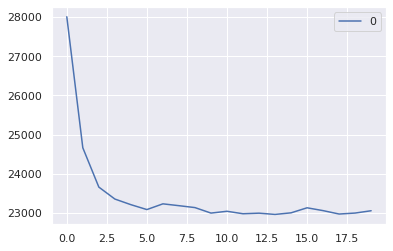

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
years_exp_knn = KNeighborsRegressor(n_neighbors =15, metric='manhattan', weights='distance')
years_exp_knn.fit(X_train, y_train)

#cross validate
years_exp_knn_scores = cross_val_score(years_exp_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', years_exp_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(years_exp_knn_scores)))

Accuracy Scores for the 5 folds:  [0.53110529 0.49254323 0.53189389 0.54741383 0.60163937]
Mean Cross Validation Score: 0.540919120634476890963071582518751


In [ ]:
#generate predictions
years_exp_knn_preds = years_exp_knn.predict(X_test)

#more performance metrics
years_exp_knn_rsquared_train = years_exp_knn.score(X_train, y_train)
years_exp_knn_rsquared_test = years_exp_knn.score(X_test, y_test)
years_exp_knn_mae = mean_absolute_error(y_test, years_exp_knn_preds)
years_exp_knn_mse = mse(y_test, years_exp_knn_preds)
years_exp_knn_rmse = rmse(y_test, years_exp_knn_preds)
years_exp_knn_mape = np.mean(np.abs((y_test - years_exp_knn_preds)/y_test)*100)
years_exp_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - years_exp_knn_preds) / y_test)))) * 100
years_exp_knn_model_name = 'Years of Experience KNN'

#create easily readable display of performance metrics
years_exp_knn_dictionary = {'Model': years_exp_knn_model_name,
  'Training Set R Squared': years_exp_knn_rsquared_train, 
  'Test Set R Squared': years_exp_knn_rsquared_test, 'Mean Absolute Error': years_exp_knn_mae, 
  'Mean Sqaured Error': years_exp_knn_mse, 'Root Mean Squared Error': years_exp_knn_rmse,
  'Root Mean Squared Percentage Error': years_exp_knn_rmspe,
  'Mean Absolute Percentage Error': years_exp_knn_mape}

years_exp_knn_df = pd.DataFrame(years_exp_knn_dictionary, index=[0])

years_exp_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience KNN,0.998679,0.544932,17080.937701,5.289231e+08,22998.327264,25.954969,19.238192


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_categories_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_categories_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_categories_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.3s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(n_neighbors = K, metric='manhattan', weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.30675101689385836
RMSe Value for K=  2 is  0.26869972573962014
RMSe Value for K=  3 is  0.25118111711311003
RMSe Value for K=  4 is  0.23868927926610317
RMSe Value for K=  5 is  0.23138065367755353
RMSe Value for K=  6 is  0.2320049467570775
RMSe Value for K=  7 is  0.233444172433421
RMSe Value for K=  8 is  0.23192386936243317
RMSe Value for K=  9 is  0.23063951245380773
RMSe Value for K=  10 is  0.23168080270978295
RMSe Value for K=  11 is  0.2321311902597571
RMSe Value for K=  12 is  0.2327812082048831
RMSe Value for K=  13 is  0.23272268451552902
RMSe Value for K=  14 is  0.23244298995972684
RMSe Value for K=  15 is  0.23245880003369762
RMSe Value for K=  16 is  0.232115303693137
RMSe Value for K=  17 is  0.23134102239399826
RMSe Value for K=  18 is  0.23104018098596124
RMSe Value for K=  19 is  0.23051326165319408
RMSe Value for K=  20 is  0.23071809792515716


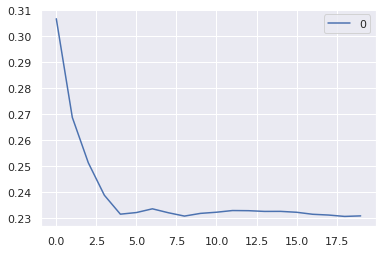

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_categories_knn = KNeighborsRegressor(n_neighbors =15, metric='manhattan', weights='distance')
log_categories_knn.fit(X_train, y_train)

#cross validate
log_categories_knn_scores = cross_val_score(log_categories_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_knn_scores)))

Accuracy Scores for the 5 folds:  [0.54093812 0.53686053 0.51400252 0.52748148 0.50518915]
Mean Cross Validation Score: 0.524894358387239967633774995192653


In [ ]:
#generate predictions
log_categories_knn_preds = log_categories_knn.predict(X_test)

#more performance metrics
log_categories_knn_rsquared_train = log_categories_knn.score(X_train, y_train)
log_categories_knn_rsquared_test = log_categories_knn.score(X_test, y_test)
log_categories_knn_mae = mean_absolute_error(y_test, log_categories_knn_preds)
log_categories_knn_mse = mse(y_test, log_categories_knn_preds)
log_categories_knn_rmse = rmse(y_test, log_categories_knn_preds)
log_categories_knn_mape = np.mean(np.abs((y_test - log_categories_knn_preds)/y_test)*100)
log_categories_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_knn_preds) / y_test)))) * 100
log_categories_knn_model_name = 'Categories KNN Log(y)'

#create easily readable display of performance metrics
log_categories_knn_dictionary = {'Model': log_categories_knn_model_name,
  'Training Set R Squared': log_categories_knn_rsquared_train, 
  'Test Set R Squared': log_categories_knn_rsquared_test, 'Mean Absolute Error': log_categories_knn_mae, 
  'Mean Sqaured Error': log_categories_knn_mse, 'Root Mean Squared Error': log_categories_knn_rmse,
  'Root Mean Squared Percentage Error': log_categories_knn_rmspe,
  'Mean Absolute Percentage Error': log_categories_knn_mape}

log_categories_knn_df = pd.DataFrame(log_categories_knn_dictionary, index=[0])

log_categories_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories KNN Log(y),0.998095,0.558492,0.174256,0.054037,0.232459,2.047551,1.531675


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_years_exp_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_years_exp_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_years_exp_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_years_exp_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(n_neighbors = K, metric='manhattan', weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.30646347298124826
RMSe Value for K=  2 is  0.259336410177574
RMSe Value for K=  3 is  0.24763307380752417
RMSe Value for K=  4 is  0.24214442507428888
RMSe Value for K=  5 is  0.24051757301688384
RMSe Value for K=  6 is  0.23823279799853
RMSe Value for K=  7 is  0.24026046159799527
RMSe Value for K=  8 is  0.23955978112714482
RMSe Value for K=  9 is  0.2399177250504433
RMSe Value for K=  10 is  0.23859099259440683
RMSe Value for K=  11 is  0.23878068844263828
RMSe Value for K=  12 is  0.23852311729516193
RMSe Value for K=  13 is  0.23908918069145857
RMSe Value for K=  14 is  0.2382803079475275
RMSe Value for K=  15 is  0.2387663998275603
RMSe Value for K=  16 is  0.23965065908353406
RMSe Value for K=  17 is  0.23891721225172097
RMSe Value for K=  18 is  0.238064110403428
RMSe Value for K=  19 is  0.23840012952841744
RMSe Value for K=  20 is  0.23898071633165202


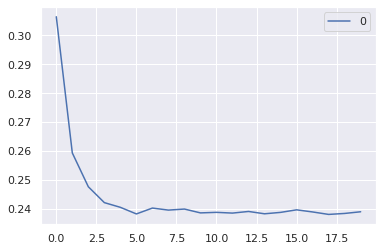

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_years_exp_knn = KNeighborsRegressor(n_neighbors =15, metric='manhattan', weights='distance')
log_years_exp_knn.fit(X_train, y_train)

#cross validate
log_years_exp_knn_scores = cross_val_score(log_years_exp_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_years_exp_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_years_exp_knn_scores)))

Accuracy Scores for the 5 folds:  [0.52735281 0.51101845 0.55428533 0.5257234  0.58343278]
Mean Cross Validation Score: 0.540362554650935078548457113356562


In [ ]:
#generate predictions
log_years_exp_knn_preds = log_years_exp_knn.predict(X_test)

#more performance metrics
log_years_exp_knn_rsquared_train = log_years_exp_knn.score(X_train, y_train)
log_years_exp_knn_rsquared_test = log_years_exp_knn.score(X_test, y_test)
log_years_exp_knn_mae = mean_absolute_error(y_test, log_years_exp_knn_preds)
log_years_exp_knn_mse = mse(y_test, log_years_exp_knn_preds)
log_years_exp_knn_rmse = rmse(y_test, log_years_exp_knn_preds)
log_years_exp_knn_mape = np.mean(np.abs((y_test - log_years_exp_knn_preds)/y_test)*100)
log_years_exp_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_years_exp_knn_preds) / y_test)))) * 100
log_years_exp_knn_model_name = 'Years of Experience KNN Log(y)'

#create easily readable display of performance metrics
log_years_exp_knn_dictionary = {'Model': log_years_exp_knn_model_name,
  'Training Set R Squared': log_years_exp_knn_rsquared_train, 
  'Test Set R Squared': log_years_exp_knn_rsquared_test, 'Mean Absolute Error': log_years_exp_knn_mae, 
  'Mean Sqaured Error': log_years_exp_knn_mse, 'Root Mean Squared Error': log_years_exp_knn_rmse,
  'Root Mean Squared Percentage Error': log_years_exp_knn_rmspe,
  'Mean Absolute Percentage Error': log_years_exp_knn_mape}

log_years_exp_knn_df = pd.DataFrame(log_years_exp_knn_dictionary, index=[0])

log_years_exp_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience KNN Log(y),0.998896,0.571644,0.185833,0.057009,0.238766,2.097682,1.632244


## **Random Forest**

### **categories_df**

In [ ]:
# #set features & target
# X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = categories_df['avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [43]}  
  
# categories_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# categories_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(categories_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(categories_rf_grid.best_estimator_) 

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 11880 out of 11880 | elapsed: 98.2min finished


{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 43}
RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=43, verbose=0, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
categories_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=43, verbose=0, warm_start=False)

categories_rf.fit(X_train, y_train)

#cross validate
categories_rf_scores = cross_val_score(categories_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_rf_scores)))

Accuracy Scores for the 5 folds:  [0.65200937 0.62583986 0.64381592 0.57258082 0.60367504]
Mean Cross Validation Score: 0.619584201442220261490945176774403


In [ ]:
#generate predictions
categories_rf_preds = categories_rf.predict(X_test)

#more performance metrics
categories_rf_rsquared_train = categories_rf.score(X_train, y_train)
categories_rf_rsquared_test = categories_rf.score(X_test, y_test)
categories_rf_mae = mean_absolute_error(y_test, categories_rf_preds)
categories_rf_mse = mse(y_test, categories_rf_preds)
categories_rf_rmse = rmse(y_test, categories_rf_preds)
categories_rf_mape = np.mean(np.abs((y_test - categories_rf_preds)/y_test)*100)
categories_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_rf_preds) / y_test)))) * 100
categories_rf_model_name = 'Categories Random Forest'

#create easily readable display of performance metrics
categories_rf_dictionary = {'Model': categories_rf_model_name,
  'Training Set R Squared': categories_rf_rsquared_train, 
  'Test Set R Squared': categories_rf_rsquared_test, 'Mean Absolute Error': categories_rf_mae, 
  'Mean Sqaured Error': categories_rf_mse, 'Root Mean Squared Error': categories_rf_rmse,
  'Root Mean Squared Percentage Error': categories_rf_rmspe,
  'Mean Absolute Percentage Error': categories_rf_mape}

categories_rf_df = pd.DataFrame(categories_rf_dictionary, index=[0])

categories_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Random Forest,0.997758,0.622136,14604.886602,4.108054e+08,20268.336093,25.116273,17.011265


### **yrs_exp_df**

In [ ]:
# #set features & target
# X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = yrs_exp_df['avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# yrs_exp_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# yrs_exp_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(yrs_exp_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(yrs_exp_rf_grid.best_estimator_) 

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 11880 out of 11880 | elapsed: 85.9min finished


{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 52}
RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)
yrs_exp_rf.fit(X_train, y_train)

#cross validate
yrs_exp_rf_scores = cross_val_score(yrs_exp_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_rf_scores)))

Accuracy Scores for the 5 folds:  [0.6162914  0.59537444 0.61331705 0.64833913 0.66672941]
Mean Cross Validation Score: 0.628010284973190779922447291028220


In [ ]:
#generate predictions
yrs_exp_rf_preds = yrs_exp_rf.predict(X_test)

#more performance metrics
yrs_exp_rf_rsquared_train = yrs_exp_rf.score(X_train, y_train)
yrs_exp_rf_rsquared_test = yrs_exp_rf.score(X_test, y_test)
yrs_exp_rf_mae = mean_absolute_error(y_test, yrs_exp_rf_preds)
yrs_exp_rf_mse = mse(y_test, yrs_exp_rf_preds)
yrs_exp_rf_rmse = rmse(y_test, yrs_exp_rf_preds)
yrs_exp_rf_mape = np.mean(np.abs((y_test - yrs_exp_rf_preds)/y_test)*100)
yrs_exp_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_rf_preds) / y_test)))) * 100
yrs_exp_rf_model_name = 'Years of Experience Random Forest'

#create easily readable display of performance metrics
yrs_exp_rf_dictionary = {'Model': yrs_exp_rf_model_name,
  'Training Set R Squared': yrs_exp_rf_rsquared_train, 
  'Test Set R Squared': yrs_exp_rf_rsquared_test, 'Mean Absolute Error': yrs_exp_rf_mae, 
  'Mean Sqaured Error': yrs_exp_rf_mse, 'Root Mean Squared Error': yrs_exp_rf_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_rf_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_rf_mape}

yrs_exp_rf_df = pd.DataFrame(yrs_exp_rf_dictionary, index=[0])

yrs_exp_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Random Forest,0.998504,0.635238,14672.580972,4.239612e+08,20590.31806,23.906784,16.670285


### **categories_df log(y)**

In [ ]:
# #set features & target
# X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = categories_df['log_avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_categories_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_categories_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_categories_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_categories_rf_grid.best_estimator_) 

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 11880 out of 11880 | elapsed: 92.1min finished


{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 52}
RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

log_categories_rf.fit(X_train, y_train)

#cross validate
log_categories_rf_scores = cross_val_score(log_categories_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_rf_scores)))

Accuracy Scores for the 5 folds:  [0.6048211  0.59564811 0.60856846 0.63070628 0.63994624]
Mean Cross Validation Score: 0.615938035641173442513718327973038


In [ ]:
#generate predictions
log_categories_rf_preds = log_categories_rf.predict(X_test)

#more performance metrics
log_categories_rf_rsquared_train = log_categories_rf.score(X_train, y_train)
log_categories_rf_rsquared_test = log_categories_rf.score(X_test, y_test)
log_categories_rf_mae = mean_absolute_error(y_test, log_categories_rf_preds)
log_categories_rf_mse = mse(y_test, log_categories_rf_preds)
log_categories_rf_rmse = rmse(y_test, log_categories_rf_preds)
log_categories_rf_mape = np.mean(np.abs((y_test - log_categories_rf_preds)/y_test)*100)
log_categories_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_rf_preds) / y_test)))) * 100
log_categories_rf_model_name = 'Categories Random Forest Log(y)'

#create easily readable display of performance metrics
log_categories_rf_dictionary = {'Model': log_categories_rf_model_name,
  'Training Set R Squared': log_categories_rf_rsquared_train, 
  'Test Set R Squared': log_categories_rf_rsquared_test, 'Mean Absolute Error': log_categories_rf_mae, 
  'Mean Sqaured Error': log_categories_rf_mse, 'Root Mean Squared Error': log_categories_rf_rmse,
  'Root Mean Squared Percentage Error': log_categories_rf_rmspe,
  'Mean Absolute Percentage Error': log_categories_rf_mape}

log_categories_rf_df = pd.DataFrame(log_categories_rf_dictionary, index=[0])

log_categories_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Random Forest Log(y),0.934444,0.636849,14820.938438,4.220877e+08,20544.771841,24.32265,16.921456


### **yrs_exp_df log(y)**

In [ ]:
# #set features & target
# X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = yrs_exp_df['log_avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_yrs_exp_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_yrs_exp_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_yrs_exp_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_yrs_exp_rf_grid.best_estimator_) 

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 11880 out of 11880 | elapsed: 80.7min finished


{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 52}
RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)
log_yrs_exp_rf.fit(X_train, y_train)

#cross validate
log_yrs_exp_rf_scores = cross_val_score(log_yrs_exp_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_rf_scores)))

Accuracy Scores for the 5 folds:  [0.61462401 0.59229717 0.61387174 0.64138803 0.66361002]
Mean Cross Validation Score: 0.625158196271577981661948797409423


In [ ]:
#generate predictions
log_yrs_exp_rf_preds = log_yrs_exp_rf.predict(X_test)

#more performance metrics
log_yrs_exp_rf_rsquared_train = log_yrs_exp_rf.score(X_train, y_train)
log_yrs_exp_rf_rsquared_test = log_yrs_exp_rf.score(X_test, y_test)
log_yrs_exp_rf_mae = mean_absolute_error(y_test, log_yrs_exp_rf_preds)
log_yrs_exp_rf_mse = mse(y_test, log_yrs_exp_rf_preds)
log_yrs_exp_rf_rmse = rmse(y_test, log_yrs_exp_rf_preds)
log_yrs_exp_rf_mape = np.mean(np.abs((y_test - log_yrs_exp_rf_preds)/y_test)*100)
log_yrs_exp_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_rf_preds) / y_test)))) * 100
log_yrs_exp_rf_model_name = 'Years of Experience Random Forest Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_rf_dictionary = {'Model': log_yrs_exp_rf_model_name,
  'Training Set R Squared': log_yrs_exp_rf_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_rf_rsquared_test, 'Mean Absolute Error': log_yrs_exp_rf_mae, 
  'Mean Sqaured Error': log_yrs_exp_rf_mse, 'Root Mean Squared Error': log_yrs_exp_rf_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_rf_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_rf_mape}

log_yrs_exp_rf_df = pd.DataFrame(log_yrs_exp_rf_dictionary, index=[0])

log_yrs_exp_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Random Forest Log(y),0.998679,0.640475,14556.815353,4.178741e+08,20441.968568,23.887756,16.540051


## **Support Vector Machine**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
categories_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
categories_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(categories_svm_grid.best_estimator_) 

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
categories_svm = svm.SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

categories_svm.fit(X_train, y_train)

#cross validate
categories_svm_scores = cross_val_score(categories_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_svm_scores)))

Accuracy Scores for the 5 folds:  [-0.01502779  0.00515286 -0.03947812 -0.01165007 -0.01458418]
Mean Cross Validation Score: -0.015117462584229236083332992279793


In [ ]:
#generate predictions
categories_svm_preds = categories_svm.predict(X_test)

#more performance metrics
categories_svm_rsquared_train = categories_svm.score(X_train, y_train)
categories_svm_rsquared_test = categories_svm.score(X_test, y_test)
categories_svm_mae = mean_absolute_error(y_test, categories_svm_preds)
categories_svm_mse = mse(y_test, categories_svm_preds)
categories_svm_rmse = rmse(y_test, categories_svm_preds)
categories_svm_mape = np.mean(np.abs((y_test - categories_svm_preds)/y_test)*100)
categories_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_svm_preds) / y_test)))) * 100
categories_svm_model_name = 'Categories SVM'

#create easily readable display of performance metrics
categories_svm_dictionary = {'Model': categories_svm_model_name,
  'Training Set R Squared': categories_svm_rsquared_train, 
  'Test Set R Squared': categories_svm_rsquared_test, 'Mean Absolute Error': categories_svm_mae, 
  'Mean Sqaured Error': categories_svm_mse, 'Root Mean Squared Error': categories_svm_rmse,
  'Root Mean Squared Percentage Error': categories_svm_rmspe,
  'Mean Absolute Percentage Error': categories_svm_mape}

categories_svm_df = pd.DataFrame(categories_svm_dictionary, index=[0])

categories_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories SVM,-0.009965,-0.012103,26471.169447,1.100336e+09,33171.319238,37.556546,29.896886


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
yrs_exp_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
yrs_exp_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(yrs_exp_svm_grid.best_estimator_)  

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_svm = svm.SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
      gamma=0.01, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, 
      verbose=False)
yrs_exp_svm.fit(X_train, y_train)

#cross validate
yrs_exp_svm_scores = cross_val_score(yrs_exp_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_svm_scores)))

Accuracy Scores for the 5 folds:  [-0.01648375 -0.03299425  0.00066777 -0.07173309  0.00454289]
Mean Cross Validation Score: -0.023200088036918309342127031413838


In [ ]:
#generate predictions
yrs_exp_svm_preds = yrs_exp_svm.predict(X_test)

#more performance metrics
yrs_exp_svm_rsquared_train = yrs_exp_svm.score(X_train, y_train)
yrs_exp_svm_rsquared_test = yrs_exp_svm.score(X_test, y_test)
yrs_exp_svm_mae = mean_absolute_error(y_test, yrs_exp_svm_preds)
yrs_exp_svm_mse = mse(y_test, yrs_exp_svm_preds)
yrs_exp_svm_rmse = rmse(y_test, yrs_exp_svm_preds)
yrs_exp_svm_mape = np.mean(np.abs((y_test - yrs_exp_svm_preds)/y_test)*100)
yrs_exp_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_svm_preds) / y_test)))) * 100
yrs_exp_svm_model_name = 'Years of Experience SVM'

#create easily readable display of performance metrics
yrs_exp_svm_dictionary = {'Model': yrs_exp_svm_model_name,
  'Training Set R Squared': yrs_exp_svm_rsquared_train, 
  'Test Set R Squared': yrs_exp_svm_rsquared_test, 'Mean Absolute Error': yrs_exp_svm_mae, 
  'Mean Sqaured Error': yrs_exp_svm_mse, 'Root Mean Squared Error': yrs_exp_svm_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_svm_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_svm_mape}

yrs_exp_svm_df = pd.DataFrame(yrs_exp_svm_dictionary, index=[0])

yrs_exp_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience SVM,-0.012733,-0.023734,27586.726161,1.189879e+09,34494.626394,39.608393,31.347603


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_categories_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_categories_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_categories_svm_grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_svm = svm.SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

log_categories_svm.fit(X_train, y_train)

#cross validate
log_categories_svm_scores = cross_val_score(log_categories_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_svm_scores)))

Accuracy Scores for the 5 folds:  [0.58165211 0.56125369 0.54774739 0.55743497 0.5737885 ]
Mean Cross Validation Score: 0.564375332859041067834482419129927


In [ ]:
#generate predictions
log_categories_svm_preds = log_categories_svm.predict(X_test)

#more performance metrics
log_categories_svm_rsquared_train = log_categories_svm.score(X_train, y_train)
log_categories_svm_rsquared_test = log_categories_svm.score(X_test, y_test)
log_categories_svm_mae = mean_absolute_error(y_test, log_categories_svm_preds)
log_categories_svm_mse = mse(y_test, log_categories_svm_preds)
log_categories_svm_rmse = rmse(y_test, log_categories_svm_preds)
log_categories_svm_mape = np.mean(np.abs((y_test - log_categories_svm_preds)/y_test)*100)
log_categories_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_svm_preds) / y_test)))) * 100
log_categories_svm_model_name = 'Categories SVM Log(y)'

#create easily readable display of performance metrics
log_categories_svm_dictionary = {'Model': log_categories_svm_model_name,
  'Training Set R Squared': log_categories_svm_rsquared_train, 
  'Test Set R Squared': log_categories_svm_rsquared_test, 'Mean Absolute Error': log_categories_svm_mae, 
  'Mean Sqaured Error': log_categories_svm_mse, 'Root Mean Squared Error': log_categories_svm_rmse,
  'Root Mean Squared Percentage Error': log_categories_svm_rmspe,
  'Mean Absolute Percentage Error': log_categories_svm_mape}

log_categories_svm_df = pd.DataFrame(log_categories_svm_dictionary, index=[0])

log_categories_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories SVM Log(y),0.627768,0.560898,0.17787,0.053743,0.231825,2.055635,1.567133


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_yrs_exp_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_yrs_exp_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_svm_grid.best_estimator_)  

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_svm = svm.SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
      gamma=0.01, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, 
      verbose=False)
log_yrs_exp_svm.fit(X_train, y_train)

#cross validate
log_yrs_exp_svm_scores = cross_val_score(log_yrs_exp_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_svm_scores)))

Accuracy Scores for the 5 folds:  [0.55162711 0.56420734 0.58197826 0.52317254 0.54175274]
Mean Cross Validation Score: 0.552547597920409638838634691637708


In [ ]:
#generate predictions
log_yrs_exp_svm_preds = log_yrs_exp_svm.predict(X_test)

#more performance metrics
log_yrs_exp_svm_rsquared_train = log_yrs_exp_svm.score(X_train, y_train)
log_yrs_exp_svm_rsquared_test = log_yrs_exp_svm.score(X_test, y_test)
log_yrs_exp_svm_mae = mean_absolute_error(y_test, log_yrs_exp_svm_preds)
log_yrs_exp_svm_mse = mse(y_test, log_yrs_exp_svm_preds)
log_yrs_exp_svm_rmse = rmse(y_test, log_yrs_exp_svm_preds)
log_yrs_exp_svm_mape = np.mean(np.abs((y_test - log_yrs_exp_svm_preds)/y_test)*100)
log_yrs_exp_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_svm_preds) / y_test)))) * 100
log_yrs_exp_svm_model_name = 'Years of Experience SVM Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_svm_dictionary = {'Model': log_yrs_exp_svm_model_name,
  'Training Set R Squared': log_yrs_exp_svm_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_svm_rsquared_test, 'Mean Absolute Error': log_yrs_exp_svm_mae, 
  'Mean Sqaured Error': log_yrs_exp_svm_mse, 'Root Mean Squared Error': log_yrs_exp_svm_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_svm_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_svm_mape}

log_yrs_exp_svm_df = pd.DataFrame(log_yrs_exp_svm_dictionary, index=[0])

log_yrs_exp_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience SVM Log(y),0.624577,0.653366,0.161906,0.046133,0.214786,1.900657,1.425545


## **XGBoost**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
categories_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
categories_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(categories_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.1min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
categories_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

categories_xgb.fit(X_train, y_train)

#cross validate
categories_xgb_scores = cross_val_score(categories_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.62430335 0.61864916 0.61892551 0.59735055 0.61582572]
Mean Cross Validation Score: 0.615010857770955321477401867014123


In [ ]:
#generate predictions
categories_xgb_preds = categories_xgb.predict(X_test)

#more performance metrics
categories_xgb_rsquared_train = categories_xgb.score(X_train, y_train)
categories_xgb_rsquared_test = categories_xgb.score(X_test, y_test)
categories_xgb_mae = mean_absolute_error(y_test, categories_xgb_preds)
categories_xgb_mse = mse(y_test, categories_xgb_preds)
categories_xgb_rmse = rmse(y_test, categories_xgb_preds)
categories_xgb_mape = np.mean(np.abs((y_test - categories_xgb_preds)/y_test)*100)
categories_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_xgb_preds) / y_test)))) * 100
categories_xgb_model_name = 'Categories XGBoost'

#create easily readable display of performance metrics
categories_xgb_dictionary = {'Model': categories_xgb_model_name,
  'Training Set R Squared': categories_xgb_rsquared_train, 
  'Test Set R Squared': categories_xgb_rsquared_test, 'Mean Absolute Error': categories_xgb_mae, 
  'Mean Sqaured Error': categories_xgb_mse, 'Root Mean Squared Error': categories_xgb_rmse,
  'Root Mean Squared Percentage Error': categories_xgb_rmspe,
  'Mean Absolute Percentage Error': categories_xgb_mape}

categories_xgb_df = pd.DataFrame(categories_xgb_dictionary, index=[0])

categories_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories XGBoost,0.888889,0.610653,15206.281107,4.232890e+08,20573.987463,25.224668,17.509577


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
yrs_exp_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
yrs_exp_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(yrs_exp_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:   58.3s finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

yrs_exp_xgb.fit(X_train, y_train)

#cross validate
yrs_exp_xgb_scores = cross_val_score(yrs_exp_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.60637607 0.56970532 0.6135097  0.64190224 0.643502  ]
Mean Cross Validation Score: 0.614999067883505667886367973551387


In [ ]:
#generate predictions
yrs_exp_xgb_preds = yrs_exp_xgb.predict(X_test)

#more performance metrics
yrs_exp_xgb_rsquared_train = yrs_exp_xgb.score(X_train, y_train)
yrs_exp_xgb_rsquared_test = yrs_exp_xgb.score(X_test, y_test)
yrs_exp_xgb_mae = mean_absolute_error(y_test, yrs_exp_xgb_preds)
yrs_exp_xgb_mse = mse(y_test, yrs_exp_xgb_preds)
yrs_exp_xgb_rmse = rmse(y_test, yrs_exp_xgb_preds)
yrs_exp_xgb_mape = np.mean(np.abs((y_test - yrs_exp_xgb_preds)/y_test)*100)
yrs_exp_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_xgb_preds) / y_test)))) * 100
yrs_exp_xgb_model_name = 'Years of Experience XGBoost'

#create easily readable display of performance metrics
yrs_exp_xgb_dictionary = {'Model': yrs_exp_xgb_model_name,
  'Training Set R Squared': yrs_exp_xgb_rsquared_train, 
  'Test Set R Squared': yrs_exp_xgb_rsquared_test, 'Mean Absolute Error': yrs_exp_xgb_mae, 
  'Mean Sqaured Error': yrs_exp_xgb_mse, 'Root Mean Squared Error': yrs_exp_xgb_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_xgb_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_xgb_mape}

yrs_exp_xgb_df = pd.DataFrame(yrs_exp_xgb_dictionary, index=[0])

yrs_exp_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience XGBoost,0.903622,0.626107,14913.111417,4.345733e+08,20846.421943,24.636285,17.001355


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_categories_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_categories_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_categories_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:   59.7s finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

log_categories_xgb.fit(X_train, y_train)

#cross validate
log_categories_xgb_scores = cross_val_score(log_categories_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.63146773 0.63075839 0.62488721 0.60364019 0.61961304]
Mean Cross Validation Score: 0.622073310206634366714695261180168


In [ ]:
#generate predictions
log_categories_xgb_preds = log_categories_xgb.predict(X_test)

#more performance metrics
log_categories_xgb_rsquared_train = log_categories_xgb.score(X_train, y_train)
log_categories_xgb_rsquared_test = log_categories_xgb.score(X_test, y_test)
log_categories_xgb_mae = mean_absolute_error(y_test, log_categories_xgb_preds)
log_categories_xgb_mse = mse(y_test, log_categories_xgb_preds)
log_categories_xgb_rmse = rmse(y_test, log_categories_xgb_preds)
log_categories_xgb_mape = np.mean(np.abs((y_test - log_categories_xgb_preds)/y_test)*100)
log_categories_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_xgb_preds) / y_test)))) * 100
log_categories_xgb_model_name = 'Categories XGBoost Log(y)'

#create easily readable display of performance metrics
log_categories_xgb_dictionary = {'Model': log_categories_xgb_model_name,
  'Training Set R Squared': log_categories_xgb_rsquared_train, 
  'Test Set R Squared': log_categories_xgb_rsquared_test, 'Mean Absolute Error': log_categories_xgb_mae, 
  'Mean Sqaured Error': log_categories_xgb_mse, 'Root Mean Squared Error': log_categories_xgb_rmse,
  'Root Mean Squared Percentage Error': log_categories_xgb_rmspe,
  'Mean Absolute Percentage Error': log_categories_xgb_mape}

log_categories_xgb_df = pd.DataFrame(log_categories_xgb_dictionary, index=[0])

log_categories_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories XGBoost Log(y),0.805155,0.620117,0.164781,0.046495,0.215626,1.910763,1.451245


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_yrs_exp_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_yrs_exp_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:   54.6s finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

log_yrs_exp_xgb.fit(X_train, y_train)

#cross validate
log_yrs_exp_xgb_scores = cross_val_score(log_yrs_exp_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.60621734 0.60159699 0.62725965 0.6304821  0.64643926]
Mean Cross Validation Score: 0.622399067650994730627189710503444


In [ ]:
#generate predictions
log_yrs_exp_xgb_preds = log_yrs_exp_xgb.predict(X_test)

#more performance metrics
log_yrs_exp_xgb_rsquared_train = log_yrs_exp_xgb.score(X_train, y_train)
log_yrs_exp_xgb_rsquared_test = log_yrs_exp_xgb.score(X_test, y_test)
log_yrs_exp_xgb_mae = mean_absolute_error(y_test, log_yrs_exp_xgb_preds)
log_yrs_exp_xgb_mse = mse(y_test, log_yrs_exp_xgb_preds)
log_yrs_exp_xgb_rmse = rmse(y_test, log_yrs_exp_xgb_preds)
log_yrs_exp_xgb_mape = np.mean(np.abs((y_test - log_yrs_exp_xgb_preds)/y_test)*100)
log_yrs_exp_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_xgb_preds) / y_test)))) * 100
log_yrs_exp_xgb_model_name = 'Years of Experience XGBoost Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_xgb_dictionary = {'Model': log_yrs_exp_xgb_model_name,
  'Training Set R Squared': log_yrs_exp_xgb_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_xgb_rsquared_test, 'Mean Absolute Error': log_yrs_exp_xgb_mae, 
  'Mean Sqaured Error': log_yrs_exp_xgb_mse, 'Root Mean Squared Error': log_yrs_exp_xgb_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_xgb_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_xgb_mape}

log_yrs_exp_xgb_df = pd.DataFrame(log_yrs_exp_xgb_dictionary, index=[0])

log_yrs_exp_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience XGBoost Log(y),0.920151,0.655952,0.158771,0.045789,0.213983,1.8926,1.398174


# **Model Comparison**

### **Categories & Years of Experience Model Results**

In [ ]:
results_list = [categories_lr_df, yrs_exp_lr_df, log_categories_lr_df, 
  log_yrs_exp_lr_df, categories_ridge_df, yrs_exp_ridge_df, log_categories_ridge_df, 
  log_yrs_exp_ridge_df, categories_lasso_df, yrs_exp_lasso_df, log_categories_lasso_df, 
  log_yrs_exp_lasso_df, categories_enet_df, yrs_exp_enet_df, log_categories_enet_df, 
  log_yrs_exp_enet_df,categories_knn_df, years_exp_knn_df, log_categories_knn_df, 
  log_years_exp_knn_df, categories_rf_df,yrs_exp_rf_df, log_categories_rf_df, 
  log_yrs_exp_rf_df,categories_svm_df,yrs_exp_svm_df, log_categories_svm_df, 
  log_yrs_exp_svm_df, categories_xgb_df,yrs_exp_xgb_df, log_categories_xgb_df, 
  log_yrs_exp_xgb_df]

results_df = pd.concat(results_list)
results_df.reset_index(inplace=True)
results_df.drop(columns=['index'], inplace=True)
results_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Linear Regression,0.520086,0.483750,18354.503066,5.612561e+08,23690.843196,29.497062,21.530916
1,Years of Experience Linear Regression,0.534729,0.567120,16499.342760,5.031339e+08,22430.645483,26.685662,18.864736
2,Categories Linear Regression Log(y),0.532586,0.510372,0.192512,5.992659e-02,0.244799,2.166507,1.695364
3,Years of Experience Linear Regression Log(y),0.547137,0.590158,0.177761,5.454541e-02,0.233550,2.062394,1.563913
4,Categories Ridge Regression,0.520085,0.483891,18352.187130,5.611029e+08,23687.610188,29.494439,21.528939
5,Years of Experience Ridge Regression,0.534728,0.567039,16502.067484,5.032276e+08,22432.735924,26.686209,18.868384
6,Categories Ridge Regression Log(y),0.532586,0.510464,0.192500,5.991540e-02,0.244776,2.166316,1.695256
7,Years of Experience Ridge Regression Log(y),0.547137,0.590081,0.177811,5.455574e-02,0.233572,2.062584,1.564356
8,Categories Lasso Regression,0.519936,0.485577,18326.992512,5.592693e+08,23648.874884,29.462594,21.507434
9,Years of Experience Lasso Regression,0.534584,0.565685,16548.385257,5.048018e+08,22467.794557,26.718871,18.935747


### **NLP Model Results**

A separate notebook containing exploration of NLP Bag of Words and TF-IDF models that were tested with XGBoost, since it was the best performing model. The time it takes to run these models is extensive and is therefore the reason a separate notebook was used. The results of these models can be seen below. 

To view this notebook, please click [here](https://https://colab.research.google.com/drive/1wEl-dw0npunSUZgS5qAFXapRA779HcLw?usp=sharing)

In [160]:
nlp_results = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/nlp_results.csv?dl=1')
nlp_results.drop(columns=['Unnamed: 0'], inplace=True)
nlp_results

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percent Error,Mean Absolute Percentage Error
0,BOW XGBoost,0.936038,0.555584,16380.684031,4.831596e+08,21980.891747,26.844869,19.121423
1,BOW XGBoost log(y),0.917346,0.540271,0.182553,5.626721e-02,0.237207,2.096247,1.607736
2,TF-IDF XGBoost,0.948596,0.519813,17301.342480,5.220486e+08,22848.382105,27.742474,20.288725
3,TF-IDF XGBoost log(y),0.930190,0.528309,0.185821,5.773127e-02,0.240273,2.120011,1.636261
